In [1]:
from scipy.io import loadmat
from scipy import signal
import numpy as np
import json
import matplotlib.pyplot as plt
#!pip install tqdm
from tqdm import tqdm_notebook as tqdm #if running in a notebook
#from tqdm import tqdm as tqdm #if not running in a notebook
from scipy.stats.stats import pearsonr
#from numpy import correlate as corr #not pearson 

# Made by:
# Name			Studentnumber
# Niels van den Hork s4572602
# Niels van Drueten	s4496604

In [2]:
# Boolean to load correlation from file.
get_correlation_from_file = False

# Filename to store/load correlation matrix.
filename = "correlations.json"


# PRESENT Cipher SBox
SBox = [0xC, 0x5, 0x6, 0xB, 0x9, 0x0, 0xA, 0xD, 0x3, 0xE, 0xF, 0x8, 0x4, 0x7, 0x1, 0x2]


In [3]:
# Function f is the intermediate result,
# where _in is the known non-constant data value
# and k is a small part of the key.
def f(i, k):
	return SBox[i ^ k]

# Returns the Hamming Weight of val.
def hw(val):
	return bin(val).count("1")


In [4]:
# Returns a Value-Prediction Matrix of size [no_inputs x no_keys]
# Input _in: Input matrix variable of size [no_inputs]
def construct_val_pred_matrix(_in, key_len):
	output = np.zeros((len(_in), 2**key_len), dtype="uint8")
	for i in range(len(_in)):
		in_elem = _in[i][0]
		for k in range(2**key_len):
			val = f(in_elem,k)
			output[i][k] = val
	return output	

# Returns a Power-Prediction Matrix of size [no_inputs x no_keys]
# Input _in: Value-Prediction Matrix of size [no_inputs x no_keys]
def construct_pow_pred_matrix(val_pred_matrix, key_len):
	output = np.zeros((len(_in), 2**key_len), dtype="uint8")
	for i in range(len(_in)):
		in_elem = _in[i][0]
		for k in range(2**key_len):
			val = val_pred_matrix[i][k]
			output[i][k] = hw(val)
	return output

In [74]:
# Uses the correlate function of the scipy io library,
# that cross-correlates two matrices.

def correlate_m(matrix1, matrix2):
    print(matrix1.shape,matrix2.shape)
   
    cols_matrix1 = matrix1.shape[1]
    cols_matrix2 = matrix2.shape[1]
    
    result = np.zeros((cols_matrix1,cols_matrix2))
    
    for i in tqdm(range(cols_matrix1)):
        for j in range(cols_matrix2):
            #result[i][j] = pearsonr(matrix1[:,i], matrix2[:,j])[0]
            result[i][j] = np.corrcoef(matrix1[:,i], matrix2[:,j])[0][1]
    return result

result = correlate_m(pow_pred_matrix, _traces)


(14900, 16) (14900, 6990)


In [69]:
help(np.corrcoef)

Help on function corrcoef in module numpy:

corrcoef(x, y=None, rowvar=True, bias=<no value>, ddof=<no value>)
    Return Pearson product-moment correlation coefficients.
    
    Please refer to the documentation for `cov` for more detail.  The
    relationship between the correlation coefficient matrix, `R`, and the
    covariance matrix, `C`, is
    
    .. math:: R_{ij} = \frac{ C_{ij} } { \sqrt{ C_{ii} * C_{jj} } }
    
    The values of `R` are between -1 and 1, inclusive.
    
    Parameters
    ----------
    x : array_like
        A 1-D or 2-D array containing multiple variables and observations.
        Each row of `x` represents a variable, and each column a single
        observation of all those variables. Also see `rowvar` below.
    y : array_like, optional
        An additional set of variables and observations. `y` has the same
        shape as `x`.
    rowvar : bool, optional
        If `rowvar` is True (default), then each row represents a
        variable, with obse

In [7]:
# Storing the correlation matrix in json.
def store_matrix(matrix):
	#matrix_list = matrix.tolist()
	json_string = ""
	for element in matrix:
		json_string += json.dumps(element.tolist())
	print(json_string)
	with open(filename, 'w') as outfile:
		json.dump(json_string, outfile)
	print("Correlation matrix stored in: {}".format(filename))


def load_matrix():
	return []

def sort_correlation(correlation):
	return list(sorted(correlation,key= lambda x: x[0][0]))


Input: 
 [[0]
 [8]
 [9]
 ...
 [2]
 [2]
 [4]] (14900, 1)


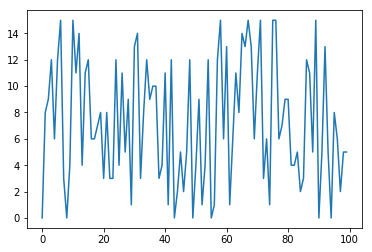

In [8]:
# Opens "in.mat" file.
in_file = loadmat('in.mat')
_in = in_file['in'] #contains 14900 4bit inputs

print(f"Input: \n {_in} {_in.shape}")

temp = [i[0] for i in _in]
plt.plot(temp[:100])
temp = None

Value prediction matrix: 
 [[12  5  6 ...  7  1  2]
 [ 3 14 15 ...  0 10 13]
 [14  3  8 ...  9 13 10]
 ...
 [ 6 11 12 ...  2  4  7]
 [ 6 11 12 ...  2  4  7]
 [ 9  0 10 ... 14 15  8]] (14900, 16)
Power prediction matrix: 
 [[2 2 2 ... 3 1 1]
 [2 3 4 ... 0 2 3]
 [3 2 1 ... 2 3 2]
 ...
 [2 3 2 ... 1 1 3]
 [2 3 2 ... 1 1 3]
 [2 0 2 ... 3 4 1]] (14900, 16)


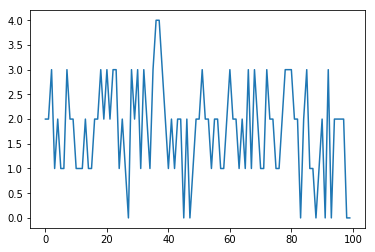

In [9]:
# Computing value prediction matrix
val_pred_matrix = construct_val_pred_matrix(_in, 4)
print(f"Value prediction matrix: \n {val_pred_matrix} {val_pred_matrix.shape}")


# Computing power prediction matrix
pow_pred_matrix = construct_pow_pred_matrix(val_pred_matrix, 4)
print(f"Power prediction matrix: \n {pow_pred_matrix} {pow_pred_matrix.shape}")

plt.plot(pow_pred_matrix[:100,0]) #first 100 input power for the first key (0)

Traces matrix: 
 [[-15.       -22.         3.       ...   1.         9.       -26.      ]
 [ -2.        -2.         1.       ...  -1.        -1.       -22.      ]
 [  0.         0.         0.       ...  18.        25.       -26.      ]
 ...
 [  2.5      -17.         9.       ...  -2.8       -5.        -4.      ]
 [ 18.        18.        18.       ...   2.5        3.5      -23.      ]
 [ -3.       -28.666666 -14.5      ...  17.        17.       -23.      ]] (14900, 6990)


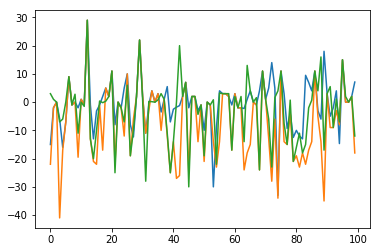

In [10]:
# Opens "traces.mat" file.
trace_file = loadmat('traces.mat')
_traces = trace_file['traces']
print(f"Traces matrix: \n {_traces} {_traces.shape}")

plt.plot(_traces[:100,0])
plt.plot(_traces[:100,1])
plt.plot(_traces[:100,2])

In [75]:
# Computing correlation matrix
correlations = []
if get_correlation_from_file:
    print("Getting correlation matrix from file.");
    correlations = load_matrix()
else:
    print("Computing correlation matrix.");
    result = correlate_m(pow_pred_matrix, _traces)
    print(result.shape)
    
    
   
    # Sort correlation matrix
    #sorted_correlations = sort_correlation(correlations)
    #print("sorted: {}".format(sorted_correlations))

    # Storing correlations	
    #store_matrix(sorted_correlations)

Computing correlation matrix.
(14900, 16) (14900, 6990)



(16, 6990)


(3961, 0.03508947108198958)
(6634, 0.029941139261843806)
(5322, 0.02917811108062728)
(4082, 0.03224542778080596)
(2272, 0.030091407367937088)
(1430, 0.03125518400276575)
(4017, 0.038900427637627244)
(3173, 0.026216738324085106)
(4008, 0.030607497523608675)
(3961, 0.03014240700334372)
(5894, 0.03331308218086102)
(5325, 0.02673938051118603)
(1130, 0.029483549401593225)
(6443, 0.036579818150330026)
(3961, 0.03100082860864633)
(6781, 0.03041439623570367)


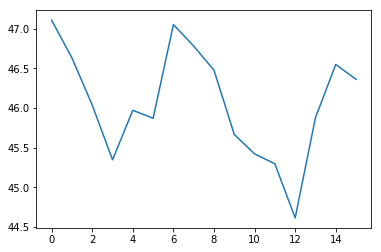

In [80]:

plt.plot([sum(list(map(abs,row))) for row in result])
    
maxidx = np.argmax(result,axis=1)
for row,midx in zip(result,maxidx):
    print((midx,row[midx]))


In [53]:
print(max([sum(list(map(abs,row))) for row in result]))
    

47.10564532431881


Text(0, 0.5, 'absolute correlation')

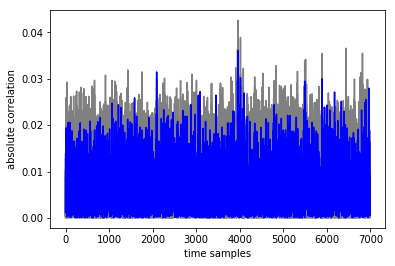

In [76]:
for row in result[1:]:
    plt.plot(list(map(abs,row)),color='gray')
    
plt.plot(list(map(abs,result[0])),color='blue')
plt.xlabel('time samples')
plt.ylabel('absolute correlation')

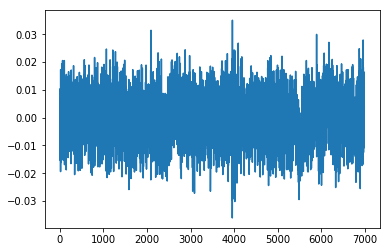

In [21]:
plt.plot(result[0])

Text(0, 0.5, 'correlation')

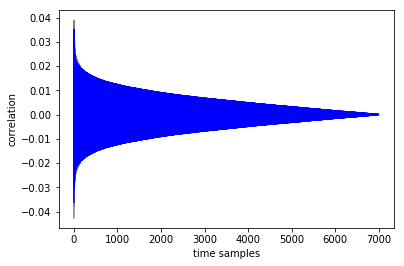

In [49]:

for row in result[1:]:
    #plt.plot(row)
    rowsort = sorted(row,key=lambda x:-abs(x))
    plt.plot(rowsort,color='gray')
    
rowsort = sorted(result[0],key=lambda x:-abs(x))
plt.plot(rowsort,color='blue')

plt.xlabel('time samples')
plt.ylabel('correlation')

In [120]:
import scipy.io as spio
from numpy import correlate as corr

in_data = spio.loadmat('in.mat', squeeze_me=True)['in']
traces_data = spio.loadmat('traces.mat', squeeze_me=True)['traces']

S_box = [0xC, 0x5, 0x6, 0xB, 0x9, 0x0, 0xA, 0xD, 0x3, 0xE, 0xF, 0x8, 0x4, 0x7, 0x1, 0x2]
hamming_weight = [0, 1, 1, 2, 1, 2, 2, 3, 1, 2, 2, 3, 2, 3, 3, 4]


def present(data, key):
    return S_box[data ^ key]


# Step 2:
V = [[present(in_data[i], k) for k in range(16)] for i in in_data]

# Step 3:
P = np.array([[hamming_weight[y] for y in v] for v in V])



    
        
            

(14900, 16) (14900, 6990)


In [131]:
result = correlate_m(P,traces_data)

(14900, 16) (14900, 6990)


(0.009870596794966139, 0.22828509542940623) 0.009870596794966139 0.22828509542940623
(-0.0034001914794967994, 0.6781326479224763) -0.0034001914794967994 0.6781326479224763
(0.008716787898363259, 0.2873511210749047) 0.008716787898363259 0.2873511210749047
(0.0022009962646305317, 0.7882039429827365) 0.0022009962646305317 0.7882039429827365
(0.0032578153836058986, 0.6908994494442047) 0.0032578153836058986 0.6908994494442047
(-0.003106196974463575, 0.7045922460397804) -0.003106196974463575 0.7045922460397804
(0.0027637005700821542, 0.7358719241563856) 0.0027637005700821542 0.7358719241563856
(0.008556628430789456, 0.29629985548028637) 0.008556628430789456 0.29629985548028637
(-0.0003027321746903412, 0.9705248153766461) -0.0003027321746903412 0.9705248153766461
(0.0015550389233006444, 0.8494651655659178) 0.0015550389233006444 0.8494651655659178
(-0.010644058516969328, 0.1938750548285095) -0.010644058516969328 0.1938750548285095
(-0.023716800551850888, 0.0037895473671108494) -0.0237168005518

(-0.0071071987079296805, 0.38567778685120757) -0.0071071987079296805 0.38567778685120757
(0.014676843884729956, 0.07321577354173785) 0.014676843884729956 0.07321577354173785
(-0.00525547053036372, 0.521222209957129) -0.00525547053036372 0.521222209957129
(-0.001535617258849089, 0.8513232210858945) -0.001535617258849089 0.8513232210858945
(-0.007361839779662956, 0.36888502069703355) -0.007361839779662956 0.36888502069703355
(0.010357405064222835, 0.20615457370238688) 0.010357405064222835 0.20615457370238688
(-0.0030663787356999114, 0.7082044139243515) -0.0030663787356999114 0.7082044139243515
(0.012942514611522753, 0.11415980888055165) 0.012942514611522753 0.11415980888055165
(0.007195692121717765, 0.3797897031123669) 0.007195692121717765 0.3797897031123669
(-0.006045075569601073, 0.4606114728434174) -0.006045075569601073 0.4606114728434174
(0.012266105823393643, 0.13434129470248687) 0.012266105823393643 0.13434129470248687
(0.01089770846221785, 0.18346465853257476) 0.01089770846221785 

(0.010019105381783883, 0.22136151613839838) 0.010019105381783883 0.22136151613839838
(-0.009868344444727397, 0.2283912757338658) -0.009868344444727397 0.2283912757338658
(-0.003956675872389305, 0.6291417392581182) -0.003956675872389305 0.6291417392581182
(-0.019656843238791615, 0.016419542250526865) -0.019656843238791615 0.016419542250526865
(0.012777174950472243, 0.1188578003658422) 0.012777174950472243 0.1188578003658422
(0.012246327075458944, 0.13497046825704928) 0.012246327075458944 0.13497046825704928
(-0.0038380605235094904, 0.6394575191943067) -0.0038380605235094904 0.6394575191943067
(0.01863819888890229, 0.02290060065199987) 0.01863819888890229 0.02290060065199987
(-0.0020491930003843904, 0.8024982921504654) -0.0020491930003843904 0.8024982921504654
(0.02470728802799145, 0.0025603510903427114) 0.02470728802799145 0.0025603510903427114
(-0.0005400213575547384, 0.9474475030748112) -0.0005400213575547384 0.9474475030748112
(-0.006925426582403122, 0.39794600624947185) -0.006925426

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 -0.0035567429806147048 0.6642007515398772
(0.004167519465279105, 0.610983475965684) 0.004167519465279105 0.610983475965684
(-0.005615757270129904, 0.49306730134038) -0.005615757270129904 0.49306730134038
(0.0048830458101766245, 0.551171720060605) 0.0048830458101766245 0.551171720060605
(-0.00600856080587145, 0.4633246187895037) -0.00600856080587145 0.4633246187895037
(0.002092558902690452, 0.7984078254364113) 0.002092558902690452 0.7984078254364113
(-0.004334369095370005, 0.5967809821277372) -0.004334369095370005 0.5967809821277372
(0.004869801409253346, 0.5522521841484164) 0.004869801409253346 0.5522521841484164
(-0.00047671285303036326, 0.9536009972005141) -0.00047671285303036326 0.9536009972005141
(0.005313817456748122, 0.5166071423366765) 0.005313817456748122 0.5166071423366765
(-0.011718406335506337, 0.15261863147306096) -0.011718406335506337 0.15261863147306096
(0.005284455437667025, 0.5189269407448645) 0.005284455437667025 0.5189269407448645
(-0.0005258886937534352, 0.948820918

(0.009377751914258624, 0.25236261147303135) 0.009377751914258624 0.25236261147303135
(0.015145777315087516, 0.06449700363400471) 0.015145777315087516 0.06449700363400471
(-0.00930461681349762, 0.2560810850009254) -0.00930461681349762 0.2560810850009254
(0.0002232920187309013, 0.9782571633877316) 0.0002232920187309013 0.9782571633877316
(-0.015642476711411953, 0.05621512100465541) -0.015642476711411953 0.05621512100465541
(0.006293020769315035, 0.44242525851330916) 0.006293020769315035 0.44242525851330916
(-0.0048786000046209315, 0.5515342882173278) -0.0048786000046209315 0.5515342882173278
(-0.0026805153484070598, 0.7435379985625891) -0.0026805153484070598 0.7435379985625891
(0.007726870673195936, 0.34561967304907326) 0.007726870673195936 0.34561967304907326
(-0.0017862032182830018, 0.8274168234887034) -0.0017862032182830018 0.8274168234887034
(0.0042395145476402845, 0.6048367526196156) 0.0042395145476402845 0.6048367526196156
(0.012569909696149567, 0.12495957877419293) 0.0125699096961

(-0.0030636571508541395, 0.7084515472625005) -0.0030636571508541395 0.7084515472625005
(0.0008698436922314274, 0.9154482137551907) 0.0008698436922314274 0.9154482137551907
(0.008510679475485245, 0.29890126032668857) 0.008510679475485245 0.29890126032668857
(-0.001279183429317031, 0.8759296052981105) -0.001279183429317031 0.8759296052981105
(-0.0001982353223576327, 0.9806965279563622) -0.0001982353223576327 0.9806965279563622
(-0.01130070050227225, 0.1677854487287858) -0.01130070050227225 0.1677854487287858
(-0.0008301684288013848, 0.9192912909396811) -0.0008301684288013848 0.9192912909396811
(-0.0060694480041865555, 0.4588054898338988) -0.0060694480041865555 0.4588054898338988
(-0.0023465929900589096, 0.7745606383376292) -0.0023465929900589096 0.7745606383376292
(0.0011797549907963572, 0.8855040881899693) 0.0011797549907963572 0.8855040881899693
(-0.0018569042304436543, 0.8206996213569946) -0.0018569042304436543 0.8206996213569946
(0.003934653954835213, 0.6310515655756268) 0.0039346539

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(0.006574297496746286, 0.4223004342526345) 0.006574297496746286 0.4223004342526345
(-0.009281604547097108, 0.2572589505590115) -0.009281604547097108 0.2572589505590115
(-0.005714205196862584, 0.48551821020241204) -0.005714205196862584 0.48551821020241204
(-0.006777088559805995, 0.4081298436527395) -0.006777088559805995 0.4081298436527395
(0.0027037601832124868, 0.7413932335369084) 0.0027037601832124868 0.7413932335369084
(0.005194357245556453, 0.526078741364407) 0.005194357245556453 0.526078741364407
(0.00504521476806642, 0.5380270565912655) 0.00504521476806642 0.5380270565912655
(-0.006160990857681139, 0.45205778325133794) -0.006160990857681139 0.45205778325133794
(0.002934216919781372, 0.7202403851186414) 0.002934216919781372 0.7202403851186414
(0.002691406223420459, 0.7425328654369721) 0.002691406223420459 0.7425328654369721
(-0.006006835671090838, 0.4634530209022196) -0.006006835671090838 0.4634530209022196
(-0.008976521643051962, 0.27323011011564374) -0.008976521643051962 0.273230

(0.009495333055403742, 0.24646352413598907) 0.009495333055403742 0.24646352413598907
(0.012946643146619603, 0.11404439802751999) 0.012946643146619603 0.11404439802751999
(0.013569915993628234, 0.09764961810957554) 0.013569915993628234 0.09764961810957554
(0.00961155769077786, 0.2407281206638149) 0.00961155769077786 0.2407281206638149
(-0.01844994674676665, 0.024315590457631125) -0.01844994674676665 0.024315590457631125
(-0.017406276678518753, 0.03361252698669326) -0.017406276678518753 0.03361252698669326
(-0.004588640023203617, 0.5754311102114835) -0.004588640023203617 0.5754311102114835
(-0.006401398721264743, 0.43460681638108845) -0.006401398721264743 0.43460681638108845
(-0.0003549516990534522, 0.9654434648686705) -0.0003549516990534522 0.9654434648686705
(-0.000574916532557139, 0.944057059018417) -0.000574916532557139 0.944057059018417
(-0.011943549433557634, 0.1448885968576087) -0.011943549433557634 0.1448885968576087
(-0.00012690187614964387, 0.9876420214147575) -0.00012690187614

(0.009175756799588694, 0.26272507005072915) 0.009175756799588694 0.26272507005072915
(-0.012265077776422308, 0.13437394151150256) -0.012265077776422308 0.13437394151150256
(-0.009205202773751938, 0.26119645249339885) -0.009205202773751938 0.26119645249339885
(-0.009810978491553267, 0.23110748494503142) -0.009810978491553267 0.23110748494503142
(-0.007721760086784267, 0.34593880307115465) -0.007721760086784267 0.34593880307115465
(-9.123702464057041e-05, 0.9911149700214966) -9.123702464057041e-05 0.9911149700214966
(-0.00467251277960176, 0.5684687252023968) -0.00467251277960176 0.5684687252023968
(-0.004639732632437949, 0.5711850500795799) -0.004639732632437949 0.5711850500795799
(0.00017605761149492864, 0.9828557636404727) 0.00017605761149492864 0.9828557636404727
(-0.0016104439384532969, 0.8441692376427741) -0.0016104439384532969 0.8441692376427741
(-0.009650169340354077, 0.2388436975107623) -0.009650169340354077 0.2388436975107623
(0.0004651395835473151, 0.9547262120053565) 0.0004651

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



-0.01450236780898502 0.0766964674509618
(0.0004568738729466416, 0.9555299037200139) 0.0004568738729466416 0.9555299037200139
(-0.0069659600830846765, 0.39519012774235596) -0.0069659600830846765 0.39519012774235596
(0.007017233540355869, 0.3917206111285615) 0.007017233540355869 0.3917206111285615
(0.009930022295171101, 0.22549634883625316) 0.009930022295171101 0.22549634883625316
(-0.00339924589126981, 0.6782171393250873) -0.00339924589126981 0.6782171393250873
(0.004192604271361278, 0.6088386673417121) 0.004192604271361278 0.6088386673417121
(-0.012866943402469811, 0.11628864304391556) -0.012866943402469811 0.11628864304391556
(0.0027584940507141796, 0.7363509781554921) 0.0027584940507141796 0.7363509781554921
(-0.006636263019424152, 0.4179401217614198) -0.006636263019424152 0.4179401217614198
(-0.0032511556233130227, 0.6914988195267561) -0.0032511556233130227 0.6914988195267561
(0.008518877325998686, 0.2984360244209668) 0.008518877325998686 0.2984360244209668
(0.011347117100189062, 0.

(0.011150311539604902, 0.17351460713143327) 0.011150311539604902 0.17351460713143327
(0.002894556827317987, 0.7238659544623154) 0.002894556827317987 0.7238659544623154
(0.012576976291901616, 0.12474759631096055) 0.012576976291901616 0.12474759631096055
(0.004541986837617353, 0.5793212088557591) 0.004541986837617353 0.5793212088557591
(0.020938399760405107, 0.010590650185035107) 0.020938399760405107 0.010590650185035107
(0.014498059798259317, 0.07678408720159006) 0.014498059798259317 0.07678408720159006
(0.010132725328160501, 0.21616701167236177) 0.010132725328160501 0.21616701167236177
(0.004191170395615223, 0.6089611766815232) 0.004191170395615223 0.6089611766815232
(-0.012821424394721856, 0.11758588296018535) -0.012821424394721856 0.11758588296018535
(0.0032207706873486684, 0.6942358740909924) 0.0032207706873486684 0.6942358740909924
(0.009436483104129484, 0.2494038584828906) 0.009436483104129484 0.2494038584828906
(0.0037541723244763356, 0.646795612611651) 0.0037541723244763356 0.64

(0.0045365599404706925, 0.5797745218764716) 0.0045365599404706925 0.5797745218764716
(-0.004599667162622126, 0.5745134369455427) -0.004599667162622126 0.5745134369455427
(-0.00607834231601756, 0.45814741626490774) -0.00607834231601756 0.45814741626490774
(0.0021629167280210466, 0.7917831611869657) 0.0021629167280210466 0.7917831611869657
(-0.0003824305634820676, 0.9627701159636799) -0.0003824305634820676 0.9627701159636799
(0.006457952967280847, 0.4305588480703696) 0.006457952967280847 0.4305588480703696
(-0.0019381783338374928, 0.8129941281076425) -0.0019381783338374928 0.8129941281076425
(-0.018904509829884182, 0.021021277348717463) -0.018904509829884182 0.021021277348717463
(-0.01043446436718321, 0.20279935907642552) -0.01043446436718321 0.20279935907642552
(-0.004289260709141351, 0.6006058439964779) -0.004289260709141351 0.6006058439964779
(0.009050331586147077, 0.26930533941517315) 0.009050331586147077 0.26930533941517315
(0.008043449261762247, 0.32621730222640066) 0.0080434492617

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 0.3408753726947208
(-0.0004527065515429181, 0.9559351179839258) -0.0004527065515429181 0.9559351179839258
(-0.0003421300853423591, 0.966690981824708) -0.0003421300853423591 0.966690981824708
(0.0010586426472203982, 0.8971891112251119) 0.0010586426472203982 0.8971891112251119
(-0.005582091190478103, 0.4956632056092005) -0.005582091190478103 0.4956632056092005
(-0.004940988916100676, 0.5464570397980145) -0.004940988916100676 0.5464570397980145
(-0.002853160633962688, 0.7276568487402875) -0.002853160633962688 0.7276568487402875
(-0.0052947948394075385, 0.5181094447454759) -0.0052947948394075385 0.5181094447454759
(0.010157942924331437, 0.21502610394949284) 0.010157942924331437 0.21502610394949284
(0.001913087614985409, 0.8153710531597375) 0.001913087614985409 0.8153710531597375
(0.010913420758191386, 0.18283367901210734) 0.010913420758191386 0.18283367901210734
(-0.0021715452719146436, 0.7909717489807419) -0.0021715452719146436 0.7909717489807419
(-0.007722958413118432, 0.345863956868094

(0.0014209651852267243, 0.8623083830598449) 0.0014209651852267243 0.8623083830598449
(-0.003769975880598776, 0.6454105452318393) -0.003769975880598776 0.6454105452318393
(-0.003006056045150631, 0.7136891749524823) -0.003006056045150631 0.7136891749524823
(0.009198361223240971, 0.2615510657352306) 0.009198361223240971 0.2615510657352306
(-0.010351173180568218, 0.20642766578929952) -0.010351173180568218 0.20642766578929952
(0.003920522370849944, 0.632278411463814) 0.003920522370849944 0.632278411463814
(-0.006512132361562783, 0.4267014623972858) -0.006512132361562783 0.4267014623972858
(0.010903478882196371, 0.1832327409602691) 0.010903478882196371 0.1832327409602691
(0.016631802289543203, 0.04234228232677229) 0.016631802289543203 0.04234228232677229
(0.014383695340444749, 0.07914011044385649) 0.014383695340444749 0.07914011044385649
(0.005565844065663605, 0.4969185842359316) 0.005565844065663605 0.4969185842359316
(0.0014666749361975809, 0.8579254775423515) 0.0014666749361975809 0.85792

(-0.015505878830821327, 0.058399279337877995) -0.015505878830821327 0.058399279337877995
(-0.012301535149952292, 0.1332199390542412) -0.012301535149952292 0.1332199390542412
(-0.00369429901698544, 0.6520541491976607) -0.00369429901698544 0.6520541491976607
(0.008317945691820993, 0.3099785484188381) 0.008317945691820993 0.3099785484188381
(-0.001789836838882984, 0.8270712859998203) -0.001789836838882984 0.8270712859998203
(0.01424825943744378, 0.08200590696621028) 0.01424825943744378 0.08200590696621028
(-0.005363083095240628, 0.5127269305404831) -0.005363083095240628 0.5127269305404831
(0.0032466347628782523, 0.6919058014979044) 0.0032466347628782523 0.6919058014979044
(0.000658983505457724, 0.9358933204719674) 0.000658983505457724 0.9358933204719674
(-0.008543236982122445, 0.297056444800523) -0.008543236982122445 0.297056444800523
(0.01840992033864435, 0.02462603050687666) 0.01840992033864435 0.02462603050687666
(0.020142969513440585, 0.013939994800549842) 0.020142969513440585 0.01393

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




(0.0011181170814354195, 0.8914480193520681) 0.0011181170814354195 0.8914480193520681
(0.0002818128269806153, 0.9725607717495315) 0.0002818128269806153 0.9725607717495315
(-0.0013280513435629726, 0.8712304159145203) -0.0013280513435629726 0.8712304159145203
(0.0035984214209693454, 0.6605109135412479) 0.0035984214209693454 0.6605109135412479
(-0.0005477350659539809, 0.9466979486856425) -0.0005477350659539809 0.9466979486856425
(-0.0022759232876340724, 0.7811744168279323) -0.0022759232876340724 0.7811744168279323
(0.014291598060561444, 0.08107985304900636) 0.014291598060561444 0.08107985304900636
(-0.010798091429881022, 0.18750268525571395) -0.010798091429881022 0.18750268525571395
(-0.0051137580571009875, 0.5325189455672732) -0.0051137580571009875 0.5325189455672732
(0.00844474025362755, 0.3026609735796468) 0.00844474025362755 0.3026609735796468
(0.0025672133093728074, 0.7540204291129653) 0.0025672133093728074 0.7540204291129653
(0.004729664321440019, 0.5637476887394502) 0.0047296643214

(-0.01152348287046063, 0.1595611555308936) -0.01152348287046063 0.1595611555308936
(0.0017222006486416798, 0.8335085364659449) 0.0017222006486416798 0.8335085364659449
(-0.005338248178331483, 0.514681053766452) -0.005338248178331483 0.514681053766452
(0.004007633583192423, 0.6247320044335414) 0.004007633583192423 0.6247320044335414
(0.002800109246851031, 0.7325248256639829) 0.002800109246851031 0.7325248256639829
(-0.007073348261181651, 0.3879447579640465) -0.007073348261181651 0.3879447579640465
(-0.008559692641288282, 0.29612691530679486) -0.008559692641288282 0.29612691530679486
(-0.005528462798723261, 0.49981337162418893) -0.005528462798723261 0.49981337162418893
(0.008049728034546613, 0.3258397904054041) 0.008049728034546613 0.3258397904054041
(0.006247722893109355, 0.44571676174640984) 0.006247722893109355 0.44571676174640984
(0.008471498274170264, 0.3011315136997756) 0.008471498274170264 0.3011315136997756
(0.00039381317376870284, 0.9616628515622205) 0.00039381317376870284 0.961

(-0.0073754189168164265, 0.36800248012213943) -0.0073754189168164265 0.36800248012213943
(-0.0070070781475722755, 0.39240632348269655) -0.0070070781475722755 0.39240632348269655
(0.004208517683342785, 0.607479773665573) 0.004208517683342785 0.607479773665573
(-7.04746949298107e-05, 0.993136832347082) -7.04746949298107e-05 0.993136832347082
(-0.008928388819115571, 0.2758104925854145) -0.008928388819115571 0.2758104925854145
(-0.017454319221144626, 0.033125843052409384) -0.017454319221144626 0.033125843052409384
(0.0011450223615949993, 0.8888526910251845) 0.0011450223615949993 0.8888526910251845
(-0.005519956564000208, 0.5004733381237529) -0.005519956564000208 0.5004733381237529
(-0.0023379723619425187, 0.7753665538508681) -0.0023379723619425187 0.7753665538508681
(0.0047367728512063565, 0.5631618079545444) 0.0047367728512063565 0.5631618079545444
(-0.0012952030506383294, 0.8743886515969947) -0.0012952030506383294 0.8743886515969947
(-0.010133110750118126, 0.2161495414800871) -0.01013311

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 0.9496600161108602
(0.007451416174729131, 0.36308753674475525) 0.007451416174729131 0.36308753674475525
(0.0018753467770356426, 0.8189495602913068) 0.0018753467770356426 0.8189495602913068
(-0.025583961288555234, 0.0017891460380636437) -0.025583961288555234 0.0017891460380636437
(-0.014818964894024967, 0.07047699128914069) -0.014818964894024967 0.07047699128914069
(0.02147013859872392, 0.008771171666555664) 0.02147013859872392 0.008771171666555664
(-0.006106929279253244, 0.45603590948038786) -0.006106929279253244 0.45603590948038786
(0.007972711752006744, 0.33049003158127843) 0.007972711752006744 0.33049003158127843
(0.005969854318782289, 0.46621031276906666) 0.005969854318782289 0.46621031276906666
(0.004763606950982384, 0.560952807689761) 0.004763606950982384 0.560952807689761
(-0.008018304125515062, 0.327732003260371) -0.008018304125515062 0.327732003260371
(-0.0023259360855459304, 0.7764921922534453) -0.0023259360855459304 0.7764921922534453
(0.0002019120320646933, 0.9803385744453

(-0.012773053945938296, 0.11897680241677829) -0.012773053945938296 0.11897680241677829
(0.008698985839952563, 0.2883366850228627) 0.008698985839952563 0.2883366850228627
(0.004877161876967863, 0.551651596723876) 0.004877161876967863 0.551651596723876
(-0.008014938304021788, 0.32793510050466024) -0.008014938304021788 0.32793510050466024
(0.0019316595107699533, 0.813611512671724) 0.0019316595107699533 0.813611512671724
(-0.0023607788451802682, 0.7732349761131043) -0.0023607788451802682 0.7732349761131043
(-0.005819183098681394, 0.4775378100815967) -0.005819183098681394 0.4775378100815967
(0.004589861166908022, 0.5753294531249574) 0.004589861166908022 0.5753294531249574
(-0.008430855000195017, 0.30345667219900657) -0.008430855000195017 0.30345667219900657
(0.004968071495128305, 0.5442602720931708) 0.004968071495128305 0.5442602720931708
(-0.008836292585396152, 0.2807939418408484) -0.008836292585396152 0.2807939418408484
(-0.0029663246210012185, 0.7173098217771634) -0.0029663246210012185 0

(0.01379866905652229, 0.0921273598392102) 0.01379866905652229 0.0921273598392102
(0.0013965619399145964, 0.8646500476898665) 0.0013965619399145964 0.8646500476898665
(0.007767996543074205, 0.34305840549888234) 0.007767996543074205 0.34305840549888234
(0.012552885765022143, 0.1254714127177506) 0.012552885765022143 0.1254714127177506
(0.007998206183240764, 0.32894594604781036) 0.007998206183240764 0.32894594604781036
(-0.0006391287234897289, 0.9378208414509778) -0.0006391287234897289 0.9378208414509778
(-0.0014870237625966166, 0.8559757181565041) -0.0014870237625966166 0.8559757181565041
(-0.011699302801065273, 0.15328870408955667) -0.011699302801065273 0.15328870408955667
(-0.005788506685133435, 0.47986237816857535) -0.005788506685133435 0.47986237816857535
(-0.010534302653107343, 0.1985117162587481) -0.010534302653107343 0.1985117162587481
(-0.002075035047238922, 0.800060094955852) -0.002075035047238922 0.800060094955852
(0.012993955449484758, 0.11272835743311076) 0.012993955449484758 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 0.7989793319784235
(0.0012600659904642355, 0.877769158378634) 0.0012600659904642355 0.877769158378634
(0.0030702066064896725, 0.707856876352122) 0.0030702066064896725 0.707856876352122
(-0.003120632334048067, 0.7032843602916474) -0.003120632334048067 0.7032843602916474
(-0.0042021040313464375, 0.608027291732247) -0.0042021040313464375 0.608027291732247
(-0.012969159618640608, 0.11341657852505227) -0.012969159618640608 0.11341657852505227
(0.0018779395679057943, 0.818703595718778) 0.0018779395679057943 0.818703595718778
(-0.02156854579529657, 0.008466876499230528) -0.02156854579529657 0.008466876499230528
(-0.0010886164577840155, 0.8942950348533161) -0.0010886164577840155 0.8942950348533161
(0.009790915631182123, 0.23206283222727533) 0.009790915631182123 0.23206283222727533
(-0.011916931707599835, 0.1457865400574983) -0.011916931707599835 0.1457865400574983
(-0.009679308814762822, 0.23742846688486316) -0.009679308814762822 0.23742846688486316
(-0.004747093167337421, 0.5623117366251846)

(-0.0005455500617952935, 0.9469102645691947) -0.0005455500617952935 0.9469102645691947
(0.00015509537202502705, 0.9848967760737056) 0.00015509537202502705 0.9848967760737056
(-0.007282029594035686, 0.37409864184185937) -0.007282029594035686 0.37409864184185937
(0.0028563964048550416, 0.7273602884530662) 0.0028563964048550416 0.7273602884530662
(0.0030250572252375997, 0.7119599050435418) 0.0030250572252375997 0.7119599050435418
(0.0017232172271954525, 0.8334117001616977) 0.0017232172271954525 0.8334117001616977
(0.017323586594126555, 0.034464523624319815) 0.017323586594126555 0.034464523624319815
(0.0053350073640850175, 0.5149363408034866) 0.0053350073640850175 0.5149363408034866
(-0.009252052420888567, 0.2587770599275222) -0.009252052420888567 0.2587770599275222
(-0.008278564095328454, 0.3122749232299996) -0.008278564095328454 0.3122749232299996
(0.022956499720227178, 0.0050734620415476125) 0.022956499720227178 0.0050734620415476125
(-0.003603300453712907, 0.6600795043262488) -0.003603

(-0.0031602216552115286, 0.6997019649605948) -0.0031602216552115286 0.6997019649605948
(0.0045600646091372215, 0.577812359536696) 0.0045600646091372215 0.577812359536696
(0.002595407219272404, 0.7514076724327649) 0.002595407219272404 0.7514076724327649
(-0.008229767720993476, 0.3151357906639043) -0.008229767720993476 0.3151357906639043
(-0.005480722902243427, 0.5035232998563905) -0.005480722902243427 0.5035232998563905
(-0.003111878829444802, 0.7040773488981623) -0.003111878829444802 0.7040773488981623
(0.0006883910622953797, 0.9330391006257565) 0.0006883910622953797 0.9330391006257565
(0.0010365559595329546, 0.8993225359875531) 0.0010365559595329546 0.8993225359875531
(-0.011184756803089974, 0.17218965889511922) -0.011184756803089974 0.17218965889511922
(0.007123092121378145, 0.3846161990485636) 0.007123092121378145 0.3846161990485636
(0.00791558732014739, 0.33396680616456975) 0.00791558732014739 0.33396680616456975
(0.013719255056334922, 0.09401533013472803) 0.013719255056334922 0.09

(-0.013092443819941478, 0.11002721120556856) -0.013092443819941478 0.11002721120556856
(7.378674199267407e-06, 0.9992814204861925) 7.378674199267407e-06 0.9992814204861925
(0.0053627696411918035, 0.5127515704040387) 0.0053627696411918035 0.5127515704040387
(-0.011649950004377704, 0.1550301490361748) -0.011649950004377704 0.1550301490361748
(0.011515761630526401, 0.15984099893452375) 0.011515761630526401 0.15984099893452375
(0.015820670359002247, 0.05346849166848904) 0.015820670359002247 0.05346849166848904
(0.01299502047632097, 0.11269887094977674) 0.01299502047632097 0.11269887094977674
(-0.0018546296395270528, 0.8209155252176007) -0.0018546296395270528 0.8209155252176007
(0.003403297617266889, 0.6778551328316202) 0.003403297617266889 0.6778551328316202
(-0.0005759461624194966, 0.9439570344178899) -0.0005759461624194966 0.9439570344178899
(-0.00852982043319889, 0.2978157464358153) -0.00852982043319889 0.2978157464358153
(0.010473314242026424, 0.20112296865188342) 0.010473314242026424 

(0.0006938238997864482, 0.9325118968506061) 0.0006938238997864482 0.9325118968506061
(-0.0010463196945066828, 0.8983793345285053) -0.0010463196945066828 0.8983793345285053
(0.004656981119993712, 0.5697549853256494) 0.004656981119993712 0.5697549853256494
(-0.01094432768483953, 0.18159720464793194) -0.01094432768483953 0.18159720464793194
(0.00602892915923809, 0.4618100979196561) 0.00602892915923809 0.4618100979196561
(-0.0014437232364142801, 0.8601256757761494) -0.0014437232364142801 0.8601256757761494
(-0.0076695851026363495, 0.3492075996330076) -0.0076695851026363495 0.3492075996330076
(0.012141460546250435, 0.13834444180784214) 0.012141460546250435 0.13834444180784214
(-0.0002547999266569399, 0.9751900401775032) -0.0002547999266569399 0.9751900401775032
(0.013040845416380162, 0.11143590339729795) 0.013040845416380162 0.11143590339729795
(-0.0001883539484982529, 0.9816585681192743) -0.0001883539484982529 0.9816585681192743
(-0.008416085971392854, 0.3043045400864357) -0.00841608597139

(-0.007979815220313843, 0.3300593351467773) -0.007979815220313843 0.3300593351467773
(0.00260407172666873, 0.7506052947180886) 0.00260407172666873 0.7506052947180886
(0.004008784101874464, 0.6246325959682828) 0.004008784101874464 0.6246325959682828
(0.012648939032790659, 0.1226048065475861) 0.012648939032790659 0.1226048065475861
(0.00301134878973897, 0.7132073416784266) 0.00301134878973897 0.7132073416784266
(0.01114934851484129, 0.17355175935157072) 0.01114934851484129 0.17355175935157072
(0.0025909906405197423, 0.7518167737129577) 0.0025909906405197423 0.7518167737129577
(-0.004949749092603165, 0.5457459892804507) -0.004949749092603165 0.5457459892804507
(-0.013323158635520952, 0.1038997796077006) -0.013323158635520952 0.1038997796077006
(0.020157361276750503, 0.013871919097497938) 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



0.0005442237151431837 0.9470391469054087
(0.0020385893753910394, 0.8034993022129298) 0.0020385893753910394 0.8034993022129298
(-0.006643744675228351, 0.41741546190879797) -0.006643744675228351 0.41741546190879797
(0.003320390797487539, 0.6852772455188942) 0.003320390797487539 0.6852772455188942
(-0.005197170079045096, 0.525854705376227) -0.005197170079045096 0.525854705376227
(-0.012552532600759501, 0.1254820480680032) -0.012552532600759501 0.1254820480680032
(0.008357010892980342, 0.30771166725646304) 0.008357010892980342 0.30771166725646304
(-0.015998900736467654, 0.050834307753041236) -0.015998900736467654 0.050834307753041236
(-0.009168481510158954, 0.26310369896672453) -0.009168481510158954 0.26310369896672453
(-0.003440172681927003, 0.6745639110108096) -0.003440172681927003 0.6745639110108096
(0.007435379262367219, 0.36412125172238385) 0.007435379262367219 0.36412125172238385
(0.0011424431971085475, 0.8891014303777138) 0.0011424431971085475 0.8891014303777138
(0.01014171674234695

(0.005006835619279117, 0.5411236285482934) 0.005006835619279117 0.5411236285482934
(-0.012362812582679497, 0.13129759442484262) -0.012362812582679497 0.13129759442484262
(-0.0023350941610084538, 0.7756356817666764) -0.0023350941610084538 0.7756356817666764
(0.008959539638551567, 0.27413861793371086) 0.008959539638551567 0.27413861793371086
(-0.004283882238675434, 0.6010626373140371) -0.004283882238675434 0.6010626373140371
(0.0044963413015734095, 0.5831391898073213) 0.0044963413015734095 0.5831391898073213
(0.010282188769972958, 0.20946824511902623) 0.010282188769972958 0.20946824511902623
(0.00852941575202063, 0.2978386692546926) 0.00852941575202063 0.2978386692546926
(0.014435132557533798, 0.07807327652279585) 0.014435132557533798 0.07807327652279585
(0.008195735560970299, 0.3171412124936113) 0.008195735560970299 0.3171412124936113
(0.00431440580099505, 0.5984723566176944) 0.00431440580099505 0.5984723566176944
(-0.008449639051863293, 0.30238057788070305) -0.008449639051863293 0.3023

(0.014253158540094735, 0.08190079548931632) 0.014253158540094735 0.08190079548931632
(0.0004667808556937841, 0.9545666332559593) 0.0004667808556937841 0.9545666332559593
(-3.502246363954538e-05, 0.9965893109388188) -3.502246363954538e-05 0.9965893109388188
(-0.010203023504296973, 0.21299736872173355) -0.010203023504296973 0.21299736872173355
(-1.9402151874661364e-05, 0.9981105026859686) -1.9402151874661364e-05 0.9981105026859686
(-0.005558260521707981, 0.4975051269775034) -0.005558260521707981 0.4975051269775034
(-0.004922172698340654, 0.5479858740413166) -0.004922172698340654 0.5479858740413166
(-0.003441565199162594, 0.6744397456338826) -0.003441565199162594 0.6744397456338826
(-0.0009875677001946936, 0.9040570455813054) -0.0009875677001946936 0.9040570455813054
(0.0005433739255387412, 0.9471217224935522) 0.0005433739255387412 0.9471217224935522
(-0.002243295051164481, 0.784233382430849) -0.002243295051164481 0.784233382430849
(0.0004909095578910443, 0.9522208445499315) 0.00049090955

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



0.12123213197953851
(0.0035473855205802127, 0.6650303017482504) 0.0035473855205802127 0.6650303017482504
(-0.0023747909994320327, 0.7719261952134056) -0.0023747909994320327 0.7719261952134056
(-0.012251810660738273, 0.1347958045041818) -0.012251810660738273 0.1347958045041818
(-0.0097656204524486, 0.23327132103633302) -0.0097656204524486 0.23327132103633302
(-0.0024243499548461706, 0.7673024545219933) -0.0024243499548461706 0.7673024545219933
(0.011586862265040285, 0.15727806360608496) 0.011586862265040285 0.15727806360608496
(0.015665384723182924, 0.05585557300732747) 0.015665384723182924 0.05585557300732747
(0.0032986360384038103, 0.6872298859450621) 0.0032986360384038103 0.6872298859450621
(0.001077467135495434, 0.8953713787314602) 0.001077467135495434 0.8953713787314602
(-0.008156123809204007, 0.3194859400050202) -0.008156123809204007 0.3194859400050202
(0.0018097696610584475, 0.825176380587287) 0.0018097696610584475 0.825176380587287
(0.0038199156545344697, 0.6410417806349398) 0.0

(0.011174933748283251, 0.17256673211678838) 0.011174933748283251 0.17256673211678838
(0.006602067151582459, 0.4203430865972544) 0.006602067151582459 0.4203430865972544
(0.006181548680144578, 0.45055019703087407) 0.006181548680144578 0.45055019703087407
(0.005243414793466998, 0.522178421180949) 0.005243414793466998 0.522178421180949
(-0.009507220493376763, 0.24587255003547398) -0.009507220493376763 0.24587255003547398
(0.0039879023934911795, 0.6264379032771323) 0.0039879023934911795 0.6264379032771323
(-0.004425177939806907, 0.5891148765396916) -0.004425177939806907 0.5891148765396916
(-0.008459111940410815, 0.3018388622808318) -0.008459111940410815 0.3018388622808318
(-0.002337355973396153, 0.775424187365823) -0.002337355973396153 0.775424187365823
(0.006879824173555527, 0.4010603244516383) 0.006879824173555527 0.4010603244516383
(0.00421294086651116, 0.6071023053652833) 0.00421294086651116 0.6071023053652833
(0.0035416230363687694, 0.6655413571649665) 0.0035416230363687694 0.665541357

(0.006024907817835997, 0.46210889191037097) 0.006024907817835997 0.46210889191037097
(-0.002676453995974698, 0.743912938101478) -0.002676453995974698 0.743912938101478
(0.004084600311590705, 0.6180969591425125) 0.004084600311590705 0.6180969591425125
(0.002571702254770719, 0.7536042448625214) 0.002571702254770719 0.7536042448625214
(-0.010422579769560748, 0.20331421232818783) -0.010422579769560748 0.20331421232818783
(0.007783970423500552, 0.3420668508023824) 0.007783970423500552 0.3420668508023824
(0.009962528249255356, 0.22398122649344687) 0.009962528249255356 0.22398122649344687
(0.0066736280118928565, 0.41532373283668456) 0.0066736280118928565 0.41532373283668456
(-0.008380354714638555, 0.3063623182775887) -0.008380354714638555 0.3063623182775887
(-0.011500198635808553, 0.1604061812037776) -0.011500198635808553 0.1604061812037776
(-0.004386386852502798, 0.592384071084537) -0.004386386852502798 0.592384071084537
(-0.006988049833568891, 0.3936931109398638) -0.006988049833568891 0.393

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 0.010404046757717817 0.20411897983921268
(-0.00043281094842538933, 0.9578698448365107) -0.00043281094842538933 0.9578698448365107
(-0.0037932640860930717, 0.6433717430296891) -0.0037932640860930717 0.6433717430296891
(-0.00020413769346306143, 0.9801218926009769) -0.00020413769346306143 0.9801218926009769
(0.007357695276515922, 0.36915464385816255) 0.007357695276515922 0.36915464385816255
(-0.006467660757710632, 0.429866202753287) -0.006467660757710632 0.429866202753287
(0.006184849934559067, 0.45030836860800283) 0.006184849934559067 0.45030836860800283
(-0.004968414794719184, 0.5442324539986954) -0.004968414794719184 0.5442324539986954
(-0.005565438763171257, 0.49694992268799665) -0.005565438763171257 0.49694992268799665
(0.0009859279859055553, 0.9042155770514305) 0.0009859279859055553 0.9042155770514305
(-0.01342512290786341, 0.10127961907744677) -0.01342512290786341 0.10127961907744677
(-0.000449522058444079, 0.9562447734730761) -0.000449522058444079 0.9562447734730761
(0.0013856059

(0.008852069371154118, 0.27993592757513014) 0.008852069371154118 0.27993592757513014
(-0.0016937946818443314, 0.8362154219395397) -0.0016937946818443314 0.8362154219395397
(-0.003201117342208041, 0.6960083627714315) -0.003201117342208041 0.6960083627714315
(-0.013637697548254108, 0.09598642072371723) -0.013637697548254108 0.09598642072371723
(0.0022094128542912233, 0.7874134407334091) 0.0022094128542912233 0.7874134407334091
(-0.007273604828238702, 0.3746516389671304) -0.007273604828238702 0.3746516389671304
(0.0011125941360198232, 0.8919809167135466) 0.0011125941360198232 0.8919809167135466
(0.002568945788556549, 0.7538597970449632) 0.002568945788556549 0.7538597970449632
(-0.010610574592407466, 0.1952810847704772) -0.010610574592407466 0.1952810847704772
(0.004596418954962725, 0.5747836792717855) 0.004596418954962725 0.5747836792717855
(0.008147412771008168, 0.32000308746125905) 0.008147412771008168 0.32000308746125905
(-0.0039779228469315675, 0.6273014669420761) -0.00397792284693156

(-0.0055035862005230725, 0.5017447517139895) -0.0055035862005230725 0.5017447517139895
(-0.007021108652928012, 0.3914591475696354) -0.007021108652928012 0.3914591475696354
(-0.0064320116138579415, 0.4324129231690298) -0.0064320116138579415 0.4324129231690298
(0.008531070592718959, 0.2977449396645298) 0.008531070592718959 0.2977449396645298
(-0.0027112373185819044, 0.7407037556841536) -0.0027112373185819044 0.7407037556841536
(-0.0038783002277677577, 0.6359499871678176) -0.0038783002277677577 0.6359499871678176
(-0.008047215975863954, 0.3259907940788891) -0.008047215975863954 0.3259907940788891
(-0.008112179094269648, 0.32210038323367063) -0.008112179094269648 0.32210038323367063
(-0.01608097536272613, 0.049658325953495) -0.01608097536272613 0.049658325953495
(0.002611683023238759, 0.749900672152382) 0.002611683023238759 0.749900672152382
(-0.0016441072699896555, 0.8409549245528659) -0.0016441072699896555 0.8409549245528659
(-0.0008700952506634429, 0.9154238531803625) -0.000870095250663

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



0.009129136545230504 0.26515785897368155
(0.00235996335375898, 0.7733111655685146) 0.00235996335375898 0.7733111655685146
(0.009229790129738447, 0.25992477805441844) 0.009229790129738447 0.25992477805441844
(0.0009053055725302313, 0.9120149277672107) 0.0009053055725302313 0.9120149277672107
(0.0072125100393324966, 0.3786769711759117) 0.0072125100393324966 0.3786769711759117
(0.003375499290201065, 0.680340299881244) 0.003375499290201065 0.680340299881244
(0.0026257904739324252, 0.7485952144040589) 0.0026257904739324252 0.7485952144040589
(-0.003248087354878605, 0.691775024921087) -0.003248087354878605 0.691775024921087
(-0.0008518433097502663, 0.9171915508866608) -0.0008518433097502663 0.9171915508866608
(-0.0005400045504395165, 0.9474491363046649) -0.0005400045504395165 0.9474491363046649
(0.01436042716814914, 0.07962658327246651) 0.01436042716814914 0.07962658327246651
(9.941744056893405e-05, 0.9903183655426608) 9.941744056893405e-05 0.9903183655426608
(0.007037773817509785, 0.3903359

(-0.011380005935906823, 0.16482205054710858) -0.011380005935906823 0.16482205054710858
(0.013393791347570688, 0.10207908047719885) 0.013393791347570688 0.10207908047719885
(0.006504565114930868, 0.427239010743229) 0.006504565114930868 0.427239010743229
(-0.0036448512083499113, 0.6564101327455847) -0.0036448512083499113 0.6564101327455847
(0.004113295693473005, 0.6156311356112907) 0.004113295693473005 0.6156311356112907
(-0.0061353752087893575, 0.45394026335924365) -0.0061353752087893575 0.45394026335924365
(-0.003430108745773722, 0.6754615365177392) -0.003430108745773722 0.6754615365177392
(-0.004414388907004879, 0.5900233074253389) -0.004414388907004879 0.5900233074253389
(-0.004661048367375894, 0.5694180205909489) -0.004661048367375894 0.5694180205909489
(0.005472367951456254, 0.5041740653680387) 0.005472367951456254 0.5041740653680387
(0.001616734740458538, 0.8435683671803096) 0.001616734740458538 0.8435683671803096
(0.011984625125193634, 0.1435112391488571) 0.011984625125193634 0.1

(-0.0034723866091656485, 0.6716937942729904) -0.0034723866091656485 0.6716937942729904
(0.013397723263940241, 0.1019784783033505) 0.013397723263940241 0.1019784783033505
(-0.0004601980273301985, 0.9552066840045241) -0.0004601980273301985 0.9552066840045241
(0.004225269367296195, 0.6060507614619456) 0.004225269367296195 0.6060507614619456
(0.0008397181450969613, 0.9183660981342283) 0.0008397181450969613 0.9183660981342283
(-0.014954064709867166, 0.06795197889860816) -0.014954064709867166 0.06795197889860816
(-0.015197770354277277, 0.06358540603168066) -0.015197770354277277 0.06358540603168066
(-0.0033395182326711593, 0.6835621600800741) -0.0033395182326711593 0.6835621600800741
(0.0010489428448315268, 0.8981259559919527) 0.0010489428448315268 0.8981259559919527
(0.018260528397145648, 0.025815210052127977) 0.018260528397145648 0.025815210052127977
(0.006002627276621272, 0.4637663356637567) 0.006002627276621272 0.4637663356637567
(-0.007536155577518116, 0.3576559033748862) -0.007536155577

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



0.7417016575864857
(-0.0036103229242562904, 0.6594587684212518) -0.0036103229242562904 0.6594587684212518
(0.009659219452052113, 0.23840352073471394) 0.009659219452052113 0.23840352073471394
(0.009603427629796183, 0.2411262353585238) 0.009603427629796183 0.2411262353585238
(0.006820794464370737, 0.40511329217024417) 0.006820794464370737 0.40511329217024417
(0.017444030180857443, 0.03322956327467267) 0.017444030180857443 0.03322956327467267
(0.00643183038441974, 0.43242589220057703) 0.00643183038441974 0.43242589220057703
(-0.00823989888189864, 0.31454040198396416) -0.00823989888189864 0.31454040198396416
(0.0169519919382965, 0.038524565643154776) 0.0169519919382965 0.038524565643154776
(0.012292543899330955, 0.133503828327531) 0.012292543899330955 0.133503828327531
(0.0201937343168769, 0.013701174463823835) 0.0201937343168769 0.013701174463823835
(0.007264964651064514, 0.3752193001482722) 0.007264964651064514 0.3752193001482722
(0.0008482733446634292, 0.9175373496117631) 0.000848273344

(0.005553454077398015, 0.4978770680767918) 0.005553454077398015 0.4978770680767918
(-0.012616435753238703, 0.12356904875786627) -0.012616435753238703 0.12356904875786627
(-0.012940459135890245, 0.11421730280331736) -0.012940459135890245 0.11421730280331736
(0.006279243340697447, 0.443424900956501) 0.006279243340697447 0.443424900956501
(-0.007788694798638612, 0.3417739438777323) -0.007788694798638612 0.3417739438777323
(0.006330538467107712, 0.4397096485223988) 0.006330538467107712 0.4397096485223988
(0.005714768567130316, 0.48547519112419124) 0.005714768567130316 0.48547519112419124
(0.006035980000128793, 0.46128646629664527) 0.006035980000128793 0.46128646629664527
(-0.004722641832762806, 0.5643267662621547) -0.004722641832762806 0.5643267662621547
(-0.004959214615717113, 0.5449782029143244) -0.004959214615717113 0.5449782029143244
(0.010527075180683724, 0.1988198634579746) 0.010527075180683724 0.1988198634579746
(-0.016163640246591646, 0.04849703372558035) -0.016163640246591646 0.04

(-0.006666437553365534, 0.41582647325523847) -0.006666437553365534 0.41582647325523847
(-0.0004445798599482358, 0.9567253587878587) -0.0004445798599482358 0.9567253587878587
(0.0011791878875556155, 0.8855587468500018) 0.0011791878875556155 0.8855587468500018
(-0.0048818223170226036, 0.5512714877365612) -0.0048818223170226036 0.5512714877365612
(-0.012532242747954201, 0.12609424627799654) -0.012532242747954201 0.12609424627799654
(-0.00952829733841072, 0.24482717589798042) -0.00952829733841072 0.24482717589798042
(-0.006123850979598757, 0.45478861225248957) -0.006123850979598757 0.45478861225248957
(0.0041053667048360125, 0.6163120495864707) 0.0041053667048360125 0.6163120495864707
(-0.008676879952491367, 0.28956368744935596) -0.008676879952491367 0.28956368744935596
(-0.00028233312151074684, 0.9725101323489136) -0.00028233312151074684 0.9725101323489136
(-0.008408848175593718, 0.30472062487550616) -0.008408848175593718 0.30472062487550616
(0.01159603967195128, 0.15694953158926808) 0.01

(0.010703553952055805, 0.19139512859713034) 0.010703553952055805 0.19139512859713034
(-0.004417911576306654, 0.5897266295815444) -0.004417911576306654 0.5897266295815444
(-0.013761910250471177, 0.09299743515561769) -0.013761910250471177 0.09299743515561769
(0.009239738832230244, 0.2594114443613169) 0.009239738832230244 0.2594114443613169
(-0.006680732354081446, 0.41482736629630457) -0.006680732354081446 0.41482736629630457
(-0.0041574257219357804, 0.6118474582090578) -0.0041574257219357804 0.6118474582090578
(-0.006659978955704836, 0.4162783497903312) -0.006659978955704836 0.4162783497903312
(-0.0019599768280497117, 0.810930482676528) -0.0019599768280497117 0.810930482676528
(-0.0023488937476186128, 0.7743455887387368) -0.0023488937476186128 0.7743455887387368
(0.007208021069773089, 0.3789737805236614) 0.007208021069773089 0.3789737805236614
(-0.002021576161689198, 0.8051060672031707) -0.002021576161689198 0.8051060672031707
(-0.006535138969207963, 0.425069584146163) -0.006535138969207

(0.007226361279995442, 0.3777620334287751) 0.007226361279995442 0.3777620334287751
(-0.0017856662434314872, 0.8274678896986312) -0.0017856662434314872 0.8274678896986312
(-0.0059071935952485005, 0.47090295168691265) -0.0059071935952485005 0.47090295168691265
(-0.004199607920363937, 0.6082404381775062) -0.004199607920363937 0.6082404381775062
(0.011339037303575904, 0.16634796351620115) 0.011339037303575904 0.16634796351620115
(-0.013223667856289575, 0.10650801097638729) -0.013223667856289575 0.10650801097638729
(-0.0003019935503031859, 0.9705966981411089) -0.0003019935503031859 0.9705966981411089
(-0.0032768071286611855, 0.6891912809984787) -0.0032768071286611855 0.6891912809984787
(0.0006654896526977028, 0.9352617787221394) 0.0006654896526977028 0.9352617787221394
(0.0005442818224383547, 0.947033500539654) 0.0005442818224383547 0.947033500539654
(0.004931176746110641, 0.5472540235714676) 0.004931176746110641 0.5472540235714676
(0.003868150161430156, 0.6368339618244487) 0.00386815016143

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



-0.01194382778462069 0.14487922917964657
(0.01289552986721594, 0.11547972647500827) 0.01289552986721594 0.11547972647500827
(0.006601592768375764, 0.4203764787616534) 0.006601592768375764 0.4203764787616534
(0.009928784164003578, 0.22555420319975605) 0.009928784164003578 0.22555420319975605
(-0.006681197762037716, 0.4147948613926482) -0.006681197762037716 0.4147948613926482
(0.0027634316910704385, 0.7358966613129894) 0.0027634316910704385 0.7358966613129894
(-0.010826934322486747, 0.1863268345594003) -0.010826934322486747 0.1863268345594003
(-0.004948382377089599, 0.5458568933346246) -0.004948382377089599 0.5458568933346246
(0.0038373183520464343, 0.6395222873532707) 0.0038373183520464343 0.6395222873532707
(0.01608741840693137, 0.049566982467520435) 0.01608741840693137 0.049566982467520435
(0.009605472278578641, 0.24102606892281955) 0.009605472278578641 0.24102606892281955
(0.008177064296336814, 0.3182450061216635) 0.008177064296336814 0.3182450061216635
(0.0019578215965350724, 0.8111

(-0.007858826631869124, 0.337444716719961) -0.007858826631869124 0.337444716719961
(0.011107796838698558, 0.1751604343090796) 0.011107796838698558 0.1751604343090796
(-0.007781406553531154, 0.34222587557696615) -0.007781406553531154 0.34222587557696615
(0.006898695318502892, 0.39976978919017914) 0.006898695318502892 0.39976978919017914
(0.002602471234549808, 0.7507534881969464) 0.002602471234549808 0.7507534881969464
(-0.007901444613406935, 0.3348312057271631) -0.007901444613406935 0.3348312057271631
(-0.004744667940403221, 0.5625114437762971) -0.004744667940403221 0.5625114437762971
(-0.001165613460100569, 0.8868672421301593) -0.001165613460100569 0.8868672421301593
(-0.0021933410152061203, 0.7889231281729122) -0.0021933410152061203 0.7889231281729122
(0.00381690090469987, 0.6413051626254616) 0.00381690090469987 0.6413051626254616
(-0.0023366474469489356, 0.7754904374789318) -0.0023366474469489356 0.7754904374789318
(-0.008840594252896815, 0.28055982049892186) -0.008840594252896815 0.

(0.001076054649120131, 0.8955077524699327) 0.001076054649120131 0.8955077524699327
(0.013074306731378342, 0.11052076106505264) 0.013074306731378342 0.11052076106505264
(0.003038868420338895, 0.7107038965410724) 0.003038868420338895 0.7107038965410724
(0.003593418382676623, 0.6609534046355872) 0.003593418382676623 0.6609534046355872
(-0.009121967741320281, 0.26553332146151604) -0.009121967741320281 0.26553332146151604
(0.019616663080353088, 0.016640847494141214) 0.019616663080353088 0.016640847494141214
(0.0005555229655877169, 0.9459412328811477) 0.0005555229655877169 0.9459412328811477
(0.004229725477468688, 0.6056708837672651) 0.004229725477468688 0.6056708837672651
(0.00467048360746585, 0.5686366929848683) 0.00467048360746585 0.5686366929848683
(0.005554206881259031, 0.49781880345466734) 0.005554206881259031 0.49781880345466734
(-0.008607928302802293, 0.29341345635460386) -0.008607928302802293 0.29341345635460386
(0.0031747460329625194, 0.6983893382539452) 0.0031747460329625194 0.698

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



0.002430508290370948 0.7667284698486425
(-0.006589591015163752, 0.4212218086971655) -0.006589591015163752 0.4212218086971655
(0.01336341786039195, 0.10285888173910279) 0.01336341786039195 0.10285888173910279
(-0.012613165597059932, 0.12366638801682742) -0.012613165597059932 0.12366638801682742
(-0.005469706463552727, 0.504381461282776) -0.005469706463552727 0.504381461282776
(0.011919064396857398, 0.14571443764277703) 0.011919064396857398 0.14571443764277703
(0.013477157143265094, 0.09996293004357838) 0.013477157143265094 0.09996293004357838
(0.012479785274537195, 0.12768780804610283) 0.012479785274537195 0.12768780804610283
(-0.0020986855395364913, 0.7978303765193181) -0.0020986855395364913 0.7978303765193181
(0.00796245770708236, 0.3311123944257166) 0.00796245770708236 0.3311123944257166
(-0.004292500526015866, 0.6003307621928554) -0.004292500526015866 0.6003307621928554
(-0.0032577778831785103, 0.6909028238940278) -0.0032577778831785103 0.6909028238940278
(0.000999965671832488, 0.90

(0.0028262878669807878, 0.7301213255780733) 0.0028262878669807878 0.7301213255780733
(-0.00018333554939628703, 0.9821471645163723) -0.00018333554939628703 0.9821471645163723
(-0.00044098579402236166, 0.9570748599413351) -0.00044098579402236166 0.9570748599413351
(-0.0012459477067466942, 0.8791280980018249) -0.0012459477067466942 0.8791280980018249
(0.006226818420361042, 0.44724044638044014) 0.006226818420361042 0.44724044638044014
(-0.0005669911457011447, 0.9448270094356223) -0.0005669911457011447 0.9448270094356223
(0.0010184088511856378, 0.9010759692585233) 0.0010184088511856378 0.9010759692585233
(-0.002813100898426843, 0.7313317122311022) -0.002813100898426843 0.7313317122311022
(-0.004337338747281125, 0.5965295666700785) -0.004337338747281125 0.5965295666700785
(0.00039121208470495924, 0.9619158708549063) 0.00039121208470495924 0.9619158708549063
(0.009530941517027935, 0.2446962498404081) 0.009530941517027935 0.2446962498404081
(-0.0033614202289645625, 0.6816002938306558) -0.00336

(-0.000843358570285374, 0.9180134365532827) -0.000843358570285374 0.9180134365532827
(0.007171961450218822, 0.38136322195386685) 0.007171961450218822 0.38136322195386685
(0.008956648373570016, 0.27429350095502336) 0.008956648373570016 0.27429350095502336
(0.009546278894737066, 0.2439377912969038) 0.009546278894737066 0.2439377912969038
(-0.004712894348038147, 0.5651310223603279) -0.004712894348038147 0.5651310223603279
(0.006988320989809986, 0.39367475610649294) 0.006988320989809986 0.39367475610649294
(-0.004004857016589476, 0.6249719367219662) -0.004004857016589476 0.6249719367219662
(-0.002276539934697101, 0.7811166372924832) -0.002276539934697101 0.7811166372924832
(-0.0001293290678896386, 0.9874056756921393) -0.0001293290678896386 0.9874056756921393
(0.0009163006519910124, 0.9109507559003308) 0.0009163006519910124 0.9109507559003308
(-0.005518799600119571, 0.5005631382488233) -0.005518799600119571 0.5005631382488233
(0.0048017751290079826, 0.5578180221746597) 0.0048017751290079826

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



0.17142882800862733
(-0.009686260726787733, 0.23709170708160154) -0.009686260726787733 0.23709170708160154
(0.0016962435654041077, 0.8359819839666329) 0.0016962435654041077 0.8359819839666329
(0.010925706021449634, 0.18234144492798568) 0.010925706021449634 0.18234144492798568
(0.01734894914695473, 0.03420126056812215) 0.01734894914695473 0.03420126056812215
(0.0071657385896483185, 0.3817765047839) 0.0071657385896483185 0.3817765047839
(-0.00019241859412801873, 0.9812628351943089) -0.00019241859412801873 0.9812628351943089
(-0.0005298037729587749, 0.9484404349292365) -0.0005298037729587749 0.9484404349292365
(0.010799657825317869, 0.1874386870049399) 0.010799657825317869 0.1874386870049399
(-0.0029335418243320774, 0.7203020473604105) -0.0029335418243320774 0.7203020473604105
(-0.015175299415319258, 0.06397807620583237) -0.015175299415319258 0.06397807620583237
(-0.015673332267942423, 0.055731282312126894) -0.015673332267942423 0.055731282312126894
(-0.01228874075006261, 0.13362404953557

(-0.0004971028460032848, 0.9516187999842673) -0.0004971028460032848 0.9516187999842673
(0.00019738645013813073, 0.9807791721887046) 0.00019738645013813073 0.9807791721887046
(0.003756780859218661, 0.6465669089145405) 0.003756780859218661 0.6465669089145405
(-0.00553139112716565, 0.49958628064079524) -0.00553139112716565 0.49958628064079524
(0.0014736582386071103, 0.857256261562972) 0.0014736582386071103 0.857256261562972
(0.008660622899496402, 0.2904682867641156) 0.008660622899496402 0.2904682867641156
(-0.001644696466667075, 0.8408986890722656) -0.001644696466667075 0.8408986890722656
(-0.00721769339623258, 0.3783344271820509) -0.00721769339623258 0.3783344271820509
(-0.00509541694555253, 0.533990028742737) -0.00509541694555253 0.533990028742737
(-0.015046255753909075, 0.06627200417449604) -0.015046255753909075 0.06627200417449604
(0.00770230938456613, 0.3471551162693036) 0.00770230938456613 0.3471551162693036
(-0.00342373543383074, 0.6760302256454389) -0.00342373543383074 0.676030225

(0.000997526844703731, 0.9030942542511688) 0.000997526844703731 0.9030942542511688
(-0.0009554067865177586, 0.9071671291746266) -0.0009554067865177586 0.9071671291746266
(0.0010579184142010367, 0.8972590555407483) 0.0010579184142010367 0.8972590555407483
(-0.0026823836005118724, 0.7433655440183204) -0.0026823836005118724 0.7433655440183204
(-0.012465107108590395, 0.1281364965925675) -0.012465107108590395 0.1281364965925675
(0.0013526869245930552, 0.8688631441904708) 0.0013526869245930552 0.8688631441904708
(-0.011960076243844299, 0.1443332041888142) -0.011960076243844299 0.1443332041888142
(0.005135362446116551, 0.5307887600219272) 0.005135362446116551 0.5307887600219272
(0.0007018468613931426, 0.9317334010503286) 0.0007018468613931426 0.9317334010503286
(-0.005841441034193358, 0.47585503304269283) -0.005841441034193358 0.47585503304269283
(-0.0018405478097628038, 0.8222524719804896) -0.0018405478097628038 0.8222524719804896
(0.008104676081845504, 0.32254815821390703) 0.008104676081845

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



0.002253336983232315 0.7832915726789194
(-0.013071631759759502, 0.11059370061275271) -0.013071631759759502 0.11059370061275271
(0.016457264906723862, 0.04455488032189277) 0.016457264906723862 0.04455488032189277
(0.004915314828425955, 0.5485436071063121) 0.004915314828425955 0.5485436071063121
(-0.0038634515683312804, 0.6372433399587498) -0.0038634515683312804 0.6372433399587498
(-0.006114760329461274, 0.4554584443647173) -0.006114760329461274 0.4554584443647173
(0.014048690976743498, 0.08638153038897142) 0.014048690976743498 0.08638153038897142
(0.010925258884130188, 0.18235934314689983) 0.010925258884130188 0.18235934314689983
(-0.0048463861122017594, 0.5541649191242066) -0.0048463861122017594 0.5541649191242066
(-0.009010014496639806, 0.27144434000261003) -0.009010014496639806 0.27144434000261003
(0.0036429960610872905, 0.6565737861068615) 0.0036429960610872905 0.6565737861068615
(0.0009778920697178558, 0.9049925635669951) 0.0009778920697178558 0.9049925635669951
(-0.000736978391095

(-0.0005023566564067422, 0.9511081029228701) -0.0005023566564067422 0.9511081029228701
(0.0015016213466713438, 0.8545775649527233) 0.0015016213466713438 0.8545775649527233
(0.004709544108854346, 0.5654075747188235) 0.004709544108854346 0.5654075747188235
(-0.0019586975054908477, 0.8110515589565954) -0.0019586975054908477 0.8110515589565954
(-0.002376682105694675, 0.7717496093180699) -0.002376682105694675 (-0.009671795679148457, 0.23779279285386376) -0.009671795679148457 0.23779279285386376
(0.0015417525816616053, 0.850736169836825) 0.0015417525816616053 0.850736169836825
(0.005685469432559561, 0.4877152135184879) 0.005685469432559561 0.4877152135184879
(0.0010182626883174126, 0.901090093961905) 0.0010182626883174126 0.901090093961905
(0.0012980266542074667, 0.8741170937279341) 0.0012980266542074667 0.8741170937279341
(-0.002890604841550634, 0.7242275706212584) -0.002890604841550634 0.7242275706212584
(-0.004329993460724931, 0.5971515181657766) -0.004329993460724931 0.5971515181657766
(

(-0.01003917303092872, 0.2204376126994572) -0.01003917303092872 0.2204376126994572
(-0.0031940709741383215, 0.6966442632128937) -0.0031940709741383215 0.6966442632128937
(-0.011394783216677317, 0.16427425138185314) -0.011394783216677317 0.16427425138185314
(-0.0002748982303035264, 0.9732337685130998) -0.0002748982303035264 0.9732337685130998
(0.0009080471388889711, 0.9117495671621932) 0.0009080471388889711 0.9117495671621932
(0.012552572485539731, 0.12548084692409758) 0.012552572485539731 0.12548084692409758
(0.0019146020213146762, 0.8152275401222175) 0.0019146020213146762 0.8152275401222175
(-0.00978430611252887, 0.23237817530149044) -0.00978430611252887 0.23237817530149044
(0.010448551451134203, 0.2021903225176162) 0.010448551451134203 0.2021903225176162
(-0.008001698906131652, 0.3287347719236853) -0.008001698906131652 0.3287347719236853
(-0.0034290577819831025, 0.6755553010292292) -0.0034290577819831025 0.6755553010292292
(-0.0025561397748857903, 0.7550473966299049) -0.0025561397748

(0.005441259131564531, 0.5066010212404017) 0.005441259131564531 0.5066010212404017
(-0.00326149674170713, 0.6905682149270747) -0.00326149674170713 0.6905682149270747
(-0.002904258878370213, 0.7229784550240923) -0.002904258878370213 0.7229784550240923
(0.0022141081221190577, 0.7869725472590594) 0.0022141081221190577 0.7869725472590594
(0.0043559085327523695, 0.5949585138675917) 0.0043559085327523695 0.5949585138675917
(0.002628776145483132, 0.7483190222548735) 0.002628776145483132 0.7483190222548735
(-0.000629135645100941, 0.9387911174927577) -0.000629135645100941 0.9387911174927577
(0.018066560293891032, 0.02743307193168899) 0.018066560293891032 0.02743307193168899
(0.002900566997892631, 0.7233161275983606) 0.002900566997892631 0.7233161275983606
(-0.0012978357213601747, 0.8741354560834783) -0.0012978357213601747 0.8741354560834783
(-0.004356399492606512, 0.5949170030140312) -0.004356399492606512 0.5949170030140312
(0.010444003665364217, 0.20238679418759878) 0.010444003665364217 0.2023

(0.0037449141221431023, 0.6476075961987984) 0.0037449141221431023 0.6476075961987984
(0.004725544618255038, 0.5640873665759669) 0.004725544618255038 0.5640873665759669
(-0.00612607747734526, 0.454624640450919) -0.00612607747734526 0.454624640450919
(0.009211947931774683, 0.2608471610424613) 0.009211947931774683 0.2608471610424613
(0.009238658694424239, 0.25946714337336263) 0.009238658694424239 0.25946714337336263
(0.0034670833394738285, 0.6721659642626585) 0.0034670833394738285 0.6721659642626585
(-0.0028384036912478885, 0.7290098476803658) -0.0028384036912478885 0.7290098476803658
(-0.0021118464320819086, 0.7965903079556843) -0.0021118464320819086 0.7965903079556843
(0.0028687257151370597, 0.7262306744985285) 0.0028687257151370597 0.7262306744985285
(-0.006182342408844061, 0.4504920469154817) -0.006182342408844061 0.4504920469154817
(-0.001130683301060108, 0.8902357143404716) -0.001130683301060108 0.8902357143404716
(-0.008180397774912612, 0.3180477557662179) -0.008180397774912612 0.3

(-0.004009334481325239, 0.6245850438511922) -0.004009334481325239 0.6245850438511922
(0.015250024473598934, 0.06267998070986452) 0.015250024473598934 0.06267998070986452
(0.004279065460229533, 0.6014718592497694) 0.004279065460229533 0.6014718592497694
(-0.0007242575816058378, 0.929559159390213) -0.0007242575816058378 0.929559159390213
(0.0012433823154563506, 0.8793750652185796) 0.0012433823154563506 0.8793750652185796
(0.0003360176409897936, 0.9672857391197313) 0.0003360176409897936 0.9672857391197313
(0.0007747632887558401, 0.9246611520568092) 0.0007747632887558401 0.9246611520568092
(0.004443459498858311, 0.5875770538240914) 0.004443459498858311 0.5875770538240914
(0.0075792360661273185, 0.3549142394254201) 0.0075792360661273185 0.3549142394254201
(-0.011038770651163219, 0.17785733749179045) -0.011038770651163219 0.17785733749179045
(-0.006772983436104076, 0.4084138621971629) -0.006772983436104076 0.4084138621971629
(-0.0017106416924300015, 0.834609786143338) -0.0017106416924300015 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




(0.003905047310573909, 0.6336230542833978) 0.003905047310573909 0.6336230542833978
(0.00860281362985143, 0.29370038503468804) 0.00860281362985143 0.29370038503468804
(-0.009088300531483073, 0.2673015206464225) -0.009088300531483073 0.2673015206464225
(-0.0009281805331562905, 0.9098011269825286) -0.0009281805331562905 0.9098011269825286
(0.007666500663985647, 0.34940145371650044) 0.007666500663985647 0.34940145371650044
(0.0021482453275624477, 0.7931633498600337) 0.0021482453275624477 0.7931633498600337
(-0.005467298093878839, 0.504569171777323) -0.005467298093878839 0.504569171777323
(0.004303357658275218, 0.5994093357233279) 0.004303357658275218 0.5994093357233279
(0.007550915832731583, 0.35671505584343066) 0.007550915832731583 0.35671505584343066
(-0.0073496389445475005, 0.36967910392118375) -0.0073496389445475005 0.36967910392118375
(0.012132373687125626, 0.13863983452838205) 0.012132373687125626 0.13863983452838205
(0.005315760886013662, 0.5164537880932447) 0.005315760886013662 0.

(-0.007488828390443542, 0.3606831508250503) -0.007488828390443542 0.3606831508250503
(-0.0011590229299417692, 0.8875026420716217) -0.0011590229299417692 0.8875026420716217
(-0.0030860445135736255, 0.7064195786401286) -0.0030860445135736255 0.7064195786401286
(-0.0029968988429554095, 0.7145230848024886) -0.0029968988429554095 0.7145230848024886
(0.004634760104291431, 0.5715976372317619) 0.004634760104291431 0.5715976372317619
(-0.003785741963320723, 0.644029986461772) -0.003785741963320723 0.644029986461772
(0.006838576718156203, 0.40388979717424256) 0.006838576718156203 0.40388979717424256
(0.005232145937231046, 0.5230730348689727) 0.005232145937231046 0.5230730348689727
(0.006211408547249681, 0.44836553457262085) 0.006211408547249681 0.44836553457262085
(0.012788669318794733, 0.1185263710387438) 0.012788669318794733 0.1185263710387438
(0.003713165921632179, 0.6503952285002873) 0.003713165921632179 0.6503952285002873
(-0.00382661967590318, 0.6404562494096635) -0.00382661967590318 0.640

(-0.0006798817550773929, 0.9338649046584009) -0.0006798817550773929 0.9338649046584009
(0.006027501758471684, 0.4619161444006882) 0.006027501758471684 0.4619161444006882
(0.008681168900930472, 0.28932535194025183) 0.008681168900930472 0.28932535194025183
(0.01276561616201992, 0.11919181928674194) 0.01276561616201992 0.11919181928674194
(0.00561028263247434, 0.49348894002217003) 0.00561028263247434 0.49348894002217003
(-0.014276156050531825, 0.08140883763864123) -0.014276156050531825 0.08140883763864123
(0.0028562612133400285, 0.7273726780179393) 0.0028562612133400285 0.7273726780179393
(0.013404949329571609, 0.10179379767372142) 0.013404949329571609 0.10179379767372142
(0.006967717528942373, 0.39507090025208325) 0.006967717528942373 0.39507090025208325
(0.004609514883925752, 0.5736945001184922) 0.004609514883925752 0.5736945001184922
(-0.015043848320913622, 0.06631543509588042) -0.015043848320913622 0.06631543509588042
(-0.0021289867473796003, 0.7949760533125083) -0.0021289867473796003

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 0.32849927062676354
(-0.005001640701868687, 0.5415434567481339) -0.005001640701868687 0.5415434567481339
(0.0048072142388493645, 0.5573719980825147) 0.0048072142388493645 0.5573719980825147
(-0.001204067039318887, 0.8831613547443017) -0.001204067039318887 0.8831613547443017
(0.003687974614214192, 0.6526106244401214) 0.003687974614214192 0.6526106244401214
(-0.009793559148377552, 0.23193679392097966) -0.009793559148377552 0.23193679392097966
(0.0030005577562949234, 0.7141898412193676) 0.0030005577562949234 0.7141898412193676
(0.006129550338754675, 0.45436894593439603) 0.006129550338754675 0.45436894593439603
(0.004169928922237205, 0.6107773165012343) 0.004169928922237205 0.6107773165012343
(0.001108751638630319, 0.8923516999761033) 0.001108751638630319 0.8923516999761033
(0.012460950554149945, 0.12826377838596692) 0.012460950554149945 0.12826377838596692
(0.006450919880056426, 0.43106105912737347) 0.006450919880056426 0.43106105912737347
(0.0064626886214034914, 0.43022088097569255) 0.0

(-0.004094763148753324, 0.6172231621664177) -0.004094763148753324 0.6172231621664177
(-0.006388309468342608, 0.4355468245208448) -0.006388309468342608 0.4355468245208448
(0.009932191001182495, 0.22539503687776874) 0.009932191001182495 0.22539503687776874
(-0.004756517646919848, 0.5615359959313738) -0.004756517646919848 0.5615359959313738
(-0.01095374900751716, 0.18122152828589583) -0.01095374900751716 0.18122152828589583
(0.0017474147254315491, 0.8311074662526676) 0.0017474147254315491 0.8311074662526676
(-0.0008695225096933537, 0.9154793167457194) -0.0008695225096933537 0.9154793167457194
(0.006098053937095648, 0.45669087865173963) 0.006098053937095648 0.45669087865173963
(-0.006313351738449056, 0.44095247107806956) -0.006313351738449056 0.44095247107806956
(0.0018035723497857048, 0.8257654168459556) 0.0018035723497857048 0.8257654168459556
(0.002373535275434091, 0.7720434575253836) 0.002373535275434091 0.7720434575253836
(-0.010631951109160868, 0.19438259909647437) -0.010631951109160

(-0.0026274661234968353, 0.7484402030064202) -0.0026274661234968353 0.7484402030064202
(-0.01279532753539976, 0.11833471930612822) -0.01279532753539976 0.11833471930612822
(0.005214888168228141, 0.5244446206854165) 0.005214888168228141 0.5244446206854165
(-0.0064740390180005845, 0.4294114699794045) -0.0064740390180005845 0.4294114699794045
(-0.0065704369779284455, 0.42257296562477287) -0.0065704369779284455 0.42257296562477287
(0.009904328356005415, 0.22669912636126238) 0.009904328356005415 0.22669912636126238
(-0.005750172780383105, 0.4827758606736471) -0.005750172780383105 0.4827758606736471
(-0.005233552596577476, 0.522961319823342) -0.005233552596577476 0.522961319823342
(-0.0031361362189735206, 0.7018806402778005) -0.0031361362189735206 0.7018806402778005
(-0.007057530488900562, 0.3890068548421416) -0.007057530488900562 0.3890068548421416
(-0.009623511992170123, 0.24014358087772453) -0.009623511992170123 0.24014358087772453
(-0.0205017372705267, 0.012328165136670349) -0.0205017372

(0.00538062035126248, 0.5113493528504283) 0.00538062035126248 0.5113493528504283
(-0.01723916861411831, 0.0353532869398083) -0.01723916861411831 0.0353532869398083
(0.005048360391292963, 0.5377736509406296) 0.005048360391292963 0.5377736509406296
(-0.002445994145440141, 0.7652856843715895) -0.002445994145440141 0.7652856843715895
(0.008960482808784937, 0.274088105897794) 0.008960482808784937 0.274088105897794
(-0.0016491789553942135, 0.8404708875391772) -0.0016491789553942135 0.8404708875391772
(0.008450270777450487, 0.3023444319755922) 0.008450270777450487 0.3023444319755922
(0.005581905542393963, 0.49567754064929515) 0.005581905542393963 0.49567754064929515
(0.009448032979195251, 0.24882486432629997) 0.009448032979195251 0.24882486432629997
(0.000841701309869815, 0.9181739795550955) 0.000841701309869815 0.9181739795550955
(-0.010299224887836264, 0.20871435707148234) -0.010299224887836264 0.20871435707148234
(-0.001538610522743223, 0.8510368037863574) -0.001538610522743223 0.851036803

(0.0040888018253567564, 0.6177356489509684) 0.0040888018253567564 0.6177356489509684
(0.001822809188037345, 0.8239373335124128) 0.001822809188037345 0.8239373335124128
(0.0005724536653469588, 0.944296320724688) 0.0005724536653469588 0.944296320724688
(-0.0031468224426815005, 0.7009137021887373) -0.0031468224426815005 0.7009137021887373
(-0.0069918177410015405, 0.3934381039999477) -0.0069918177410015405 0.3934381039999477
(-0.002340129439718549, 0.7751648726771523) -0.002340129439718549 0.7751648726771523
(-0.00314350231751473, 0.7012140704174238) -0.00314350231751473 0.7012140704174238
(0.001400120519147708, 0.8643085022155486) 0.001400120519147708 0.8643085022155486
(-0.00988279282526059, 0.2277107606817071) -0.00988279282526059 0.2277107606817071
(0.0071970118069212006, 0.3797023155410726) 0.0071970118069212006 0.3797023155410726
(0.008178867497123455, 0.3181382962249415) 0.008178867497123455 0.3181382962249415
(0.006389270508047046, 0.4354777673361887) 0.006389270508047046 0.4354777

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




(-0.006471445723704984, 0.42959632301623496) -0.006471445723704984 0.42959632301623496
(-0.0029344451065818566, 0.7202195432777598) -0.0029344451065818566 0.7202195432777598
(-0.00010675969884531953, 0.9896033886457448) -0.00010675969884531953 0.9896033886457448
(0.00980571017269771, 0.2313580792432781) 0.00980571017269771 0.2313580792432781
(-0.00570632158172283, 0.4861204211816229) -0.00570632158172283 0.4861204211816229
(-0.0150923826831978, 0.06544437389715863) -0.0150923826831978 0.06544437389715863
(0.0016544292780894265, 0.8399698650715459) 0.0016544292780894265 0.8399698650715459
(0.005113263747377042, 0.5325585656921827) 0.005113263747377042 0.5325585656921827
(0.0011231435011377715, 0.8909630733201358) 0.0011231435011377715 0.8909630733201358
(0.013113767953211286, 0.1094491639243682) 0.013113767953211286 0.1094491639243682
(0.01412570538294679, 0.08467112322541856) 0.01412570538294679 0.08467112322541856
(0.007462027769433369, 0.3624045402122644) 0.007462027769433369 0.3624

(-0.020879143285786005, 0.010812891957782168) -0.020879143285786005 0.010812891957782168
(0.0039245095356932255, 0.631932159541398) 0.0039245095356932255 0.631932159541398
(0.015304754070441547, 0.06174311832942273) 0.015304754070441547 0.06174311832942273
(0.014741766434038843, 0.07195405128480797) 0.014741766434038843 0.07195405128480797
(-0.0018603732826270034, 0.8203703655593249) -0.0018603732826270034 0.8203703655593249
(-0.003644855608744414, 0.6564097445809904) -0.003644855608744414 0.6564097445809904
(-0.011116634619201884, 0.17481735109997812) -0.011116634619201884 0.17481735109997812
(0.0011105696011702718, 0.8921762720374399) 0.0011105696011702718 0.8921762720374399
(-0.002217854680616198, 0.7866207881368608) -0.002217854680616198 0.7866207881368608
(-4.633742494105505e-05, 0.9954874052507874) -4.633742494105505e-05 0.9954874052507874
(0.013663529491463272, 0.0953585643019561) 0.013663529491463272 0.0953585643019561
(-0.02604911675648016, 0.0014728891832049608) -0.0260491167

(-0.003897544809425288, 0.6342753898938474) -0.003897544809425288 0.6342753898938474
(-0.008589054513979816, 0.2944731932510935) -0.008589054513979816 0.2944731932510935
(0.0012020576446935933, 0.883354943590879) 0.0012020576446935933 0.883354943590879
(0.00329933457853524, 0.6871671546108167) 0.00329933457853524 0.6871671546108167
(-0.00821399119870358, 0.3160644196404434) -0.00821399119870358 0.3160644196404434
(-0.0005084959691577521, 0.9505113559680014) -0.0005084959691577521 0.9505113559680014
(0.0010753944311572192, 0.8955714967234215) 0.0010753944311572192 0.8955714967234215
(-0.007092919666591586, 0.3866330686558258) -0.007092919666591586 0.3866330686558258
(0.0008193044729616065, 0.920343942303143) 0.0008193044729616065 0.920343942303143
(0.002422537401635684, 0.7674714169937794) 0.002422537401635684 0.7674714169937794
(-0.0016222725661396561, 0.843039493115002) -0.0016222725661396561 0.843039493115002
(-0.009355303552086774, 0.25349994902012274) -0.009355303552086774 0.253499

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 0.0045282596384059615 0.58046817428547
(0.004866449584010657, 0.5525257872250945) 0.004866449584010657 0.5525257872250945
(0.0033185476925209705, 0.6854425957086376) 0.0033185476925209705 0.6854425957086376
(-0.002941162390053808, 0.719606101637557) -0.002941162390053808 0.719606101637557
(0.018353873979730335, 0.025066485908632107) 0.018353873979730335 0.025066485908632107
(0.003711974496701085, 0.6504999364656103) 0.003711974496701085 0.6504999364656103
(0.011931050402383668, 0.14530971991790667) 0.011931050402383668 0.14530971991790667
(-0.0031438429120963346, 0.7011832550326726) -0.0031438429120963346 0.7011832550326726
(0.009851775917205945, 0.22917343032914683) 0.009851775917205945 0.22917343032914683
(0.010937264129703889, 0.18187924354061344) 0.010937264129703889 0.18187924354061344
(-0.009777989243550757, 0.2326798399893953) -0.009777989243550757 0.2326798399893953
(0.0014559283160911316, 0.858955534859297) 0.0014559283160911316 0.858955534859297
(-0.004151440576038376, 0.612

(-0.00795069525829522, 0.33182724166198674) -0.00795069525829522 0.33182724166198674
(0.002923529414105256, 0.7212167797693267) 0.002923529414105256 0.7212167797693267
(-0.0007397106308444662, 0.9280602417509465) -0.0007397106308444662 0.9280602417509465
(-0.015628305083222264, 0.056438512098395135) -0.015628305083222264 0.056438512098395135
(0.004703656405806558, 0.5658937447221645) 0.004703656405806558 0.5658937447221645
(0.0007433644422600973, 0.9277058658104151) 0.0007433644422600973 0.9277058658104151
(-0.010711253733966739, 0.19107589469649944) -0.010711253733966739 0.19107589469649944
(0.011934623905161944, 0.14518922426594402) 0.011934623905161944 0.14518922426594402
(0.013356645029364218, 0.10303341001328783) 0.013356645029364218 0.10303341001328783
(-0.002060900785839661, 0.8013934228042229) -0.002060900785839661 0.8013934228042229
(-0.016398938597236953, 0.04531569232524523) -0.016398938597236953 0.04531569232524523
(-0.00763790087400334, 0.3512021759971985) -0.0076379008740

(0.0012617112506841041, 0.8776108190470002) 0.0012617112506841041 0.8776108190470002
(0.0038727686932913488, 0.6364316672523328) 0.0038727686932913488 0.6364316672523328
(-0.0017255403030946898, 0.833190420223269) -0.0017255403030946898 0.833190420223269
(-0.0037679297813967925, 0.6455898018711892) -0.0037679297813967925 0.6455898018711892
(0.007502737592956549, 0.35979179573179987) 0.007502737592956549 0.35979179573179987
(-0.0014937371604556405, 0.8553326540546686) -0.0014937371604556405 0.8553326540546686
(0.015682960394703287, 0.055581017887626254) 0.015682960394703287 0.055581017887626254
(-0.004745868733092853, 0.562412559312023) -0.004745868733092853 0.562412559312023
(0.0025068728088998593, 0.759621676620605) 0.0025068728088998593 0.759621676620605
(-0.003910803946313856, 0.6331227130362496) -0.003910803946313856 0.6331227130362496
(0.0049128735776960905, 0.5487422154214692) 0.0049128735776960905 0.5487422154214692
(-0.003444949806795827, 0.6741379902206966) -0.0034449498067958

(-0.0023635581765597473, 0.7729753261021096) -0.0023635581765597473 0.7729753261021096
(0.001234239863315263, 0.8802552936728529) 0.001234239863315263 0.8802552936728529
(-0.002518440238582792, 0.7585469155964009) -0.002518440238582792 0.7585469155964009
(0.00447173005622051, 0.5852026321644357) 0.00447173005622051 0.5852026321644357
(-0.010386847891710405, 0.2048678851269148) -0.010386847891710405 0.2048678851269148
(-0.006750801970460102, 0.4099505518861628) -0.006750801970460102 0.4099505518861628
(0.011178088750599939, 0.17244555519544277) 0.011178088750599939 0.17244555519544277
(0.00463841551343053, 0.571294322013848) 0.00463841551343053 0.571294322013848
(-0.01786240229118208, 0.029229669616516334) -0.01786240229118208 0.029229669616516334
(0.0016456209053991276, 0.8408104582739196) 0.0016456209053991276 0.8408104582739196
(0.012869421700253661, 0.11621833841831757) 0.012869421700253661 0.11621833841831757
(-0.0052448234737254565, 0.5220666439813622) -0.0052448234737254565 0.522

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




(-0.011065381750523995, 0.1768139843414909) -0.011065381750523995 0.1768139843414909
(0.00823390069915032, 0.31489281419088483) 0.00823390069915032 0.31489281419088483
(0.0011926677891223561, 0.8842596720152488) 0.0011926677891223561 0.8842596720152488
(0.0009720228315822745, 0.9055601131790039) 0.0009720228315822745 0.9055601131790039
(-0.0006034762020024691, 0.9412829290225893) -0.0006034762020024691 0.9412829290225893
(0.00573582339609734, 0.48386892001070037) 0.00573582339609734 0.48386892001070037
(-0.007972075356954152, 0.33052863513444153) -0.007972075356954152 0.33052863513444153
(0.005148521878282084, 0.5297362877805832) 0.005148521878282084 0.5297362877805832
(0.0017386208394269893, 0.8319447070949895) 0.0017386208394269893 0.8319447070949895
(0.0007533191266545553, 0.926740453599663) 0.0007533191266545553 0.926740453599663
(0.012764625187612618, 0.11922049006865572) 0.012764625187612618 0.11922049006865572
(-0.001802415464253546, 0.8258753862947611) -0.001802415464253546 0.

(0.015417903922024351, 0.059842944020621444) 0.015417903922024351 0.059842944020621444
(-0.016361280696093435, 0.04581269845641146) -0.016361280696093435 0.04581269845641146
(0.022164505537968966, 0.006817535693597324) 0.022164505537968966 0.006817535693597324
(-0.003144186550206495, 0.7011521647836738) -0.003144186550206495 0.7011521647836738
(0.01331728623547925, 0.1040523068207072) 0.01331728623547925 0.1040523068207072
(0.008952269420116262, 0.2745281921970588) 0.008952269420116262 0.2745281921970588
(0.0018353999498187724, 0.8227413453854859) 0.0018353999498187724 0.8227413453854859
(-0.0030440873127866104, 0.7102294876980924) -0.0030440873127866104 0.7102294876980924
(0.0015124057057327217, 0.8535449344839441) 0.0015124057057327217 0.8535449344839441
(0.0146323507521666, 0.074090872502491) 0.0146323507521666 0.074090872502491
(0.013368253038854222, 0.10273442849655166) 0.013368253038854222 0.10273442849655166
(0.009078538365204072, 0.2678157393203185) 0.009078538365204072 0.26781

(0.0026418240785124007, 0.7471123911663318) 0.0026418240785124007 0.7471123911663318
(0.010549190130038922, 0.19787808129221932) 0.010549190130038922 0.19787808129221932
(-0.008782050707125663, 0.283757476905061) -0.008782050707125663 0.283757476905061
(-0.019874374769399253, 0.015265737225038323) -0.019874374769399253 0.015265737225038323
(0.005609842437349829, 0.49352285079347846) 0.005609842437349829 0.49352285079347846
(0.01730362914532055, 0.03467289700026516) 0.01730362914532055 0.03467289700026516
(-0.004369320055798153, 0.593825039914331) -0.004369320055798153 0.593825039914331
(0.009215124113189912, 0.2606827974964963) 0.009215124113189912 0.2606827974964963
(-0.0015810062319343617, 0.8469822007973363) -0.0015810062319343617 0.8469822007973363
(-0.0022252084048908845, 0.7859304839331424) -0.0022252084048908845 0.7859304839331424
(0.00031229152334225936, 0.9695945236457618) 0.00031229152334225936 0.9695945236457618
(0.0025288228476216977, 0.7575826364893739) 0.00252882284762169

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




(-0.006540136080677022, 0.4247156172279898) -0.006540136080677022 0.4247156172279898
(-0.004595350697471471, 0.5748725686196616) -0.004595350697471471 0.5748725686196616
(0.009521759710384884, 0.24515109644468946) 0.009521759710384884 0.24515109644468946
(-0.0004500265918765698, 0.9561957129383276) -0.0004500265918765698 0.9561957129383276
(0.005919393731770076, 0.46998724966373273) 0.005919393731770076 0.46998724966373273
(0.009589040040633318, 0.2418319057157636) 0.009589040040633318 0.2418319057157636
(-0.0066126371652262365, 0.419599460119782) -0.0066126371652262365 0.419599460119782
(0.011350811506620649, 0.16590833930801893) 0.011350811506620649 0.16590833930801893
(0.008268062870840547, 0.3128891467041676) 0.008268062870840547 0.3128891467041676
(0.002044825076474399, 0.8029105964960208) 0.002044825076474399 0.8029105964960208
(-0.0007914590519200609, 0.9230426275363539) -0.0007914590519200609 0.9230426275363539
(0.0012890326546901808, 0.8749821360515608) 0.0012890326546901808 

(-0.01808855179109862, 0.02724535211785601) -0.01808855179109862 0.02724535211785601
(-0.007478951265191288, 0.36131695542193343) -0.007478951265191288 0.36131695542193343
(-0.014365870496118323, 0.07951256115760018) -0.014365870496118323 0.07951256115760018
(0.017611280727265685, 0.031577596889113324) 0.017611280727265685 0.031577596889113324
(0.007149229848864435, 0.3828742408880623) 0.007149229848864435 0.3828742408880623
(-0.018767451039349587, 0.021970997312645457) -0.018767451039349587 0.021970997312645457
(0.002172368108469494, 0.7908943827761996) 0.002172368108469494 0.7908943827761996
(-0.02328486974140702, 0.004477141787496241) -0.02328486974140702 0.004477141787496241
(0.010880413660438163, 0.1841610521908863) 0.010880413660438163 0.1841610521908863
(0.004022425223803912, 0.6234544806663342) 0.004022425223803912 0.6234544806663342
(-0.007832456706807205, 0.33906837668835876) -0.007832456706807205 0.33906837668835876
(-0.0044916682384545025, 0.583530725171515) -0.004491668238

(0.0017873642756530484, 0.8273064096330642) 0.0017873642756530484 0.8273064096330642
(-0.006024737208501378, 0.46212157092216155) -0.006024737208501378 0.46212157092216155
(-0.004829182336175635, 0.5555723138693959) -0.004829182336175635 0.5555723138693959
(0.01117896538334195, 0.17241189689853237) 0.01117896538334195 0.17241189689853237
(-0.01392786464688934, 0.08912107651886504) -0.01392786464688934 0.08912107651886504
(0.0030610846482706953, 0.7086851714185098) 0.0030610846482706953 0.7086851714185098
(-0.009050712043259565, 0.2692852097212305) -0.009050712043259565 0.2692852097212305
(-0.004839007050988376, 0.5547683666030411) -0.004839007050988376 0.5547683666030411
(-0.009876039417451302, 0.2280286644256164) -0.009876039417451302 0.2280286644256164
(0.0050255487870730035, 0.5396126693048688) 0.0050255487870730035 0.5396126693048688
(-0.014759961403431466, 0.07160365773733636) -0.014759961403431466 0.07160365773733636
(-0.008265460585091705, 0.3130414790046946) -0.0082654605850917

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



0.001483101146564465 0.8563515026608469
(0.00950005159779982, 0.2462288267046889) 0.00950005159779982 0.2462288267046889
(-0.012904913674202363, 0.11521515771564919) -0.012904913674202363 0.11521515771564919
(0.010684096538131163, 0.19220358358468145) 0.010684096538131163 0.19220358358468145
(-0.007683300539127732, 0.3483464244629422) -0.007683300539127732 0.3483464244629422
(0.0028305944260520782, 0.7297261866633861) 0.0028305944260520782 0.7297261866633861
(-0.012047555650450778, 0.14142054920620553) -0.012047555650450778 0.14142054920620553
(-0.011612464527643468, 0.1563628550326283) -0.011612464527643468 0.1563628550326283
(0.00047451328806643125, 0.9538148435433564) 0.00047451328806643125 0.9538148435433564
(-0.012410317976347882, 0.12982214769985959) -0.012410317976347882 0.12982214769985959
(0.00033091521332426427, 0.9677822330258714) 0.00033091521332426427 0.9677822330258714
(-0.004465003601806863, 0.5857671774713057) -0.004465003601806863 0.5857671774713057
(0.0057587502847032

(-0.00401527964044605, 0.6240714889825454) -0.00401527964044605 0.6240714889825454
(-0.0024375815490131876, 0.7660693681232067) -0.0024375815490131876 0.7660693681232067
(0.007150349034008806, 0.3827997604752017) 0.007150349034008806 0.3827997604752017
(0.012501652731328396, 0.12702162148750842) 0.012501652731328396 0.12702162148750842
(0.0014398862328959766, 0.8604936054371172) 0.0014398862328959766 0.8604936054371172
(-0.0003062022921715442, 0.9701871075800841) -0.0003062022921715442 0.9701871075800841
(0.008159154454390395, 0.3193061482238526) 0.008159154454390395 0.3193061482238526
(0.01107308065077541, 0.17651298232642962) 0.01107308065077541 0.17651298232642962
(0.004544457486286443, 0.5791148887329323) 0.004544457486286443 0.5791148887329323
(-0.0062675417563625045, 0.4442749397725474) -0.0062675417563625045 0.4442749397725474
(0.010605859979364125, 0.19547965590729188) 0.010605859979364125 0.19547965590729188
(-0.004052914756335974, 0.6208247363605208) -0.004052914756335974 0.6

(-0.007903481365506686, 0.334706631052041) -0.007903481365506686 0.334706631052041
(0.0025354862965712697, 0.7569639708967757) 0.0025354862965712697 0.7569639708967757
(0.00458196797991467, 0.5759866905303168) 0.00458196797991467 0.5759866905303168
(-0.0017791166749281187, 0.8280908111353601) -0.0017791166749281187 0.8280908111353601
(0.00024479828212017126, 0.9761636082051505) 0.00024479828212017126 0.9761636082051505
(0.013219970210606695, 0.10660593894746924) 0.013219970210606695 0.10660593894746924
(-0.012986425967450433, 0.11293699321882611) -0.012986425967450433 0.11293699321882611
(-0.011382172318918912, 0.16474165602267563) -0.011382172318918912 0.16474165602267563
(0.0008718668269533509, 0.9152522984048349) 0.0008718668269533509 0.9152522984048349
(0.0007784771072253261, 0.9243010990066495) 0.0007784771072253261 0.9243010990066495
(0.006693573368902495, 0.4139310798292791) 0.006693573368902495 0.4139310798292791
(0.004158314186166381, 0.6117713876850958) 0.004158314186166381 0

(0.0016489872807907405, 0.8404891796941653) 0.0016489872807907405 0.8404891796941653
(-0.0005403524985614916, 0.9474153245640823) -0.0005403524985614916 0.9474153245640823
(0.013087263680518397, 0.11016799615077964) 0.013087263680518397 0.11016799615077964
(0.00028170687356277816, 0.9725710840277718) 0.00028170687356277816 0.9725710840277718
(-0.0027976015062615386, 0.732755203415923) -0.0027976015062615386 0.732755203415923
(-0.002471189271043312, 0.7629400472894164) -0.002471189271043312 0.7629400472894164
(0.004385034050260181, 0.5924982311526853) 0.004385034050260181 0.5924982311526853
(0.005036852684095859, 0.5387009820465669) 0.005036852684095859 0.5387009820465669
(-0.005839142302598268, 0.4760286744448875) -0.005839142302598268 0.4760286744448875
(0.001461636657614747, 0.8584083636245625) 0.001461636657614747 0.8584083636245625
(-0.004410902123235908, 0.5903170306885068) -0.004410902123235908 0.5903170306885068
(0.00022876417061741525, 0.9777244548720286) 0.00022876417061741525

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



0.9757968484371191
(0.0033982024508107406, 0.6783103788382265) 0.0033982024508107406 0.6783103788382265
(-0.0023425285277750355, 0.7749405819796567) -0.0023425285277750355 0.7749405819796567
(0.007702049212501037, 0.3471714040615679) 0.007702049212501037 0.3471714040615679
(-0.00118609090345563, 0.8848934560007244) -0.00118609090345563 0.8848934560007244
(0.01030468716133102, 0.20847305545012668) 0.01030468716133102 0.20847305545012668
(-0.008021100443544683, 0.3275633325462356) -0.008021100443544683 0.3275633325462356
(-0.005576322631432623, 0.4961087352160889) -0.005576322631432623 0.4961087352160889
(0.0015703879830804841, 0.8479973236914181) 0.0015703879830804841 0.8479973236914181
(-0.005298679226784569, 0.5178024936166705) -0.005298679226784569 0.5178024936166705
(-0.0015619641299299614, 0.8488028380379224) -0.0015619641299299614 0.8488028380379224
(-0.0162303064478178, 0.047577184325488374) -0.0162303064478178 0.047577184325488374
(0.001216832666756274, 0.8819316537046471) 0.001

(-0.00023027065158632648, 0.9775778021768471) -0.00023027065158632648 0.9775778021768471
(0.007923163252921356, 0.33350435900754016) 0.007923163252921356 0.33350435900754016
(-0.005031241969821957, 0.5391534034903394) -0.005031241969821957 0.5391534034903394
(-0.007964462131225593, 0.3309906775943122) -0.007964462131225593 0.3309906775943122
(-0.0031358886084795114, 0.7019030509278534) -0.0031358886084795114 0.7019030509278534
(0.008190245592570687, 0.31746550341912283) 0.008190245592570687 0.31746550341912283
(-0.004619854389031591, 0.5728352622781829) -0.004619854389031591 0.5728352622781829
(-0.0019621601941691197, 0.8107238573229752) -0.0019621601941691197 0.8107238573229752
(-0.004533081232198698, 0.5800651885992905) -0.004533081232198698 0.5800651885992905
(0.0072818154728705635, 0.3741126903846218) 0.0072818154728705635 0.3741126903846218
(0.002296642088663629, 0.7792337385048741) 0.002296642088663629 0.7792337385048741
(-0.0017280071685697388, 0.8329554583646465) -0.00172800716

(0.006836843589889441, 0.4040089464347365) 0.006836843589889441 0.4040089464347365
(0.003395833281464327, 0.6785221008170338) 0.003395833281464327 0.6785221008170338
(-0.006363152440054505, 0.43735677217925695) -0.006363152440054505 0.43735677217925695
(0.0015844986718606762, 0.8466483729095517) 0.0015844986718606762 0.8466483729095517
(-0.007661098308867081, 0.349741151253802) -0.007661098308867081 0.349741151253802
(-0.008309943785144044, 0.31044424150304833) -0.008309943785144044 0.31044424150304833
(7.705228865688703e-05, 0.9924962924407676) 7.705228865688703e-05 0.9924962924407676
(-0.002592082967356213, 0.7517155865680348) -0.002592082967356213 0.7517155865680348
(0.006216314765079502, 0.4480071530827352) 0.006216314765079502 0.4480071530827352
(-0.002892309048883321, 0.7240716240198806) -0.002892309048883321 0.7240716240198806
(0.008389327874949195, 0.3058446851800607) 0.008389327874949195 0.3058446851800607
(-0.010639805437793864, 0.19405323355569706) -0.010639805437793864 0.19

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 0.00618720873594209 0.45013562320829437
(0.008717895536000815, 0.28728987484930296) 0.008717895536000815 0.28728987484930296
(-0.0015333440963560862, 0.8515407469379114) -0.0015333440963560862 0.8515407469379114
(-0.015126507694294428, 0.06483758706824556) -0.015126507694294428 0.06483758706824556
(-0.0029311426581546513, 0.7205211984422144) -0.0029311426581546513 0.7205211984422144
(-0.011343650695482316, 0.1661756048323558) -0.011343650695482316 0.1661756048323558
(0.007373861791031954, 0.36810361467002395) 0.007373861791031954 0.36810361467002395
(-0.015459614428031343, 0.05915482830092704) -0.015459614428031343 0.05915482830092704
(0.0017104417379154907, 0.8346288391552209) 0.0017104417379154907 0.8346288391552209
(0.0011231402328196886, 0.8909633886276465) 0.0011231402328196886 0.8909633886276465
(-0.005259208780513349, 0.5209258905710982) -0.005259208780513349 0.5209258905710982
(0.008483353167299056, 0.3004555489434805) 0.008483353167299056 0.3004555489434805
(0.002401116551611

(-0.004011495975184229, 0.6243983085295945) -0.004011495975184229 0.6243983085295945
(0.005330243739728714, 0.5153117027600067) 0.005330243739728714 0.5153117027600067
(0.0023317700081943544, 0.7759465422071012) 0.0023317700081943544 0.7759465422071012
(0.0003364477383528943, 0.9672438888968541) 0.0003364477383528943 0.9672438888968541
(0.0008732147041330624, 0.9151217761792287) 0.0008732147041330624 0.9151217761792287
(-0.0006698594074664127, 0.9348376361669395) -0.0006698594074664127 0.9348376361669395
(-0.013301244082029356, 0.1044698856329191) -0.013301244082029356 0.1044698856329191
(-0.004137233235167982, 0.6135774711204471) -0.004137233235167982 0.6135774711204471
(0.007362593715809223, 0.36883598609541823) 0.007362593715809223 0.36883598609541823
(-0.017236053485323755, 0.03538645413957335) -0.017236053485323755 0.03538645413957335
(0.013406688640263887, 0.10174938490802678) 0.013406688640263887 0.10174938490802678
(0.0033977086591942735, 0.6783545046746282) 0.00339770865919427

(0.016461167770599448, 0.044504358070368566) 0.016461167770599448 0.044504358070368566
(-0.004144161247712253, 0.6129836630721452) -0.004144161247712253 0.6129836630721452
(-0.008971782116240029, 0.27348345923901335) -0.008971782116240029 0.27348345923901335
(0.002314127961936549, 0.7775969499611941) 0.002314127961936549 0.7775969499611941
(0.01747562640739443, 0.03291193343287558) 0.01747562640739443 0.03291193343287558
(-0.002969202900672148, 0.7170473151533627) -0.002969202900672148 0.7170473151533627
(-0.006164135269785785, 0.451827006568449) -0.006164135269785785 0.451827006568449
(0.006404325813260693, 0.4343967668929778) 0.006404325813260693 0.4343967668929778
(-0.00893184945133271, 0.27562441666852594) -0.00893184945133271 0.27562441666852594
(-0.002456736003311639, 0.7642853651989259) -0.002456736003311639 0.7642853651989259
(-0.005846097949861236, 0.4755033657740677) -0.005846097949861236 0.4755033657740677
(0.008059058844712242, 0.3252792994130611) 0.008059058844712242 0.325

(0.00792903620710886, 0.333146148815211) 0.00792903620710886 0.333146148815211
(0.003183068449431616, 0.6976376138074611) 0.003183068449431616 0.6976376138074611
(0.008949119848814347, 0.27469707912209784) 0.008949119848814347 0.27469707912209784
(0.009134638439044017, 0.26486994822140214) 0.009134638439044017 0.26486994822140214
(0.011152336024129156, 0.17343652457684675) 0.011152336024129156 0.17343652457684675
(-0.007252344745967124, 0.3760493844311531) -0.007252344745967124 0.3760493844311531
(0.0003727462433302327, 0.9637122326541104) 0.0003727462433302327 0.9637122326541104
(-0.004556776463427615, 0.5780866648341209) -0.004556776463427615 0.5780866648341209
(-0.009777314735123277, 0.23271206782679746) -0.009777314735123277 0.23271206782679746
(-0.002565082367563724, 0.7542180204486756) -0.002565082367563724 0.7542180204486756
(0.007264403918069219, 0.3752561587586154) 0.007264403918069219 0.3752561587586154
(-0.01576074748591745, 0.054379346117919954) -0.01576074748591745 0.05437

(0.0055815171540564935, 0.4957075312385071) 0.0055815171540564935 0.4957075312385071
(-0.001314279510713074, 0.8725542771929921) -0.001314279510713074 0.8725542771929921
(-0.0007046180403844735, 0.9314645190672499) -0.0007046180403844735 0.9314645190672499
(-0.007744082563672845, 0.34454625888295165) -0.007744082563672845 0.34454625888295165
(0.011740056678343571, 0.151861924223546) 0.011740056678343571 0.151861924223546
(0.006873199241708199, 0.4015139742534046) 0.006873199241708199 0.4015139742534046
(-0.0032883589344604646, 0.688153054292307) -0.0032883589344604646 0.688153054292307
(-0.0027329652788769185, 0.7387013711865054) -0.0027329652788769185 0.7387013711865054
(0.002376304180984572, 0.7717848978630888) 0.002376304180984572 0.7717848978630888
(0.007670959583618809, 0.34912123678929907) 0.007670959583618809 0.34912123678929907
(-0.012245626731251048, 0.13499278828532224) -0.012245626731251048 0.13499278828532224
(0.007562593518566785, 0.3559718031830186) 0.007562593518566785 0

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(-0.0006381565208794063, 0.9379152332448295) -0.0006381565208794063 0.9379152332448295
(0.0006622634148948669, 0.9355749396244741) 0.0006622634148948669 0.9355749396244741
(0.011639825777630456, 0.15538923850929026) 0.011639825777630456 0.15538923850929026
(0.00015995023717261037, 0.9844240672950647) 0.00015995023717261037 0.9844240672950647
(0.007269858599910332, 0.37489770161702507) 0.007269858599910332 0.37489770161702507
(0.0011927459730179213, 0.8842521382363535) 0.0011927459730179213 0.8842521382363535
(0.0008803610412866158, 0.91442979607947) 0.0008803610412866158 0.91442979607947
(-0.0009299136224029528, 0.9096334297881782) -0.0009299136224029528 0.9096334297881782
(0.02152169585525532, 0.008610548707408218) 0.02152169585525532 0.008610548707408218
(0.005035174812767203, 0.5388362576980102) 0.005035174812767203 0.5388362576980102
(0.003444632902445494, 0.6741662416723189) 0.003444632902445494 0.6741662416723189
(0.0009592978608663671, 0.9067907707267363) 0.0009592978608663671 0

(0.0017438804536210489, 0.83144393122889) 0.0017438804536210489 0.83144393122889
(0.008841563633373012, 0.28050707957861903) 0.008841563633373012 0.28050707957861903
(0.013407949972301108, 0.10171718683121007) 0.013407949972301108 0.10171718683121007
(-0.016352565172071228, 0.04592837731659961) -0.016352565172071228 0.04592837731659961
(0.0036404842685402294, 0.6567953922329307) 0.0036404842685402294 0.6567953922329307
(-0.004624960508715229, 0.5724111567853776) -0.004624960508715229 0.5724111567853776
(-0.006375727871716447, 0.4364514795510327) -0.006375727871716447 0.4364514795510327
(-0.00033055263737834245, 0.9678175141170599) -0.00033055263737834245 0.9678175141170599
(0.00632387019325777, 0.44019161204410484) 0.00632387019325777 0.44019161204410484
(-0.0003342092635661448, 0.967461702624246) -0.0003342092635661448 0.967461702624246
(0.009303884265682606, 0.2561185220912065) 0.009303884265682606 0.2561185220912065
(0.017647315823232246, 0.03123104259487138) 0.017647315823232246 0.

(0.011935808135406137, 0.14514930985589944) 0.011935808135406137 0.14514930985589944
(0.007211772906744675, 0.3787257003453034) 0.007211772906744675 0.3787257003453034
(-0.00976389056269679, 0.23335413002881866) -0.00976389056269679 0.23335413002881866
(0.003024606493710361, 0.7120009083599946) 0.003024606493710361 0.7120009083599946
(-0.008491566013147642, 0.2999878467230259) -0.008491566013147642 0.2999878467230259
(-0.005998702218396731, 0.464058662339924) -0.005998702218396731 0.464058662339924
(0.015752143938279145, 0.0545111804575059) 0.015752143938279145 0.0545111804575059
(0.009842232590037879, 0.22962480876612493) 0.009842232590037879 0.22962480876612493
(-0.0026460199367784984, 0.74672450311058) -0.0026460199367784984 0.74672450311058
(0.006881496045662884, 0.4009458897470155) 0.006881496045662884 0.4009458897470155
(0.00517789567388261, 0.5273908465705825) 0.00517789567388261 0.5273908465705825
(-0.009862112477209766, 0.2286852464373688) -0.009862112477209766 0.2286852464373

(-0.01363319639425708, 0.09609616090585403) -0.01363319639425708 0.09609616090585403
(0.0022218524987397833, 0.7862454866194061) 0.0022218524987397833 0.7862454866194061
(-0.0026936301998726634, 0.7423276656319089) -0.0026936301998726634 0.7423276656319089
(-0.005412760792802023, 0.5088296984864997) -0.005412760792802023 0.5088296984864997
(0.007261148096239467, 0.3754702175882412) 0.007261148096239467 0.3754702175882412
(0.017777528215817327, 0.03000583973262021) 0.017777528215817327 0.03000583973262021
(0.015586863412812709, 0.05709601131324233) 0.015586863412812709 0.05709601131324233
(0.005787479816423466, 0.4799402978408289) 0.005787479816423466 0.4799402978408289
(0.0017188442416913323, 0.833828275915969) 0.0017188442416913323 0.833828275915969
(-0.018948967793484466, 0.020720995618932404) -0.018948967793484466 0.020720995618932404
(-0.0034416751632234195, 0.6744299409410704) -0.0034416751632234195 0.6744299409410704
(0.002864497737190166, 0.7266179757896014) 0.002864497737190166

(-0.011241584426179934, 0.17002033102737613) -0.011241584426179934 0.17002033102737613
(0.013969879580005104, 0.08816062440743175) 0.013969879580005104 0.08816062440743175
(-0.013308297085742661, 0.10428613163373762) -0.013308297085742661 0.10428613163373762
(-0.000612511927021776, 0.9404053948416626) -0.000612511927021776 0.9404053948416626
(-0.005363657527633751, 0.5126817774012196) -0.005363657527633751 0.5126817774012196
(-0.005224315010856843, 0.5236951806486145) -0.005224315010856843 0.5236951806486145
(-0.0037930196833967883, 0.6433931257456702) -0.0037930196833967883 0.6433931257456702
(0.004992269765973089, 0.5423011815917599) 0.004992269765973089 0.5423011815917599
(0.006156638341218406, 0.45237733580120143) 0.006156638341218406 0.45237733580120143
(-0.0016000822343157047, 0.8451591407816396) -0.0016000822343157047 0.8451591407816396
(-0.003796437796935349, 0.6430941028732522) -0.003796437796935349 0.6430941028732522
(0.007741907288949298, 0.3446818016754748) 0.00774190728894

(-0.014352458117519423, 0.07979375172006357) -0.014352458117519423 0.07979375172006357
(-0.00833653488568643, 0.3088984803105456) -0.00833653488568643 0.3088984803105456
(0.0033329269660978913, 0.6841529904513193) 0.0033329269660978913 0.6841529904513193
(-0.005113315657992788, 0.532554404860248) -0.005113315657992788 0.532554404860248
(-0.00511626847631834, 0.5323177523972442) -0.00511626847631834 0.5323177523972442
(0.004762556313367203, 0.5610392179083911) 0.004762556313367203 0.5610392179083911
(0.001826898971002853, 0.8235488027622291) 0.001826898971002853 0.8235488027622291
(0.003093135361400182, 0.7057764195159622) 0.003093135361400182 0.7057764195159622
(0.010004465691026965, 0.22203726764757087) 0.010004465691026965 0.22203726764757087
(0.010060496443899447, 0.21945892857881422) 0.010060496443899447 0.21945892857881422
(0.004298133332955158, 0.5998526354368734) 0.004298133332955158 0.5998526354368734
(0.00876914342861965, 0.28446578105934966) 0.00876914342861965 0.284465781059

(-0.0008637400395532196, 0.9160393074036475) -0.0008637400395532196 0.9160393074036475
(-0.00936830166768844, 0.25284097035729836) -0.00936830166768844 0.25284097035729836
(-0.003994097078559422, 0.6259021137665814) -0.003994097078559422 0.6259021137665814
(0.004232547459625504, 0.6054303685432292) 0.004232547459625504 0.6054303685432292
(0.008585307517262098, 0.2946838867090388) 0.008585307517262098 0.2946838867090388
(0.0032967335174653735, 0.68740074985924) 0.0032967335174653735 0.68740074985924
(0.00842438905168881, 0.30382767926770293) 0.00842438905168881 0.30382767926770293
(-0.005991942212118749, 0.4645623679076052) -0.005991942212118749 0.4645623679076052
(-0.0027218075711174998, 0.7397294121484022) -0.0027218075711174998 0.7397294121484022
(-0.0009066036955338697, 0.911889279133884) -0.0009066036955338697 0.911889279133884
(0.004554661278156324, 0.5782631512164296) 0.004554661278156324 0.5782631512164296
(0.011858990569675983, 0.1477558928241074) 0.011858990569675983 0.1477558

(0.010859931095126124, 0.18498833345796195) 0.010859931095126124 0.18498833345796195
(0.0018590767013361425, 0.8204934233988513) 0.0018590767013361425 0.8204934233988513
(-0.000762540788567954, 0.9258462266087415) -0.000762540788567954 0.9258462266087415
(0.013873701162589657, 0.09037165826667022) 0.013873701162589657 0.09037165826667022
(-0.010261762548145302, 0.21037475026806715) -0.010261762548145302 0.21037475026806715
(0.011421048050848304, 0.1633039909478108) 0.011421048050848304 0.1633039909478108
(-0.004640437130096666, 0.5711266070363646) -0.004640437130096666 0.5711266070363646
(0.016484505707916562, 0.044203257957529225) 0.016484505707916562 0.044203257957529225
(0.001070336509785287, 0.8960598629665224) 0.001070336509785287 0.8960598629665224
(-0.007145335270742199, 0.383133489533922) -0.007145335270742199 0.383133489533922
(0.002657186780053344, 0.7456924918928163) 0.002657186780053344 0.7456924918928163
(0.010859077919996615, 0.1850228523496885) 0.010859077919996615 0.185

(-0.006248256594400658, 0.44567790009404273) -0.006248256594400658 0.44567790009404273
(-0.0015925739933751585, 0.8458765917981921) -0.0015925739933751585 0.8458765917981921
(0.00846381092271615, 0.3015703865834627) 0.00846381092271615 0.3015703865834627
(0.010307497399736562, 0.20834898904179255) 0.010307497399736562 0.20834898904179255
(-0.017361783150317788, 0.034068699832065195) -0.017361783150317788 0.034068699832065195
(0.005770422117839973, 0.48123565913979294) 0.005770422117839973 0.48123565913979294
(-0.008247865846620907, 0.3140727186623783) -0.008247865846620907 0.3140727186623783
(-0.003314137971206161, 0.6858382654798968) -0.003314137971206161 0.6858382654798968
(0.002269833243529376, 0.7817451158766855) 0.002269833243529376 0.7817451158766855
(0.0025858494033579676, 0.7522930868870796) 0.0025858494033579676 0.7522930868870796
(-0.006109756322515072, 0.45582739457705) -0.006109756322515072 0.45582739457705
(0.004972587601990137, 0.543894381515091)  0.5542986852129657
(0.01

(-0.0069682272177760685, 0.3950363263442528) -0.0069682272177760685 0.3950363263442528
(0.004779947143289079, 0.5596097301623066) 0.004779947143289079 0.5596097301623066
(0.00529339031347792, 0.518220456012352) 0.00529339031347792 0.518220456012352
(-0.008330447327587552, 0.3092519049427251) -0.008330447327587552 0.3092519049427251
(0.005465914624650116, 0.5046770172625872) 0.005465914624650116 0.5046770172625872
(0.008827641258376737, 0.28126519806784994) 0.008827641258376737 0.28126519806784994
(0.004229866610688411, 0.6056588540832675) 0.004229866610688411 0.6056588540832675
(0.011845507324379015, 0.1482170752359183) 0.011845507324379015 0.1482170752359183
(-0.010344945396387929, 0.20670084054035393) -0.010344945396387929 0.20670084054035393
(-0.0017078998934458285, 0.834871051635327) -0.0017078998934458285 0.834871051635327
(0.00233335900925848, 0.7757979411985849) 0.00233335900925848 0.7757979411985849
(0.0034215311341580894, 0.6762269578305808) 0.0034215311341580894 0.67622695783

(0.008920836907123328, 0.27621685138868873) 0.008920836907123328 0.27621685138868873
(0.0055230298052296725, 0.5002348436897036) 0.0055230298052296725 0.5002348436897036
(0.004535609001618679, 0.5798539716776161) 0.004535609001618679 0.5798539716776161
(-0.005703535114162525, 0.4863333695168899) -0.005703535114162525 0.4863333695168899
(0.016078103825184358, 0.04969908139514432) 0.016078103825184358 0.04969908139514432
(0.007714784834606486, 0.3463746748056964) 0.007714784834606486 0.3463746748056964
(0.0008313242261699622, 0.919179309479624) 0.0008313242261699622 0.919179309479624
(0.00594195386329058, 0.468296554952082) 0.00594195386329058 0.468296554952082
(0.0232177039686523, 0.004593680386410547) 0.0232177039686523 0.004593680386410547
(0.013282761035501764, 0.10495264977759464) 0.013282761035501764 0.10495264977759464
(0.013862146974609281, 0.09064025176518381) 0.013862146974609281 0.09064025176518381
(0.004838897713703096, 0.5547773104414512) 0.004838897713703096 0.5547773104414

(-0.0009460296374770705, 0.9080742056177254) -0.0009460296374770705 0.9080742056177254
(-0.0016605314458077395, 0.8393876350675473) -0.0016605314458077395 0.8393876350675473
(0.004491367999198795, 0.5835558850827296) 0.004491367999198795 0.5835558850827296
(0.015119087867979154, 0.06496912479051295) 0.015119087867979154 0.06496912479051295
(0.0012698931543782207, 0.8768234680060731) 0.0012698931543782207 0.8768234680060731
(0.008019832512351265, 0.32763980572744167) 0.008019832512351265 0.32763980572744167
(0.005182366055044585, 0.5270343601432229) 0.005182366055044585 0.5270343601432229
(0.01212218490298871, 0.13897162575922867) 0.01212218490298871 0.13897162575922867
(0.019454374883336352, 0.017561573212067316) 0.019454374883336352 0.017561573212067316
(-0.018628444477640355, 0.022972122515950318) -0.018628444477640355 0.022972122515950318
(-0.005719326564386253, 0.4851272173230081) -0.005719326564386253 0.4851272173230081
(-0.009445126864465527, 0.24897045902297293) -0.0094451268644

(0.0008612172576383348, 0.9162836337669413) 0.0008612172576383348 0.9162836337669413
(0.00522733002744922, 0.5234556008693855) 0.00522733002744922 0.5234556008693855
(0.01377873776054904, 0.09259831556081204) 0.01377873776054904 0.09259831556081204
(-0.01731793196162403, 0.03452345408552922) -0.01731793196162403 0.03452345408552922
(0.006929528155337672, 0.3976666142360711) 0.006929528155337672 0.3976666142360711
(-0.006877416928268981, 0.401225127721785) -0.006877416928268981 0.401225127721785
(-0.0009701560327024162, 0.9057406409371292) -0.0009701560327024162 0.9057406409371292
(0.0023998042098076237, 0.7695914943504529) 0.0023998042098076237 0.7695914943504529
(-0.0024239755995852227, 0.7673373502410099) -0.0024239755995852227 0.7673373502410099
(-0.00822220840320509, 0.3155805191576824) -0.00822220840320509 0.3155805191576824
(-0.0025382490441121937, 0.7567075101977925) -0.0025382490441121937 0.7567075101977925
(-0.006579643760146153, 0.42192318761798286) -0.006579643760146153 0.42

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 -0.006632979436115811 0.4181705094580336
(0.012702061035362356, 0.12104155541818919) 0.012702061035362356 0.12104155541818919
(-0.0027240941003736207, 0.739518699586923) -0.0027240941003736207 0.739518699586923
(0.006881043197129864, 0.40097688395412556) 0.006881043197129864 0.40097688395412556
(-0.006476554055063984, 0.4292322393642167) -0.006476554055063984 0.4292322393642167
(-0.0026437523720859893, 0.7469341212155218) -0.0026437523720859893 0.7469341212155218
(-0.0016814617681544923, 0.837391266454879) -0.0016814617681544923 0.837391266454879
(0.009308051606041754, 0.2559055995261169) 0.009308051606041754 0.2559055995261169
(0.008064309560995518, 0.3249641708657247) 0.008064309560995518 0.3249641708657247
(-0.007581084215588617, 0.35479691978271677) -0.007581084215588617 0.35479691978271677
(-0.0032663915535043756, 0.6901278902411505) -0.0032663915535043756 0.6901278902411505
(0.010122169567419967, 0.2166458725232558) 0.010122169567419967 0.2166458725232558
(0.01682002743819109, 0

(0.01781487382649875, 0.029662159776606842) 0.01781487382649875 0.029662159776606842
(0.008255497487586206, 0.31362514889375576) 0.008255497487586206 0.31362514889375576
(0.008575073512717475, 0.2952598589536285) 0.008575073512717475 0.2952598589536285
(-0.008099402545750181, 0.32286312232506076) -0.008099402545750181 0.32286312232506076
(0.0030864621555332897, 0.7063816915665155) 0.0030864621555332897 0.7063816915665155
(-0.004880849381164316, 0.551350830480462) -0.004880849381164316 0.551350830480462
(0.0005584138387527067, 0.9456603518728318) 0.0005584138387527067 0.9456603518728318
(-0.004553889362757555, 0.5783275644412684) -0.004553889362757555 0.5783275644412684
(-0.0020748267608883685, 0.8000797390246004) -0.0020748267608883685 0.8000797390246004
(0.005367399115091433, 0.5123877214105316) 0.005367399115091433 0.5123877214105316
(0.017148362612930144, 0.03633106331296974) 0.017148362612930144 0.03633106331296974
(0.0047688674165497335, 0.5605202549535164) 0.0047688674165497335 0

(0.010288474247021274, 0.20918986884075855) 0.010288474247021274 0.20918986884075855
(0.003146393259948211, 0.7009525272697827) 0.003146393259948211 0.7009525272697827
(0.005803950653612248, 0.47869130920060077) 0.005803950653612248 0.47869130920060077
(0.008749805104656361, 0.2855292345296012) 0.008749805104656361 0.2855292345296012
(-0.004575475806200054, 0.5765275360560316) -0.004575475806200054 0.5765275360560316
(0.004745403697276024, 0.5624508537001562) 0.004745403697276024 0.5624508537001562
(-0.014108496950926547, 0.08505090774869739) -0.014108496950926547 0.08505090774869739
(0.004246416269326833, 0.6042489635583357) 0.004246416269326833 0.6042489635583357
(-0.004423477856727294, 0.5892579798021294) -0.004423477856727294 0.5892579798021294
(0.010034554054954447, 0.22065002239202172) 0.010034554054954447 0.22065002239202172
(-0.01397748829891656, 0.08798758648591304) -0.01397748829891656 0.08798758648591304
(0.005617127808443992, 0.49296177717397693) 0.005617127808443992 0.4929

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




(0.00151812862834214, 0.8529970515100509) 0.00151812862834214 0.8529970515100509
(-0.00425684853157049, 0.6033609810842102) -0.00425684853157049 0.6033609810842102
(0.00215853190664968, 0.7921955881340744) 0.00215853190664968 0.7921955881340744
(-0.00235045174844123, 0.7741999737281715) -0.00235045174844123 0.7741999737281715
(0.0017577240671169637, 0.8301261872670316) 0.0017577240671169637 0.8301261872670316
(-0.0021489387311528912, 0.7930981043977892) -0.0021489387311528912 0.7930981043977892
(0.004314652708379494, 0.598451424305596) 0.004314652708379494 0.598451424305596
(0.004759589696760148, 0.5612832435470226) 0.004759589696760148 0.5612832435470226
(0.0005867488917045673, 0.9429076441537212) 0.0005867488917045673 0.9429076441537212
(0.007448478812294088, 0.3632767371453004) 0.007448478812294088 0.3632767371453004
(-0.007121021071687639, 0.384754431809718) -0.007121021071687639 0.384754431809718
(-0.004398236268987749, 0.5913845558780132) -0.004398236268987749 0.5913845558780132

(-0.008433572295979692, 0.3033008474500987) -0.008433572295979692 0.3033008474500987
(-0.0029155693161751787, 0.7219442979308273) -0.0029155693161751787 0.7219442979308273
(0.0018910734503547464, 0.8174579272124205) 0.0018910734503547464 0.8174579272124205
(0.016401317386425696, 0.0452844504352913) 0.016401317386425696 0.0452844504352913
(-0.007225856787567998, 0.37779533354093675) -0.007225856787567998 0.37779533354093675
(-0.007923552709369886, 0.33348059712746825) -0.007923552709369886 0.33348059712746825
(-0.003551583692254803, 0.66465807792829) -0.003551583692254803 0.66465807792829
(0.0019621398182149284, 0.810725785564144) 0.0019621398182149284 0.810725785564144
(-0.0013656423169437226, 0.8676187102036268) -0.0013656423169437226 0.8676187102036268
(0.011357938103486443, 0.16564267190127546) 0.011357938103486443 0.16564267190127546
(0.013732328379701036, 0.09370241211575393) 0.013732328379701036 0.09370241211575393
(-0.008697395078221915, 0.28842486412630186) -0.00869739507822191

(0.009595902471237792, 0.2414951419519501) 0.009595902471237792 0.2414951419519501
(-0.0030182824773565286, 0.7125762956915828) -0.0030182824773565286 0.7125762956915828
(-0.005911569127298642, 0.47057442550372863) -0.005911569127298642 0.47057442550372863
(0.004565927386746553, 0.5773234240532328) 0.004565927386746553 0.5773234240532328
(0.000687179734924782, 0.9331566521205679) 0.000687179734924782 0.9331566521205679
(0.008541213115074414, 0.29717090138585445) 0.008541213115074414 0.29717090138585445
(-0.013115725132416694, 0.10939622988650738) -0.013115725132416694 0.10939622988650738
(0.00034771488911430404, 0.9661475815751037) 0.00034771488911430404 0.9661475815751037
(-0.016291471522811088, 0.04674618283117846) -0.016291471522811088 0.04674618283117846
(0.0020348365111713842, 0.8038536597783671) 0.0020348365111713842 0.8038536597783671
(0.0033247166134237577, 0.6848892234828736) 0.0033247166134237577 0.6848892234828736
(0.0036097588440480383, 0.6595086204027194) 0.003609758844048

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 0.005181156958754661 0.5271307662801166
(0.0005827679615836672, 0.9432943451082506) 0.0005827679615836672 0.9432943451082506
(-0.01549383927735083, 0.058595122891413554) -0.01549383927735083 0.058595122891413554
(0.018021292598786532, 0.027822992251968298) 0.018021292598786532 0.027822992251968298
(0.011002609291844248, 0.1792824677164312) 0.011002609291844248 0.1792824677164312
(-0.001697043315754588, 0.8359057514946383) -0.001697043315754588 0.8359057514946383
(-0.004496207325206729, 0.5831504133904252) -0.004496207325206729 0.5831504133904252
(-0.009086196396373158, 0.2674122977968893) -0.009086196396373158 0.2674122977968893
(-0.0012623438653973087, 0.8775499377018678) -0.0012623438653973087 0.8775499377018678
(-0.015163805614239011, 0.06417969825265765) -0.015163805614239011 0.06417969825265765
(-0.00580321714771896, 0.4787468933829915) -0.00580321714771896 0.4787468933829915
(0.006449722500525146, 0.43114659413285017) 0.006449722500525146 0.43114659413285017
(0.00434077137652099

(-0.0007375452259614069, 0.9282702668282671) -0.0007375452259614069 0.9282702668282671
(0.006389566589726992, 0.4354564931439835) 0.006389566589726992 0.4354564931439835
(0.0005350448134485713, 0.9479311071854728) 0.0005350448134485713 0.9479311071854728
(-0.00466061619592109, 0.5694538207664697) -0.00466061619592109 0.5694538207664697
(0.007639927204020577, 0.35107439940154916) 0.007639927204020577 0.35107439940154916
(0.0035410618594468053, 0.6655911343719232) 0.0035410618594468053 0.6655911343719232
(0.013830912920354762, 0.09136954655627468) 0.013830912920354762 0.09136954655627468
(-0.005402623774104968, 0.5096236884641386) -0.005402623774104968 0.5096236884641386
(-0.00020369078528482428, 0.9801654017447973) -0.00020369078528482428 0.9801654017447973
(0.007459033080966255, 0.3625972064975935) 0.007459033080966255 0.3625972064975935
(0.00032881094846645475, 0.967986993055842) 0.00032881094846645475 0.967986993055842
(0.003376532581057089, 0.6802478614544134) 0.003376532581057089 0

(-0.00703214975966342, 0.39071475747577167) -0.00703214975966342 0.39071475747577167
(0.005254306879146953, 0.5213144666488696) 0.005254306879146953 0.5213144666488696
(0.009218618747830126, 0.260502037168517) 0.009218618747830126 0.260502037168517
(-0.0034961787935935624, 0.6695770829599086) -0.0034961787935935624 0.6695770829599086
(0.004571705046785812, 0.5768417777857882) 0.004571705046785812 0.5768417777857882
(-0.004755587270719823, 0.5616125533326624) -0.004755587270719823 0.5616125533326624
(-0.001958486291689192, 0.8110715488622149) -0.001958486291689192 0.8110715488622149
(0.0009770687451489297, 0.9050721753312183) 0.0009770687451489297 0.9050721753312183
(0.011434362295010693, 0.16281379681621522) 0.011434362295010693 0.16281379681621522
(0.006928409716283883, 0.39774278863169743) 0.006928409716283883 0.39774278863169743
(-0.0043242858952098236, 0.5976350015137812) -0.0043242858952098236 0.5976350015137812
(0.003885555179191179, 0.6353184671114841) 0.003885555179191179 0.635

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 0.8001014206659489
(0.0026113456713820872, 0.749931898385316) 0.0026113456713820872 0.749931898385316
(0.0005163832570603059, 0.9497447449774952) 0.0005163832570603059 0.9497447449774952
(0.008931723783510103, 0.2756311722456184) 0.008931723783510103 0.2756311722456184
(0.0021831558011233382, 0.7898802739272037) 0.0021831558011233382 0.7898802739272037
(0.017936317069057756, 0.02856785645622402) 0.017936317069057756 0.02856785645622402
(0.006678615835914943, 0.4149752066114033) 0.006678615835914943 0.4149752066114033
(-0.016820854377865936, 0.040051251989255174) -0.016820854377865936 0.040051251989255174
(0.01024412821737869, 0.21115963297092452) 0.01024412821737869 0.21115963297092452
(-0.008340911500231658, 0.30864455276387626) -0.008340911500231658 0.30864455276387626
(-0.0011309524309036944, 0.8902097532901456) -0.0011309524309036944 0.8902097532901456
(-0.018112343258810244, 0.027043516899184137) -0.018112343258810244 0.027043516899184137
(-0.007999314003652204, 0.328878956407190

(-0.0047840351560914755, 0.5592739611916093) -0.0047840351560914755 0.5592739611916093
(0.0021947352152675843, 0.788792134305091) 0.0021947352152675843 0.788792134305091
(-0.00542862573983927, 0.5075883663641172) -0.00542862573983927 0.5075883663641172
(-0.0277626179694323, 0.0007008962558353531) -0.0277626179694323 0.0007008962558353531
(0.004167701838203469, 0.6109678705802686) 0.004167701838203469 0.6109678705802686
(0.0031031717298576544, 0.7048664529131057) 0.0031031717298576544 0.7048664529131057
(-0.01594643100272911, 0.05159825825026709) -0.01594643100272911 0.05159825825026709
(-0.005195931713504141, 0.5259533324518738) -0.005195931713504141 0.5259533324518738
(-0.017309331743312995, 0.034613247335254095) -0.017309331743312995 0.034613247335254095
(0.003048495178938594, 0.7098288903735301) 0.003048495178938594 0.7098288903735301
(0.007991874910473169, 0.3293289663080403) 0.007991874910473169 0.3293289663080403
(-0.0010167468540673327, 0.9012365811437447) -0.0010167468540673327

(-0.004165168719257433, 0.6111846416905006) -0.004165168719257433 0.6111846416905006
(-0.0026197678023794917, 0.7491524450081689) -0.0026197678023794917 0.7491524450081689
(-0.0006247500734651593, 0.9392169625049254) -0.0006247500734651593 0.9392169625049254
(0.004859958151797417, 0.553055859454913) 0.004859958151797417 0.553055859454913
(0.0031183303969794475, 0.7034928638057834) 0.0031183303969794475 0.7034928638057834
(-0.0021131524374949175, 0.7964672791837366) -0.0021131524374949175 0.7964672791837366
(-0.0019045697050078395, 0.8161783699722522) -0.0019045697050078395 0.8161783699722522
(-0.008173765876907565, 0.31844026079137955) -0.008173765876907565 0.31844026079137955
(-0.007321219062652154, 0.37153290830804553) -0.007321219062652154 0.37153290830804553
(0.011185447227973194, 0.1721631790647946) 0.011185447227973194 0.1721631790647946
(-0.01908808170121648, 0.01980540624935673) -0.01908808170121648 0.01980540624935673
(-0.009289022962737405, 0.2568788346504523) -0.009289022962

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



0.0077268514408200826 0.34562087366145167
(-0.004774948214255113, 0.5600204500886556) -0.004774948214255113 0.5600204500886556
(0.005286876671712506, 0.5187354435373909) 0.005286876671712506 0.5187354435373909
(-0.002303200212426048, 0.7786197414077088) -0.002303200212426048 0.7786197414077088
(0.00022414253142050006, 0.9781743661494587) 0.00022414253142050006 0.9781743661494587
(0.006994776138466348, 0.39323795373348125) 0.006994776138466348 0.39323795373348125
(0.005249586656886886, 0.5216887818651703) 0.005249586656886886 0.5216887818651703
(0.007849276452334403, 0.33803216635121036) 0.007849276452334403 0.33803216635121036
(-0.006420470126406718, 0.43323929753065693) -0.006420470126406718 0.43323929753065693
(0.002685487035406573, 0.7430791007233459) 0.002685487035406573 0.7430791007233459
(0.004123781580027465, 0.614731152115088) 0.004123781580027465 0.614731152115088
(0.014125457398130497, 0.08467658641196048) 0.014125457398130497 0.08467658641196048
(0.012429494894056332, 0.1292

(-0.0037844521443689836, 0.6441428835724974) -0.0037844521443689836 0.6441428835724974
(-0.001489591073787582, 0.8557297887949965) -0.001489591073787582 0.8557297887949965
(0.001456372222023414, 0.8589129819648947) 0.001456372222023414 0.8589129819648947
(0.010962935889702815, 0.18085575603985057) 0.010962935889702815 0.18085575603985057
(0.003296399866104808, 0.6874307164715883) 0.003296399866104808 0.6874307164715883
(-0.02127923195482606, 0.009389488014137958) -0.02127923195482606 0.009389488014137958
(0.0012942680549972217, 0.8744785773335729) 0.0012942680549972217 0.8744785773335729
(-0.007606373023447372, 0.3531940583881015) -0.007606373023447372 0.3531940583881015
(-0.005178126165515143, 0.5273724632218835) -0.005178126165515143 0.5273724632218835
(-0.0029813823167062596, 0.7159368908055801) -0.0029813823167062596 0.7159368908055801
(-0.0006661345170808923, 0.9351991849450847) -0.0006661345170808923 0.9351991849450847
(0.0054923180287014374, 0.5026208930269833) 0.005492318028701

(-0.013270192852463019, 0.10528193205668435) -0.013270192852463019 0.10528193205668435
(-0.0003425382600588011, 0.9666512659771702) -0.0003425382600588011 0.9666512659771702
(-0.009473290522424066, 0.24756198262582302) -0.009473290522424066 0.24756198262582302
(-0.0041774196043838484, 0.6101365911810901) -0.0041774196043838484 0.6101365911810901
(0.0030446957646592153, 0.7101741853824797) 0.0030446957646592153 0.7101741853824797
(-0.009176407746411458, 0.26269121107757815) -0.009176407746411458 0.26269121107757815
(0.0059755354839071345, 0.465786139742945) 0.0059755354839071345 0.465786139742945
(-0.0024559731754172833, 0.7643563894340917) -0.0024559731754172833 0.7643563894340917
(0.005107523530829173, 0.5330187672171911) 0.005107523530829173 0.5330187672171911
(-0.0005854694132848931, 0.9430319291078825) -0.0005854694132848931 0.9430319291078825
(-0.01306219350230083, 0.11085136116415463) -0.01306219350230083 0.11085136116415463
(0.006810595639074879, 0.40581601344507356) 0.006810595

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



0.014663222538831979 0.07348277809565201
(-0.006574493549913021, 0.42228659672696567) -0.006574493549913021 0.42228659672696567
(-0.014754803909442888, 0.07170283702398167) -0.014754803909442888 0.07170283702398167
(0.0046046642581573025, 0.5740978091853237) 0.0046046642581573025 0.5740978091853237
(0.007810397836597702, 0.34043043797035255) 0.007810397836597702 0.34043043797035255
(0.016652278480851643, 0.04208890459292489) 0.016652278480851643 0.04208890459292489
(-0.0020973519101168217, 0.7979560646051606) -0.0020973519101168217 0.7979560646051606
(-0.01538252395281975, 0.060431813476920324) -0.01538252395281975 0.060431813476920324
(-0.0039777331715258775, 0.6273178851400368) -0.0039777331715258775 0.6273178851400368
(0.0018967329842926224, 0.8169212968755833) 0.0018967329842926224 0.8169212968755833
(-0.007077205521536609, 0.3876860273649656) -0.007077205521536609 0.3876860273649656
(-0.014676599753478159, 0.07322055198966584) -0.014676599753478159 0.07322055198966584
(-0.00062255

(0.005724088245279784, 0.4847638378804605) 0.005724088245279784 0.4847638378804605
(0.0036690547661319206, 0.6542765085821542) 0.0036690547661319206 0.6542765085821542
(0.0033408979189721026, 0.6834385117573509) 0.0033408979189721026 0.6834385117573509
(-0.012141115593237472, 0.13835564656893912) -0.012141115593237472 0.13835564656893912
(0.008362699154810178, 0.30738250531863553) 0.008362699154810178 0.30738250531863553
(0.007698712756545991, 0.3473803223960379) 0.007698712756545991 0.3473803223960379
(0.008916409846774807, 0.27645525559327244) 0.008916409846774807 0.27645525559327244
(0.00039021419680943003, 0.9620129407972665) 0.00039021419680943003 0.9620129407972665
(-0.0021484691466941122, 0.793142289553513) -0.0021484691466941122 0.793142289553513
(-0.0037983277045246103, 0.6429287950827519) -0.0037983277045246103 0.6429287950827519
(0.010114646502402668, 0.2169876210365578) 0.010114646502402668 0.2169876210365578
(-0.0015011471252033477, 0.8546229786207038) -0.00150114712520334

(0.010085992489237553, 0.2182928313408471) 0.010085992489237553 0.2182928313408471
(0.001338144259415216, 0.8702604310300359) 0.001338144259415216 0.8702604310300359
(-0.0019230902937393834, 0.8144232620394797) -0.0019230902937393834 0.8144232620394797
(0.0005791839119807708, 0.9436425051921006) 0.0005791839119807708 0.9436425051921006
(0.008685752984641798, 0.2890707619701218) 0.008685752984641798 0.2890707619701218
(0.0061527332997705735, 0.45266414426851675) 0.0061527332997705735 0.45266414426851675
(0.005432823395585293, 0.5072601924084319) 0.005432823395585293 0.5072601924084319
(0.011969829676668493, 0.14400620109902948) 0.011969829676668493 0.14400620109902948
(-0.009101666346302405, 0.26659858257422836) -0.009101666346302405 0.26659858257422836
(-0.00678669368145158, 0.40746576015241776) -0.00678669368145158 0.40746576015241776
(-0.004651389978836719, 0.5702183573381984) -0.004651389978836719 0.5702183573381984
(-0.0002089773338350425, 0.9796507288929606) -0.0002089773338350425

(0.008625673961499039, 0.2924193990184043) 0.008625673961499039 0.2924193990184043
(-0.011766499177568638, 0.15094160406387597) -0.011766499177568638 0.15094160406387597
(0.017053828170118978, 0.037373377389446794) 0.017053828170118978 0.037373377389446794
(-0.005351743990545715, 0.5136186625259098) -0.005351743990545715 0.5136186625259098
(-0.007165147377153964, 0.38181578364421564) -0.007165147377153964 0.38181578364421564
(-0.003892870687845987, 0.6346819442037013) -0.003892870687845987 0.6346819442037013
(0.0009461536907365793, 0.9080622048353479) 0.0009461536907365793 0.9080622048353479
(0.011551247088565452, 0.15855794930218317) 0.011551247088565452 0.15855794930218317
(0.00663824746901733, 0.41780092208186437) 0.00663824746901733 0.41780092208186437
(0.004693737730613631, 0.5667132209475934) 0.004693737730613631 0.5667132209475934
(0.00348480656178045, 0.6705885063910041) 0.00348480656178045 0.6705885063910041
(-0.0037532546537127867, 0.6468760774752162) -0.0037532546537127867 0

(0.012003649227065157, 0.14287673196849746) 0.012003649227065157 0.14287673196849746
(-0.0020392946273772856, 0.8034327145490336) -0.0020392946273772856 0.8034327145490336
(-0.003686985950929413, 0.6526976330053096) -0.003686985950929413 0.6526976330053096
(0.009042684979333034, 0.2697101344519493) 0.009042684979333034 0.2697101344519493
(0.0057638648412471965, 0.48173412453063325) 0.0057638648412471965 0.48173412453063325
(-0.0019788181660521866, 0.8091478461359505) -0.0019788181660521866 0.8091478461359505
(0.0013677041604551366, 0.8674206893910374) 0.0013677041604551366 0.8674206893910374
(0.0023563696218245854, 0.7736469455479427) 0.0023563696218245854 0.7736469455479427
(0.004375843360785058, 0.5932740806129715) 0.004375843360785058 0.5932740806129715
(0.0022735055146860922, 0.7814009726455262) 0.0022735055146860922 0.7814009726455262
(0.005783147489960908, 0.4802691144018112) 0.005783147489960908 0.4802691144018112
(0.003597478181202901, 0.6605943288142608) 0.003597478181202901 0

(0.006758229603290721, 0.4094355972880136) 0.006758229603290721 0.4094355972880136
(0.00020277667449052628, 0.9802543960158041) 0.00020277667449052628 0.9802543960158041
(0.0009084970123449689, 0.9117060241230818) 0.0009084970123449689 0.9117060241230818
(-0.004430548460510205, 0.5886629222097867) -0.004430548460510205 0.5886629222097867
(-0.011399442720294025, 0.16410180657813012) -0.011399442720294025 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



0.559685350948963
(0.0030433881749279616, 0.7102930343643319) 0.0030433881749279616 0.7102930343643319
(-0.01798031300467332, 0.02818008761868646) -0.01798031300467332 0.02818008761868646
(-0.010040891325731037, 0.2203586320854675) -0.010040891325731037 0.2203586320854675
(-0.004069118521615744, 0.6194291162027059) -0.004069118521615744 0.6194291162027059
(0.006541619019727874, 0.4246106074187189) 0.006541619019727874 0.4246106074187189
(-0.00023665867493317884, 0.976955950308219) -0.00023665867493317884 0.976955950308219
(0.0036419763247292763, 0.6566637500161641) 0.0036419763247292763 0.6566637500161641
(-0.012931569711910906, 0.11446621226228633) -0.012931569711910906 0.11446621226228633
(-0.006046407939132414, 0.460512642450575) -0.006046407939132414 0.460512642450575
(0.005811323146546461, 0.47813282647609034) 0.005811323146546461 0.47813282647609034
(-0.007124526268193119, 0.38452049433764734) -0.007124526268193119 0.38452049433764734
(-0.006695960966302695, 0.41376455499890674) 

(0.005776565758005918, 0.48076889206831885) 0.005776565758005918 0.48076889206831885
(-0.0014315552391175232, 0.8612925672654064) -0.0014315552391175232 0.8612925672654064
(0.003665353475183701, 0.6546026073804148) 0.003665353475183701 0.6546026073804148
(-0.010953890252762614, 0.181215900506771) -0.010953890252762614 0.181215900506771
(-0.012648471261679593, 0.12261864163423102) -0.012648471261679593 0.12261864163423102
(0.007085078144161149, 0.3871582877482479) 0.007085078144161149 0.3871582877482479
(-0.0070965579867525224, 0.386389524520394) -0.0070965579867525224 0.386389524520394
(0.005984439326199799, 0.4651217833295246) 0.005984439326199799 0.4651217833295246
(-0.014205792728590372, 0.0829216321528084) -0.014205792728590372 0.0829216321528084
(-0.002552244635184086, 0.7554087377273693) -0.002552244635184086 0.7554087377273693
(0.0035226702821789476, 0.6672233083147632) 0.0035226702821789476 0.6672233083147632
(0.006491854053376906, 0.4281428434195117) 0.006491854053376906 0.428

(-0.0003601580879750449, 0.964936917775299) -0.0003601580879750449 0.964936917775299
(0.0158122686341259, 0.05359542856741669) 0.0158122686341259 0.05359542856741669
(-0.004932648535750102, 0.5471344422669508) -0.004932648535750102 0.5471344422669508
(0.009159711052299095, 0.2635606415708181) 0.009159711052299095 0.2635606415708181
(-0.014288023519182085, 0.08115591078456597) -0.014288023519182085 0.08115591078456597
(-0.010657021917233528, 0.1933327063826821) -0.010657021917233528 0.1933327063826821
(0.010220440359932356, 0.21221728007261415) 0.010220440359932356 0.21221728007261415
(0.003552646586756155, 0.664563851286268) 0.003552646586756155 0.664563851286268
(-0.00782439956246502, 0.3395654725197532) -0.00782439956246502 0.3395654725197532
(0.0026885575060464836, 0.7427957349856633)  -0.001898580649838821 0.816746121972606
(-0.009613328457752647, 0.24064147077243486) -0.009613328457752647 0.24064147077243486
(-0.006321867846457629, 0.4403363950018938) -0.006321867846457629 0.44033

(-0.007473415485102726, 0.36167248570128285) -0.007473415485102726 0.36167248570128285
(0.0009747060443651059, 0.9053006431160047) 0.0009747060443651059 0.9053006431160047
(0.004463607046687984, 0.5858844207740865) 0.004463607046687984 0.5858844207740865
(0.005179975756923167, 0.5272249569679454) 0.005179975756923167 0.5272249569679454
(0.012383017542528197, 0.1306684775375153) 0.012383017542528197 0.1306684775375153
(-0.0034741888946138253, 0.6715333595166043) -0.0034741888946138253 0.6715333595166043
(0.009062237778400544, 0.268675881347187) 0.009062237778400544 0.268675881347187
(0.003975628239781034, 0.6275000992654384) 0.003975628239781034 0.6275000992654384
(-0.008711667551863101, 0.2876343623671132) -0.008711667551863101 0.2876343623671132
(-0.007559661677812481, 0.35615831494089945) -0.007559661677812481 0.35615831494089945
(-0.007239676075209148, 0.37688381540414795) -0.007239676075209148 0.37688381540414795
(-0.001639730762279247, 0.8413726627835917) -0.001639730762279247 0.8

(-0.004361067757398777, 0.5945223654389602) -0.004361067757398777 0.5945223654389602
(0.006336100341950544, 0.4393078840577668) 0.006336100341950544 0.4393078840577668
(-0.013742868569054415, 0.09345073489110631) -0.013742868569054415 0.09345073489110631
(-0.005118920360196289, 0.532105263594582) -0.005118920360196289 0.532105263594582
(-0.006417204472184902, 0.43347328515333583) -0.006417204472184902 0.43347328515333583
(-0.01855108549079887, 0.0235462406781624) -0.01855108549079887 0.0235462406781624
(0.003571872156694137, 0.6628604018695673) 0.003571872156694137 0.6628604018695673
(-0.018389075287250766, 0.02478905761868608) -0.018389075287250766 0.02478905761868608
(0.011754920253910216, 0.15134407927114463) 0.011754920253910216 0.15134407927114463
(-0.0037521874690231655, 0.6469696574811901) -0.0037521874690231655 0.6469696574811901
(-0.0073986197405098274, 0.3664976478053148) -0.0073986197405098274 0.3664976478053148
(0.004968114689207027, 0.5442567719720115) 0.004968114689207027

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 -0.0065297467151429625 0.42545173392084756
(0.004399121707723513, 0.5913098989839316) 0.004399121707723513 0.5913098989839316
(0.005853680431167829, 0.47493107936256806) 0.005853680431167829 0.47493107936256806
(0.022429086493332993, 0.006182655444962727) 0.022429086493332993 0.006182655444962727
(0.0036056981401405798, 0.659867539755284) 0.0036056981401405798 0.659867539755284
(0.018439561299201605, 0.024395811145231615) 0.018439561299201605 0.024395811145231615
(0.0033497019902598364, 0.6826496856153856) 0.0033497019902598364 0.6826496856153856
(0.009258473642847612, 0.2584466714319146) 0.009258473642847612 0.2584466714319146
(-0.013872078673189781, 0.09040933664397914) -0.013872078673189781 0.09040933664397914
(0.0038416660276097817, 0.6391429115266485) 0.0038416660276097817 0.6391429115266485
(0.008947248945022785, 0.27479743466998063) 0.008947248945022785 0.27479743466998063
(-0.006698304159684721, 0.4136011657159735) -0.006698304159684721 0.4136011657159735
(0.006468096002278868

(-0.009151681354295237, 0.2639794702470423) -0.009151681354295237 0.2639794702470423
(-0.007986909258054483, 0.329629573318047) -0.007986909258054483 0.329629573318047
(0.011454910819330925, 0.1620594353667344) 0.011454910819330925 0.1620594353667344
(0.009583622765539182, 0.24209798386204912) 0.009583622765539182 0.24209798386204912
(-0.004776408229218879, 0.5599004778420571) -0.004776408229218879 0.5599004778420571
(0.008094229394822773, 0.32317228567419987) 0.008094229394822773 0.32317228567419987
(-0.006164554114055517, 0.4517962715132) -0.006164554114055517 0.4517962715132
(-0.0030994535493504534, 0.7052035197267497) -0.0030994535493504534 0.7052035197267497
(0.008718141499570831, 0.28727627562122804) 0.008718141499570831 0.28727627562122804
(0.0008117635844950861, 0.9210746907870545) 0.0008117635844950861 0.9210746907870545
(0.006295306079407768, 0.44225956906685115) 0.006295306079407768 0.44225956906685115
(-0.007056100506524029, 0.38910295928759897) -0.007056100506524029 0.3891

(0.007522814774045914, 0.3585076147578016) 0.007522814774045914 0.3585076147578016
(0.0098460568199917, 0.22944385520355112) 0.0098460568199917 0.22944385520355112
(-0.002044751851897929, 0.8029175089007514) -0.002044751851897929 0.8029175089007514
(0.0026393307512271474, 0.7473429183053585) 0.0026393307512271474 0.7473429183053585
(0.007437957512495066, 0.363954937640382) 0.007437957512495066 0.363954937640382
(0.009143854907686384, 0.26438813882216455) 0.009143854907686384 0.26438813882216455
(-0.0007363696717681998, 0.9283842872603897) -0.0007363696717681998 0.9283842872603897
(0.016241901952161172, 0.047418698278963105) 0.016241901952161172 0.047418698278963105
(0.003976037682914621, 0.6274646539029963) 0.003976037682914621 0.6274646539029963
(6.73632322408125e-05, 0.9934398347158201) 6.73632322408125e-05 0.9934398347158201
(-0.006645168710205834, 0.41731564378000896) -0.006645168710205834 0.41731564378000896
(-0.012362364923569059, 0.13131155961888488) -0.012362364923569059 0.1313

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



-0.009003923860867206 0.2717684841388827
(0.009319075069954916, 0.2553429689625672) 0.009319075069954916 0.2553429689625672
(-0.0030804412239675747, 0.7069279605358674) -0.0030804412239675747 0.7069279605358674
(0.0031769200907636763, 0.6981929373327271) 0.0031769200907636763 0.6981929373327271
(0.011050955911128887, 0.17737901720649046) 0.011050955911128887 0.17737901720649046
(-0.0033286463554180606, 0.6845368009945236) -0.0033286463554180606 (-0.003064283761773597, 0.7083946451767804) -0.003064283761773597 0.7083946451767804
(0.0055829555874888715, 0.4955964630674271) 0.0055829555874888715 0.4955964630674271
(0.012114536090433165, 0.13922110597437592) 0.012114536090433165 0.13922110597437592
(-0.0024191611223706613, 0.7677861762462088) -0.0024191611223706613 0.7677861762462088
(0.009443751129339251, 0.24903940333766314) 0.009443751129339251 0.24903940333766314
(0.012388893163831101, 0.13048596927965686) 0.012388893163831101 0.13048596927965686
(-0.0021397322872499253, 0.793964498009

(-0.004311254223269979, 0.5987395702209515) -0.004311254223269979 0.5987395702209515
(0.0031243566496482462, 0.7029470686546457) 0.0031243566496482462 0.7029470686546457
(0.004465492177573686, 0.5857261632325228) 0.004465492177573686 0.5857261632325228
(-0.007152551737510453, 0.3826531991630787) -0.007152551737510453 0.3826531991630787
(0.0017830926959793057, 0.827712643726179) 0.0017830926959793057 0.827712643726179
(-0.007559776359012844, 0.35615101823318196) -0.007559776359012844 0.35615101823318196
(-0.0028527499710421875, 0.72769448915431) -0.0028527499710421875 0.72769448915431
(-0.008020589041968165, 0.32759417549599223) -0.008020589041968165 0.32759417549599223
(-0.008255257060592117, 0.31363924271317384) -0.008255257060592117 0.31363924271317384
(0.0084739115588753, 0.30099382642084394) 0.0084739115588753 0.30099382642084394
(-0.0002718045539839858, 0.9735348818030917) -0.0002718045539839858 0.9735348818030917
(0.003974550351282926, 0.6275934158414569) 0.003974550351282926 0.6

(-0.0050507789310054035, 0.5375788585648362) -0.0050507789310054035 0.5375788585648362
(0.0010431962837304147, 0.8986810483487168) 0.0010431962837304147 0.8986810483487168
(-0.0005085924003176822, 0.9505019829916161) -0.0005085924003176822 0.9505019829916161
(-0.005063073276996451, 0.5365892039681175) -0.005063073276996451 0.5365892039681175
(-0.0030939149968329947, 0.705705717280291) -0.0030939149968329947 0.705705717280291
(0.0019876366778949816, 0.8083138392849916) 0.0019876366778949816 0.8083138392849916
(-0.0072295640071082775, 0.37755067269224885) -0.0072295640071082775 0.37755067269224885
(0.003843178306509291, 0.6390109730032354) 0.003843178306509291 0.6390109730032354
(0.001463409405464692, 0.8582384512767935) 0.001463409405464692 0.8582384512767935
(-0.007556445803682252, 0.3563629665755108) -0.007556445803682252 0.3563629665755108
(-0.0038539221305258636, 0.6380739588859264) -0.0038539221305258636 0.6380739588859264
(-0.0003564814283794563, 0.9652946308860741) -0.00035648142

(-0.00025863868431878274, 0.9748163821682702) -0.00025863868431878274 0.9748163821682702
(0.005965091191048263, 0.46656610754054806) 0.005965091191048263 0.46656610754054806
(-0.0008303403414696158, 0.9192746347746897) -0.0008303403414696158 0.9192746347746897
(-0.0021628274494262913, 0.7917915579591234) -0.0021628274494262913 0.7917915579591234
(0.010554629787868206, 0.19764693014980853) 0.010554629787868206 0.19764693014980853
(0.014563864201595802, 0.07545456783196686) 0.014563864201595802 0.07545456783196686
(0.01373929995286032, 0.0935358850398503) 0.01373929995286032 0.0935358850398503
(5.161872718251439e-06, 0.9994973058323033) 5.161872718251439e-06 0.9994973058323033
(-0.00198218859281961, 0.808829063870518) -0.00198218859281961 0.808829063870518
(0.005827649455175734, 0.47689734087463065) 0.005827649455175734 0.47689734087463065
(-0.01043744584500519, 0.2026703474540536) -0.01043744584500519 0.2026703474540536
(-0.0032846354373022462, 0.6884876421692375) -0.0032846354373022462

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




(-0.004097186702123164, 0.6170148658696426) -0.004097186702123164 0.6170148658696426
(-0.0017279670173457158, 0.8329592825332007) -0.0017279670173457158 0.8329592825332007
(0.019130695430035538, 0.019532100520569643) 0.019130695430035538 0.019532100520569643
(-0.0068052495205490485, 0.4061846632993442) -0.0068052495205490485 0.4061846632993442
(-0.0038747705755400623, 0.6362573277347258) -0.0038747705755400623 0.6362573277347258
(-0.010014932964285366, 0.22155395986364113) -0.010014932964285366 0.22155395986364113
(-0.0026833358967823196, 0.7432776444416962) -0.0026833358967823196 0.7432776444416962
(0.00758045227558999, 0.35483703227670615) 0.00758045227558999 0.35483703227670615
(-0.00010731577904982783, 0.9895492387729041) -0.00010731577904982783 0.9895492387729041
(-0.004166873724941545, 0.6110387324462452) -0.004166873724941545 0.6110387324462452
(-0.004113611862813296, 0.6156039909418052) -0.004113611862813296 0.6156039909418052
(-0.0035208255226424337, 0.6673871099229579) -0.00

(-0.01437062369254575, 0.07941310390860805) -0.01437062369254575 0.07941310390860805
(0.0018811215367690274, 0.8184017632824878) 0.0018811215367690274 0.8184017632824878
(0.0051294014201191535, 0.5312658631540135) 0.0051294014201191535 0.5312658631540135
(0.010332264204392736, 0.20725789775031933) 0.010332264204392736 0.20725789775031933
(-0.008835789891583807, 0.2808213099651174) -0.008835789891583807 0.2808213099651174
(-0.001361165995652018, 0.8680486476270804) -0.001361165995652018 0.8680486476270804
(-0.0011396638336576654, 0.8893694895109411) -0.0011396638336576654 0.8893694895109411
(0.0070470040442588006, 0.3897146410155249) 0.0070470040442588006 0.3897146410155249
(-0.00613545326599002, 0.45393452027116077) -0.00613545326599002 0.45393452027116077
(-0.004898870216848762, 0.5498821461692845) -0.004898870216848762 0.5498821461692845
(-0.009042961462121305, 0.26969549077428884) -0.009042961462121305 0.26969549077428884
(-0.020070362315713436, 0.014287956366298616) -0.020070362315

(0.014294802900616516, 0.08101171087865044) 0.014294802900616516 0.08101171087865044
(0.0009123138953756861, 0.9113366005324145) 0.0009123138953756861 0.9113366005324145
(-0.004408924557331456, 0.5904836488245777) -0.004408924557331456 0.5904836488245777
(-0.012410841665559415, 0.12980595471291476) -0.012410841665559415 0.12980595471291476
(0.005822716115124602, 0.47727048464774213) 0.005822716115124602 0.47727048464774213
(-0.005374315794945945, 0.5118443625878861) -0.005374315794945945 0.5118443625878861
(-0.002566692398794587, 0.7540687290003288) -0.002566692398794587 0.7540687290003288
(0.013215787241321393, 0.10671680617425573) 0.013215787241321393 0.10671680617425573
(-0.007096479618603709, 0.3863947693891632) -0.007096479618603709 0.3863947693891632
(0.009531976195011038, 0.24464503131323) 0.009531976195011038 0.24464503131323
(-0.00040129333065457967, 0.9609352456622187) -0.00040129333065457967 0.9609352456622187
(0.01841040382736942, 0.02462226023592354) 0.01841040382736942 0.

(0.011513700214747291, 0.15991577422240708) 0.011513700214747291 0.15991577422240708
(-0.0026649733785027063, 0.7449731440629543) -0.0026649733785027063 0.7449731440629543
(-0.013735453406110508, 0.09362773652550749)(0.013266914094398861, 0.10536796912870403) 0.013266914094398861 0.10536796912870403
(0.007486821619276512, 0.3608118666953297) 0.007486821619276512 0.3608118666953297
(0.011864328162493443, 0.14757362846053437) 0.011864328162493443 0.14757362846053437
(-0.011679966548445504, 0.1539692153582751) -0.011679966548445504 0.1539692153582751
(-0.0032272306822981665, 0.6936536268031168) -0.0032272306822981665 0.6936536268031168
(0.028275402019033214, 0.0005567505190888538) 0.028275402019033214 0.0005567505190888538
(-0.0020169066537114554, 0.8055472100043004) -0.0020169066537114554 0.8055472100043004
(-0.003921711712261062, 0.6321751186663663) -0.003921711712261062 0.6321751186663663
(-0.0051391436270159865, 0.530486238067936) -0.0051391436270159865 0.530486238067936
(-0.000131279

(0.010786888239638685, 0.1879608845248187) 0.010786888239638685 0.1879608845248187
(0.0002178843733800471, 0.9787836017695518) 0.0002178843733800471 0.9787836017695518
(-0.02346778743270417, 0.004173218519205871) -0.02346778743270417 0.004173218519205871
(-0.006027602209259875, 0.46190868112377126) -0.006027602209259875 0.46190868112377126
(0.007421858025614633, 0.36499423809856224) 0.007421858025614633 0.36499423809856224
(0.0027694760451602, 0.7353406404331182) 0.0027694760451602 0.7353406404331182
(-0.009056725588824498, 0.26896717478439897) -0.009056725588824498 0.26896717478439897
(-0.020540525410716784, 0.0121641983809989) -0.020540525410716784 0.0121641983809989
(-0.001733692315289705, 0.832414021288409) -0.001733692315289705 0.832414021288409
(-0.009124675982241074, 0.26539143570288265) -0.009124675982241074 0.26539143570288265
(-0.004181388678473642, 0.6097972122238773) -0.004181388678473642 0.6097972122238773
(-0.0016023828912670643, 0.8449393268503755) -0.0016023828912670643

(-0.014088987212751904, 0.08548314617359594) -0.014088987212751904 0.08548314617359594
(0.006810422390892861, 0.405827956906859) 0.006810422390892861 0.405827956906859
(0.01368945533572917, 0.09473173652014619) 0.01368945533572917 0.09473173652014619
(0.001769282907002771, 0.8290262916982118) 0.001769282907002771 0.8290262916982118
(-0.0018708445436703123, 0.8193767060474114) -0.0018708445436703123 0.8193767060474114
(-0.006126424947963826, 0.4545990537671335) -0.006126424947963826 0.4545990537671335
(0.004933652441995874, 0.5470528833969104) 0.004933652441995874 0.5470528833969104
(0.000609583151210749, 0.9406898246692966) 0.000609583151210749 0.9406898246692966
(0.0051145863748169075, 0.5324525572340614) 0.0051145863748169075 0.5324525572340614
(0.005802897237741969, 0.47877113687466066) 0.005802897237741969 0.47877113687466066
(0.012739982088709051, 0.11993520150672698) 0.012739982088709051 0.11993520150672698
(0.0006570993614913034, 0.9360762189969778) 0.0006570993614913034 0.93607

(-0.005156581217859563, 0.5290922376346935) -0.005156581217859563 0.5290922376346935
(-0.0033800764546803542, 0.6799308622410523) -0.0033800764546803542 0.6799308622410523
(-0.004726738282225686, 0.5639889364332773) -0.004726738282225686 0.5639889364332773
(0.0005116978824291793, 0.9502001379916686) 0.0005116978824291793 0.9502001379916686
(-0.0012418154745122995, 0.8795259089431512) -0.0012418154745122995 0.8795259089431512
(-0.0027026587245949866, 0.7414948182481373) -0.0027026587245949866 0.7414948182481373
(-0.005195446742144921, 0.525991959575149) -0.005195446742144921 0.525991959575149
(-0.005715133639529742, 0.4854473152166038) -0.005715133639529742 0.4854473152166038
(-0.003571567796045077, 0.6628873556864289) -0.003571567796045077 0.6628873556864289
(-0.0010482237827809909, 0.8981954114808492) -0.0010482237827809909 0.8981954114808492
(-0.005797663644473855, 0.47916784543756974) -0.005797663644473855 0.47916784543756974
(0.0005077609436709127, 0.9505827996745673) 0.00050776094

(0.015262251859159737, 0.06246965875884063) 0.015262251859159737 0.06246965875884063
(0.01087921771721239, 0.18420928036275624) 0.01087921771721239 0.18420928036275624
(-0.002734756795252418, 0.7385363491766559) -0.002734756795252418 0.7385363491766559
(-0.00492723149545504, 0.5475746346597853) -0.00492723149545504 0.5475746346597853
(-0.005133902442903228, 0.5309055943128036) -0.005133902442903228 0.5309055943128036
(-0.008273076694428243, 0.3125957857218474) -0.008273076694428243 0.3125957857218474
(-0.008083403574971578, 0.3238198940932929) -0.008083403574971578 0.3238198940932929
(-0.016044071419019007, 0.0501842396861297) -0.016044071419019007 0.0501842396861297
(-0.0039041981300304584, 0.6336968754773356) -0.0039041981300304584 0.6336968754773356
(0.0013189332935896038, 0.8721068773757807) 0.0013189332935896038 0.8721068773757807
(0.0203022639427718, 0.013202688494058255) 0.0203022639427718 0.013202688494058255
(-0.015700096693444465, 0.05531440979579538) -0.015700096693444465 0.

(0.0017922545738615042, 0.826841391140871) 0.0017922545738615042 0.826841391140871
(-0.0018249097092910165, 0.8237377778953751) -0.0018249097092910165 0.8237377778953751
(-0.007421652087248602, 0.3650075444207146) -0.007421652087248602 0.3650075444207146
(-0.003759984573791766, 0.6462860684111474) -0.003759984573791766 0.6462860684111474
(-0.0030527270551554578, 0.7094443628665508) -0.0030527270551554578 0.7094443628665508
(-0.0023475176119937204, 0.7744742127346895) -0.0023475176119937204 0.7744742127346895
(-0.006371695349575447, 0.436741659089274) -0.006371695349575447 0.436741659089274
(-0.0006448508941030331, 0.9372652898557797) -0.0006448508941030331 0.9372652898557797
(0.013264705088599525, 0.10542596654582927) 0.013264705088599525 0.10542596654582927
(0.00028765990008623754, 0.9719916921322217) 0.00028765990008623754 0.9719916921322217
(-0.002332784401902829, 0.7758516766736339) -0.002332784401902829 0.7758516766736339
(0.005961377483526404, 0.4668436175189139) 0.00596137748352

(0.01501415437287261, 0.06685305467072246) 0.01501415437287261 0.06685305467072246
(-0.00636760321943363, 0.43703624157073295) -0.00636760321943363 0.43703624157073295
(-0.0062114925452965335, 0.44835939744956077) -0.0062114925452965335 0.44835939744956077
(-0.012909230247511753, 0.11509361563680595) -0.012909230247511753 0.11509361563680595
(-0.0023014191147560643, 0.7787864810645367) -0.0023014191147560643 0.7787864810645367
(-0.001345646411085221, 0.8695395592193036) -0.001345646411085221 0.8695395592193036
(-0.012409987608453847, 0.12983236380771396) -0.012409987608453847 0.12983236380771396
(-0.0028050681151769253, 0.7320693419506566) -0.0028050681151769253 0.7320693419506566
(0.001029946856222684, 0.8999610728483943) 0.001029946856222684 0.8999610728483943
(0.004625287116455858, 0.5723840343842146) 0.004625287116455858 0.5723840343842146
(0.0010347443766105051, 0.8994975551534563) 0.0010347443766105051 0.8994975551534563
(-0.0027855547626833765, 0.7338622328116798) -0.00278555476

(0.014774564503632556, 0.07132344772893298) 0.014774564503632556 0.07132344772893298
(0.01322679371142849, 0.10642528185793818) 0.01322679371142849 0.10642528185793818
(0.0003386827803501013, 0.9670264116312716) 0.0003386827803501013 0.9670264116312716
(-0.002092264745133557, 0.7984355532069514) -0.002092264745133557 0.7984355532069514
(-0.007348552846585574, 0.3697498433389613) -0.007348552846585574 0.3697498433389613
(0.006220722924215893, 0.44768529181505545) 0.006220722924215893 0.44768529181505545
(0.0031831220322108885, 0.6976327748881518) 0.0031831220322108885 0.6976327748881518
(-0.014309532774153998, 0.08069911796668965) -0.014309532774153998 0.08069911796668965
(-0.005124938013620746, 0.5316232435047756) -0.005124938013620746 0.5316232435047756
(-0.005211773214061569, 0.5246923822494421) -0.005211773214061569 0.5246923822494421
(-0.006125171935263674, 0.4546913256375297) -0.006125171935263674 0.4546913256375297
(-0.004925815358186062, 0.5476897398087232) -0.004925815358186062

(0.007134297458926704, 0.38386882262682565) 0.007134297458926704 0.38386882262682565
(-0.01686845649188209, 0.039491243853563285) -0.01686845649188209 0.039491243853563285
(-0.0036665729719408346, 0.6544951574695534) -0.0036665729719408346 0.6544951574695534
(0.007526526753599132, 0.35827050441586383) 0.007526526753599132 0.35827050441586383
(0.0036218963031767926, 0.6584362765575951) 0.0036218963031767926 0.6584362765575951
(0.008694707590159821, 0.2885738782572535) 0.008694707590159821 0.2885738782572535
(-0.0037142139527705405, 0.6503031283520971) -0.0037142139527705405 0.6503031283520971
(-0.0008472847209029445, 0.9176331137681646) -0.0008472847209029445 0.9176331137681646
(0.012252710257496791, 0.13476716713776435) 0.012252710257496791 0.13476716713776435
(0.01154168336180779, 0.15890297557634733) 0.01154168336180779 0.15890297557634733
(0.0077764053032879695, 0.342536215600848) 0.0077764053032879695 0.342536215600848
(-0.004364694894591513, 0.5942158234847084) -0.0043646948945915

(0.007238874723921828, 0.3769366353435639) 0.007238874723921828 0.3769366353435639
(0.006705487816244543, 0.41310049230132484) 0.006705487816244543 0.41310049230132484
(0.009127611967381372, 0.2652376773354126) 0.009127611967381372 0.2652376773354126
(0.011764580356199535, 0.15100824450185793) 0.011764580356199535 0.15100824450185793
(-0.0014062989947460735, 0.8637155644554716) -0.0014062989947460735 0.8637155644554716
(-0.0017878041343063699, 0.827264580990618) -0.0017878041343063699 0.827264580990618
(0.002775947807993203, 0.734745455853036) 0.002775947807993203 0.734745455853036
(0.01407051839354203, 0.08589395729867877) 0.01407051839354203 0.08589395729867877
(-0.009373139611973997, 0.2525960012086725) -0.009373139611973997 0.2525960012086725
(-0.0030018107167911283, 0.7140757376077798) -0.0030018107167911283 0.7140757376077798
(-0.016535449886432844, 0.043551957834785396) -0.016535449886432844 0.043551957834785396
(0.003040541292019513, 0.710551816598446) 0.003040541292019513 0.71

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




(0.012284309710910478, 0.1337642245647195) 0.012284309710910478 0.1337642245647195
(-0.00493197354259597, 0.5471892831190357) -0.00493197354259597 0.5471892831190357
(0.009956483721987994, 0.22426241334905397) 0.009956483721987994 0.22426241334905397
(-0.021623562751922842, 0.00830089839477416) -0.021623562751922842 0.00830089839477416
(-0.0027109134824751325, 0.7407336127876557) -0.0027109134824751325 0.7407336127876557
(0.003514928596706143, 0.6679108215370935) 0.003514928596706143 0.6679108215370935
(-0.008006268737015806, 0.3284586073293323) -0.008006268737015806 0.3284586073293323
(-0.003388727227437409, 0.6791572889520023) -0.003388727227437409 0.6791572889520023
(0.004738866919509957, 0.5629892721010004) 0.004738866919509957 0.5629892721010004
(-0.0031880637883847946, 0.6971865508998804) -0.0031880637883847946 0.6971865508998804
(0.0048625937075854565, 0.5528406172710252) 0.0048625937075854565 0.5528406172710252
(-0.010736480561118426, 0.19003273230647022) -0.010736480561118426

(0.004743348339519026, 0.5626201216940641) 0.004743348339519026 0.5626201216940641
(-0.004523000692014262, 0.5809078630780821) -0.004523000692014262 0.5809078630780821
(-0.00892218766291448, 0.2761441389705834) -0.00892218766291448 0.2761441389705834
(-0.006861021430093222, 0.4023486667601359) -0.006861021430093222 0.4023486667601359
(-0.002721896208032388, 0.7397212435493277) -0.002721896208032388 0.7397212435493277
(-0.016933936486922787, 0.038731783653922346) -0.016933936486922787 0.038731783653922346
(-0.0017954424287597393, 0.8265382906732412) -0.0017954424287597393 0.8265382906732412
(0.0015082444669165817, 0.8539433543106423) 0.0015082444669165817 0.8539433543106423
(0.007415951749528194, 0.365375981325633) 0.007415951749528194 0.365375981325633
(0.0004951019613424057, 0.9518133013763738) 0.0004951019613424057 0.9518133013763738
(-0.01024003836057598, 0.2113419696314332) -0.01024003836057598 0.2113419696314332
(-0.0012184550234003104, 0.8817753939107541) -0.0012184550234003104 0

(0.0016228356522075614, 0.8429857211647077) 0.0016228356522075614 0.8429857211647077
(0.0073206455557836975, 0.3715703769188633) 0.0073206455557836975 0.3715703769188633
(0.005658286002531753, 0.4897984602250688) 0.005658286002531753 0.4897984602250688
(0.011422508238511238, 0.16325017656759494) 0.011422508238511238 0.16325017656759494
(0.00042519571922362473, 0.9586104460302408) 0.00042519571922362473 0.9586104460302408
(-0.012988242652436992, 0.11288662653437935) -0.012988242652436992 0.11288662653437935
(0.0010498045957246418, 0.8980427189610812) 0.0010498045957246418 0.8980427189610812
(0.014504803472806487, 0.0766469650602488) 0.014504803472806487 0.0766469650602488
(-0.015563843157827906, 0.05746398693052112) -0.015563843157827906 0.05746398693052112
(-0.008240483121038743, 0.3145060899500884) -0.008240483121038743 0.3145060899500884
(-0.003480410872917623, 0.6709796102507734) -0.003480410872917623 0.6709796102507734
(-0.0015144775688854279, 0.8533465768602903) -0.001514477568885

(0.009262070404285278, 0.2582617365453172) 0.4310660408229898
(-0.003308934075186435, 0.6863053047412855) -0.003308934075186435 0.6863053047412855
(-0.004113631606193439, 0.6156022958941161) -0.004113631606193439 0.6156022958941161
(0.0024932856990378238, 0.7608846844602333) 0.0024932856990378238 0.7608846844602333
(-0.002280214890136295, 0.7807723207909331) -0.002280214890136295 0.7807723207909331
(-0.005996364806386412, 0.4642327945627679) -0.005996364806386412 0.4642327945627679
(-0.01147089521959069, 0.16147445474703642) -0.01147089521959069 0.16147445474703642
(-0.0022646260504667016, 0.7822331760236242) -0.0022646260504667016 0.7822331760236242
(0.002441450561270854, 0.7657089166734867) 0.002441450561270854 0.7657089166734867
(0.005800192368305, 0.47897614471234207) 0.005800192368305 0.47897614471234207
(-0.009338062517526564, 0.2543758788773944) -0.009338062517526564 0.2543758788773944
(0.00505289932334348, 0.5374081085284497) 0.00505289932334348 0.5374081085284497
(-0.014000113

(0.012622273468447923, 0.123395432381409) 0.012622273468447923 0.123395432381409
(0.007400764311623839, 0.36635874243947064) 0.007400764311623839 0.36635874243947064
(-0.003582522865733679, 0.6619174628265406) -0.003582522865733679 0.6619174628265406
(0.0046939477352114555, 0.566695864573769) 0.0046939477352114555 0.566695864573769
(-0.0015077042032295318, 0.8539950848516367) -0.0015077042032295318 0.8539950848516367
(0.005049998003690178, 0.537641751606174) 0.005049998003690178 0.537641751606174
(0.0023590410089568783, 0.7733973407166971) 0.0023590410089568783 0.7733973407166971
(-0.0028707255679496567, 0.7260475035933942) -0.0028707255679496567 0.7260475035933942
(0.0039178356566864836, 0.6325117755989889) 0.0039178356566864836 0.6325117755989889
(0.0171442380761501, 0.0363760171204448) 0.0171442380761501 0.0363760171204448
(0.0059261441080659585, 0.4694810117071595) 0.0059261441080659585 0.4694810117071595
(-0.0036880355062959857, 0.6526052657096811) -0.0036880355062959857 0.6526052

(-0.0049143411442325695, 0.5486228170736068) -0.0049143411442325695 0.5486228170736068
(-0.0036866093516425506, 0.6527307773470614) -0.0036866093516425506 0.6527307773470614
(-0.010653466605887181, 0.19348133856609992) -0.010653466605887181 0.19348133856609992
(-0.011512017104166014, 0.15997684657161693) -0.011512017104166014 0.15997684657161693
(-0.00775030875807937, 0.344158488619829) -0.00775030875807937 0.344158488619829
(0.0014719382541196716, 0.8574210796791384) 0.0014719382541196716 0.8574210796791384
(0.0034212893195025604, 0.6762485409630584) 0.0034212893195025604 0.6762485409630584
(-0.008452136462145248, 0.3022376985065956) -0.008452136462145248 0.3022376985065956
(-0.0016689534028363944, 0.8385842099349636) -0.0016689534028363944 0.8385842099349636
(-0.0015284088931388484, 0.8520130504486325) -0.0015284088931388484 0.8520130504486325
(-0.0019279115273068226, 0.8139665290800069) -0.0019279115273068226 0.8139665290800069
(-0.010277338254206033, 0.2096832519815211) -0.01027733

(0.005763980434956569, 0.48172533499729053) 0.005763980434956569 0.48172533499729053
(0.0135246221516971, 0.09877379969798686) 0.0135246221516971 0.09877379969798686
(0.015711602992734566, 0.05513599246389334) 0.015711602992734566 0.05513599246389334
(0.009779282161527679, 0.23261807355640213) 0.009779282161527679 0.23261807355640213
(0.009920022404598406, 0.2259639182594335) 0.009920022404598406 0.2259639182594335
(0.0030559552057800223, 0.7091510881770984) 0.0030559552057800223 0.7091510881770984
(0.01029448355401905, 0.20892397445490382) 0.01029448355401905 0.20892397445490382
(0.018393276324056938, 0.024756126719921327) 0.018393276324056938 0.024756126719921327
(0.003362641903077782, 0.6814909258644465) 0.003362641903077782 0.6814909258644465
(0.007949505757159197, 0.3318995875052724) 0.007949505757159197 0.3318995875052724
(0.019842241055992717, 0.015431552762592022) 0.019842241055992717 0.015431552762592022
(0.009970541429331122, 0.22360884807462542) 0.009970541429331122 0.223608

(-0.00235536582765881, 0.7737407425254355) -0.00235536582765881 0.7737407425254355
(-0.017179599914713097, 0.03599213888797807) -0.017179599914713097 0.03599213888797807
(-0.009358403625292938, 0.25334267297753355) -0.009358403625292938 0.25334267297753355
(0.0013351425375143634, 0.8705488927400825) 0.0013351425375143634 0.8705488927400825
(0.014561764293863851, 0.07549670246870374) 0.014561764293863851 0.07549670246870374
(0.0072081472659925264, 0.3789654345116563) 0.0072081472659925264 0.3789654345116563
(0.0005733860512262872, 0.9442057410608111) 0.0005733860512262872 0.9442057410608111
(-0.012664735147313514, 0.12213832645135182) -0.012664735147313514 0.12213832645135182
(0.0069803142386725995, 0.3942169591781409) 0.0069803142386725995 0.3942169591781409
(-0.0002491491217440291, 0.9757400895703835) -0.0002491491217440291 0.9757400895703835
(-0.008492267071214737, 0.2999479456157731) -0.008492267071214737 0.2999479456157731
(-0.008496268641334126, 0.2997202617861338) -0.008496268641

(-0.015090895048353294, 0.06547093210811428) -0.015090895048353294 0.06547093210811428
(-0.007599119581396745, 0.35365332882615874) -0.007599119581396745 0.35365332882615874
(0.0008231697785714273, 0.9199694015663313) 0.0008231697785714273 0.9199694015663313
(-0.010354900289593627, 0.20626430577327143) -0.010354900289593627 0.20626430577327143
(-0.003332428199647823, 0.6841977069363716) -0.003332428199647823 0.6841977069363716
(0.0026743552208060677, 0.744106718490104) 0.0026743552208060677 0.744106718490104
(-0.008146312764143612, 0.320068430376908) -0.008146312764143612 0.320068430376908
(-0.0032925152225462906, 0.6877796485491634) -0.0032925152225462906 0.6877796485491634
(0.006452770370569116, 0.43092888838820353) 0.006452770370569116 0.43092888838820353
(-0.00342833092917344, 0.6756201520648796) -0.00342833092917344 0.6756201520648796
(-0.0006825154956814822, 0.933609299986516) -0.0006825154956814822 0.933609299986516
(-0.002218785426987307, 0.7865334084134397) -0.0022187854269873

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



0.15042359283404289
(4.944062996906625e-05, 0.9951852015508084) 4.944062996906625e-05 0.9951852015508084
(0.0017617498798725014, 0.829743068230453) 0.0017617498798725014 0.829743068230453
(0.018531222278740822, 0.023695648786061067) 0.018531222278740822 0.023695648786061067
(0.00019090266277540643, 0.9814104253550744) 0.00019090266277540643 0.9814104253550744
(0.009862565279500718, 0.22866387804331548) 0.009862565279500718 0.22866387804331548
(-0.0053912293305053574, 0.5105169407840899) -0.0053912293305053574 0.5105169407840899
(0.0036855157750244408, 0.6528270264377505) 0.0036855157750244408 0.6528270264377505
(0.0017854789453989957, 0.8274857018809523) 0.0017854789453989957 0.8274857018809523
(-0.008372527193482294, 0.3068143369018106) -0.008372527193482294 0.3068143369018106
(-0.011702489461410719, 0.15317677408267422) -0.011702489461410719 0.15317677408267422
(0.013860735348015176, 0.09067311099817686) 0.013860735348015176 0.09067311099817686
(0.016379589321424318, 0.04557049203005

(0.009303553869852665, 0.256135408319276) 0.009303553869852665 0.256135408319276
(-0.001390169487218285, 0.8652636462688263) -0.001390169487218285 0.8652636462688263
(0.009958790531728746, 0.22415507254129174) 0.009958790531728746 0.22415507254129174
(0.0004871999030851059, 0.9525814702083799) 0.0004871999030851059 0.9525814702083799
(0.008051455134608093, 0.3257359981737512) 0.008051455134608093 0.3257359981737512
(-0.0003309101035196267, 0.9677827302515707) -0.0003309101035196267 0.9677827302515707
(0.008426912230219076, 0.3036828669850888) 0.008426912230219076 (0.0008532648325472392, 0.9170538618034478) 0.0008532648325472392 0.9170538618034478
(0.0038006529148888776, 0.6427254361714565) 0.0038006529148888776 0.6427254361714565
(-0.006626369482982973, 0.4186345136164019) -0.006626369482982973 0.4186345136164019
(-0.006318832509704249, 0.4405559220521904) -0.006318832509704249 0.4405559220521904
(-0.0005610939486636335, 0.9453999549333885) -0.0005610939486636335 0.9453999549333885
(-0

(0.011595233795863826, 0.1569783594211322) 0.011595233795863826 0.1569783594211322
(0.015548195132690396, 0.05771524246304598) 0.015548195132690396 0.05771524246304598
(-0.011257122075458545, 0.16943078050054597) -0.011257122075458545 0.16943078050054597
(-0.004056137979576297, 0.6205470131965576) -0.004056137979576297 0.6205470131965576
(-0.0023990598511846937, 0.7696609418007967) -0.0023990598511846937 0.7696609418007967
(-0.005051062531103745, 0.5375560193606765) -0.005051062531103745 0.5375560193606765
(0.002613011786798883, 0.749777682051576) 0.002613011786798883 0.749777682051576
(0.010749380064622014, 0.1895009445288445) 0.010749380064622014 0.1895009445288445
(0.007026640689504469, 0.3910860707887438) 0.007026640689504469 0.3910860707887438
(-0.013771829740391617, 0.09276199520626738) -0.013771829740391617 0.09276199520626738
(0.008949733035907657, 0.274664193125312) 0.008949733035907657 0.274664193125312
(0.008078688669192875, 0.32410220727216166) 0.008078688669192875 0.324102

(-0.00624367357849898, 0.44601167693367016) -0.00624367357849898 0.44601167693367016
(-0.0035043346576563027, 0.6688520854648015) -0.0035043346576563027 0.6688520854648015
(0.001809498125705071, 0.8252021871656772) 0.001809498125705071 0.8252021871656772
(-0.00597856787473057, 0.46555982001931306) -0.00597856787473057 0.46555982001931306
(-0.0009010993574555865, 0.9124220731414426) -0.0009010993574555865 0.9124220731414426
(-0.0010718326712070361, 0.8959153973943562) -0.0010718326712070361 0.8959153973943562
(0.004952558225861921, 0.5455180733025495) 0.004952558225861921 0.5455180733025495
(0.0005385993376378833, 0.9475856883019352) 0.0005385993376378833 0.9475856883019352
(0.002496066565759179, 0.7606261333123454) 0.002496066565759179 0.7606261333123454
(-0.010013077189959432, 0.22163959193846122) -0.010013077189959432 0.22163959193846122
(0.0037451902238513973, 0.6475833748359402) 0.0037451902238513973 0.6475833748359402
(-0.010932487592329836, 0.1820701487536854) -0.0109324875923298

(0.014659432641532522, 0.07355720879821495) 0.014659432641532522 0.07355720879821495
(-0.00900152138673205, 0.2718964168674638) -0.00900152138673205 0.2718964168674638
(-0.0064825434055640644, 0.4288055917327537) -0.0064825434055640644 0.4288055917327537
(-0.014601679513387126, 0.07469908316084134) -0.014601679513387126 0.07469908316084134
(-0.009047148997168577, 0.2694737682012749) -0.009047148997168577 0.2694737682012749
(0.016196733542190738, 0.04803856799075033) 0.016196733542190738 0.04803856799075033
(0.005014446872361134, 0.5405088174624877) 0.005014446872361134 0.5405088174624877
(-0.002871629216649162, 0.725964741565547) -0.002871629216649162 0.725964741565547
(-0.006002289510285384, 0.4637914874637318) -0.006002289510285384 0.4637914874637318
(-0.017921175841655118, 0.028702366012234103) -0.017921175841655118 0.028702366012234103
(-0.013243666399552824, 0.10597960717750099) -0.013243666399552824 0.10597960717750099
(-0.003612507293051671, 0.659265733701398) -0.003612507293051

(-0.006921831960665826, 0.39819096285862976) -0.006921831960665826 0.39819096285862976
(-0.002392434483361431, 0.7702791591955673) -0.002392434483361431 0.7702791591955673
(-0.005695792496218396, 0.48692534305494006) -0.005695792496218396 0.48692534305494006
(-0.00878897844905036, 0.28337780067301926) -0.00878897844905036 0.28337780067301926
(0.007744939090494021, 0.3444928974676371) 0.007744939090494021 0.3444928974676371
(0.005618733523654983, 0.4928381610305199) 0.005618733523654983 0.4928381610305199
(-0.005191798508275169, 0.5262825815079104) -0.005191798508275169 0.5262825815079104
(-0.0026000408578647815, 0.7509785403000669) -0.0026000408578647815 0.7509785403000669
(0.0017493241706788725, 0.8309256986997392) 0.0017493241706788725 0.8309256986997392
(-0.0002090074689134803, 0.9796477951040997) -0.0002090074689134803 0.9796477951040997
(0.0055077226811319595, 0.5014233282664274) 0.0055077226811319595 0.5014233282664274
(0.003944233600417261, 0.6302204777145608) 0.0039442336004172

(-0.0010090044493211877, 0.9019848439435709) -0.0010090044493211877 0.9019848439435709
(0.005537115697516538, 0.4991425002009561) 0.005537115697516538 0.4991425002009561
(-0.000904305812511779, 0.9121116985886935) -0.000904305812511779 0.9121116985886935
(-0.005453310624691729, 0.5056600953547232) -0.005453310624691729 0.5056600953547232
(-0.002057635046567661, 0.8017015723533851) -0.002057635046567661 0.8017015723533851
(-0.010951676057510911, 0.1813041378778224) -0.010951676057510911 0.1813041378778224
(0.012867186816018207, 0.11628173638217314) 0.012867186816018207 0.11628173638217314
(-0.0003611426601565982, 0.9648411270289923) -0.0003611426601565982 0.9648411270289923
(-0.009768838240081339, 0.233117342514199) -0.009768838240081339 0.233117342514199
(0.003605823805858104, 0.6598564311820776) 0.003605823805858104 0.6598564311820776
(0.012723937551805623, 0.12040233361469117) 0.012723937551805623 0.12040233361469117
(0.01054474543345266, 0.19806709961493893) 0.01054474543345266 0.19

(-0.005488824301124676, 0.5028927072060595) -0.005488824301124676 0.5028927072060595
(0.006833453226180373, 0.4042420882840514) 0.006833453226180373 0.4042420882840514
(-0.004034441517951959, 0.6224174909164899) -0.004034441517951959 0.6224174909164899
(-0.005897658516691278, 0.4716193080691916) -0.005897658516691278 0.4716193080691916
(0.012517725811011909, 0.12653368611697705) 0.012517725811011909 0.12653368611697705
(-0.009035448067264085, 0.27009362537956016) -0.009035448067264085 0.27009362537956016
(-0.006459068823489879, 0.43047919943929425) -0.006459068823489879 0.43047919943929425
(-0.00021185753501306925, 0.979370329951843) -0.00021185753501306925 0.979370329951843
(0.003936368719970937, 0.6309027657804289) 0.003936368719970937 0.6309027657804289
(-0.007152335514766117, 0.3826675844566312) -0.007152335514766117 0.3826675844566312
(0.004854229998640065, 0.5535238113975428) 0.004854229998640065 0.5535238113975428
(0.0048748149252560566, 0.551843064604608) 0.0048748149252560566 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



0.9715688112617265
(0.004278068992269871, 0.6015565324665014) 0.004278068992269871 0.6015565324665014
(0.007985947185625026, 0.3296878350952469) 0.007985947185625026 0.3296878350952469
(-0.0022865195803330835, 0.7801817174794652) -0.0022865195803330835 0.7801817174794652
(-0.010725477412772726, 0.19048720997821078) -0.010725477412772726 0.19048720997821078
(-0.012826020907807632, 0.11745437431360066) -0.012826020907807632 0.11745437431360066
(0.003879696982222347, 0.6358283836194258) 0.003879696982222347 0.6358283836194258
(-0.014839306492846129, 0.07009195717424235) -0.014839306492846129 (-0.00487601127445066, 0.5517454605438832) -0.00487601127445066 0.5517454605438832
(0.001980838105418347, 0.8089567920880382) 0.001980838105418347 0.8089567920880382
(-0.0006475379285231618, 0.9370044227548613) -0.0006475379285231618 0.9370044227548613
(-0.0043923763160746065, 0.5918787544237079) -0.0043923763160746065 0.5918787544237079
(-0.005454305267694595, 0.5055824792587844) -0.00545430526769459

(0.0033252275841142674, 0.6848433953303438) 0.0033252275841142674 0.6848433953303438
(0.0002938965493309564, 0.9713847118588363) 0.0002938965493309564 0.9713847118588363
(-0.00827868990675817, 0.31226756925607985) -0.00827868990675817 0.31226756925607985
(0.013611254354062444, 0.0966325562180561) 0.013611254354062444 0.0966325562180561
(-0.001247162160828848, 0.8790111880247572) -0.001247162160828848 0.8790111880247572
(-0.002192808987320316, 0.7889731171164088) -0.002192808987320316 0.7889731171164088
(0.009172419431831292, 0.26289871042442536) 0.009172419431831292 0.26289871042442536
(0.004719821063131046, 0.5645594487457044) 0.004719821063131046 0.5645594487457044
(0.006855481570648857, 0.40272872428738626) 0.006855481570648857 0.40272872428738626
(-0.0036546379178580817, 0.6555470630168274) -0.0036546379178580817 0.6555470630168274
(-0.00875785719843827, 0.28508610756811814) -0.00875785719843827 0.28508610756811814
(0.00768493755889766, 0.3482437282625489) 0.00768493755889766 0.348

KeyboardInterrupt: 

(array([3., 1., 4., 1., 3., 2., 1., 0., 0., 1.]),
 array([1.41464419e-06, 2.27905299e-06, 3.14346179e-06, 4.00787059e-06,
        4.87227938e-06, 5.73668818e-06, 6.60109698e-06, 7.46550578e-06,
        8.32991457e-06, 9.19432337e-06, 1.00587322e-05]),
 <a list of 10 Patch objects>)

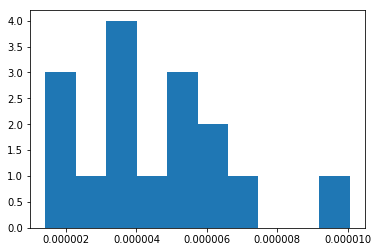

In [144]:
plt.hist(result[:,2])

(14900, 16) (14900, 500)



(14900, 16) (14900, 1000)



(14900, 16) (14900, 2000)



(14900, 16) (14900, 4000)



(14900, 16) (14900, 6990)



(14900, 16) (14900, 6990)


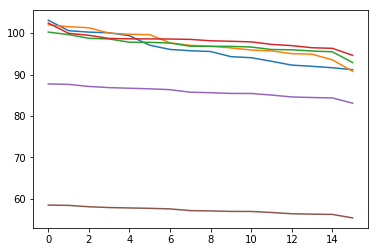

In [48]:
for amount in [500,1000,2000,4000,8000,12000]:
    result = correlate_m(pow_pred_matrix, _traces[:,:amount])
    ranking = [sum(list(map(abs,row)))/amount*14900 for row in result]
    correct_key = ranking[0]
    sranking = sorted(ranking,key=lambda x:-x)
    plt.plot(sranking)